In [1]:
from pipeline.DBHandler import DBHandler
import cohere
import google.generativeai as genai
from sentence_transformers import SentenceTransformer

# semantic chunking imports
from semantic_router.splitters import RollingWindowSplitter
from semantic_router.encoders import CohereEncoder, OpenAIEncoder
from semantic_router.utils.logger import logger

logger.setLevel("WARNING")  # reduce logs from splitter
import warnings
warnings.filterwarnings("ignore")

from typing import Union

import os
from dotenv import load_dotenv
load_dotenv()
co = cohere.Client(api_key=os.getenv('COHERE_API_KEY'))


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/student/.config/sagemaker/config.yaml


In [2]:
def semantic_chunking(encoder: Union[type(CohereEncoder), type(OpenAIEncoder())], directory_path: str, score_threshold: float = 0.4) -> list:
	"""
    Use the semantic chunking to split the documents into semantic chunks
    Args:
        encoder: an embedding model to use for the semantic chunking
        directory_path (str): path to the directory containing the documents
        score_threshold (float): the score threshold for the encoder below which the split is made, between 0 and 1
    Returns:
        splits (list): list of the semantic chunks
    """
	encoder.score_threshold = score_threshold
	splitter = RollingWindowSplitter(
		encoder=encoder,
		dynamic_threshold=False,
		min_split_tokens=100,
		max_split_tokens=400,
		window_size=5,
		plot_splits=True,
		enable_statistics=True
	)

	splits = []
	for file_name in os.listdir(directory_path):
		print(file_name)
		file = open(f'{directory_path}/{file_name}', "r")
		example_faq = file.read()
		file.close()

		current_splits = splitter([example_faq])
		complete_current_splits = []

		for i in range(len(current_splits)-1):
			# for more context, add 200 chars from the previous and next splits
			if i == 0:
				split_to_add = {
					'text': ' '.join(current_splits[i].docs + current_splits[i + 1].docs[:200]),
					'origin_file': file_name
				}
				complete_current_splits.append(split_to_add)
			elif i + 1 == len(current_splits):
				split_to_add = {
					'text': ' '.join(current_splits[i - 1].docs[-200:] + current_splits[i].docs),
					'origin_file': file_name
				}
				complete_current_splits.append(split_to_add)
			else:
				split_to_add = {
					'text': ' '.join(current_splits[i - 1].docs[-200:] + current_splits[i].docs + current_splits[i + 1].docs[:200]),
					'origin_file': file_name
				}
				complete_current_splits.append(split_to_add)

		splits.extend(complete_current_splits)
	return splits

section_12.txt


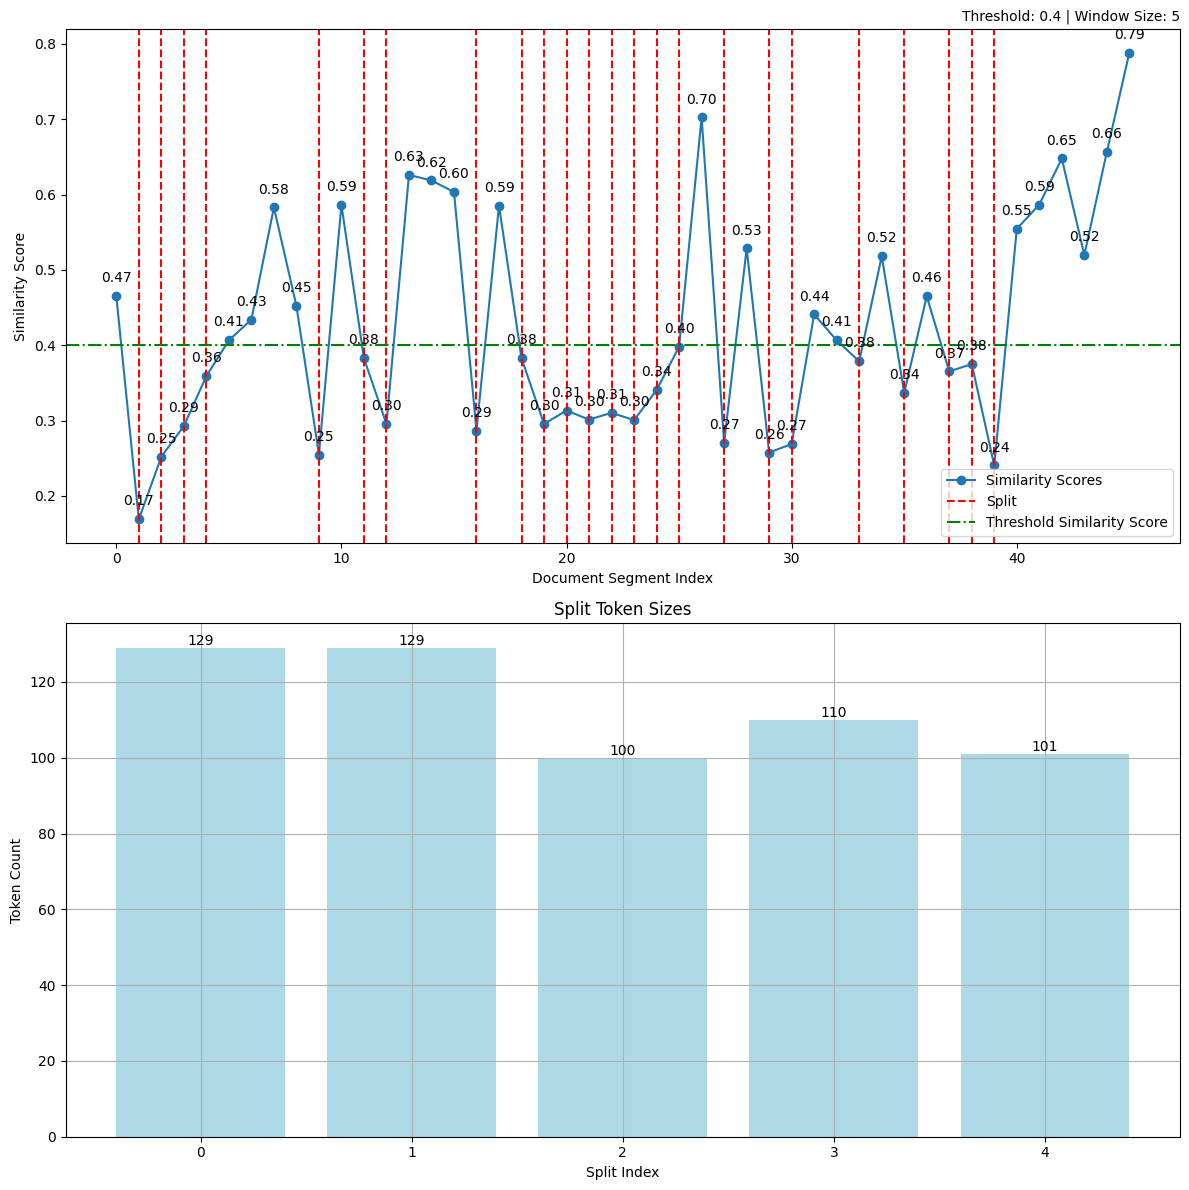

Splitting Statistics:
  - Total Documents: 47
  - Total Splits: 5
  - Splits by Threshold: 4
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 100
  - Maximum Token Size of Split: 129
  - Similarity Split Ratio: 0.80
section_26.txt


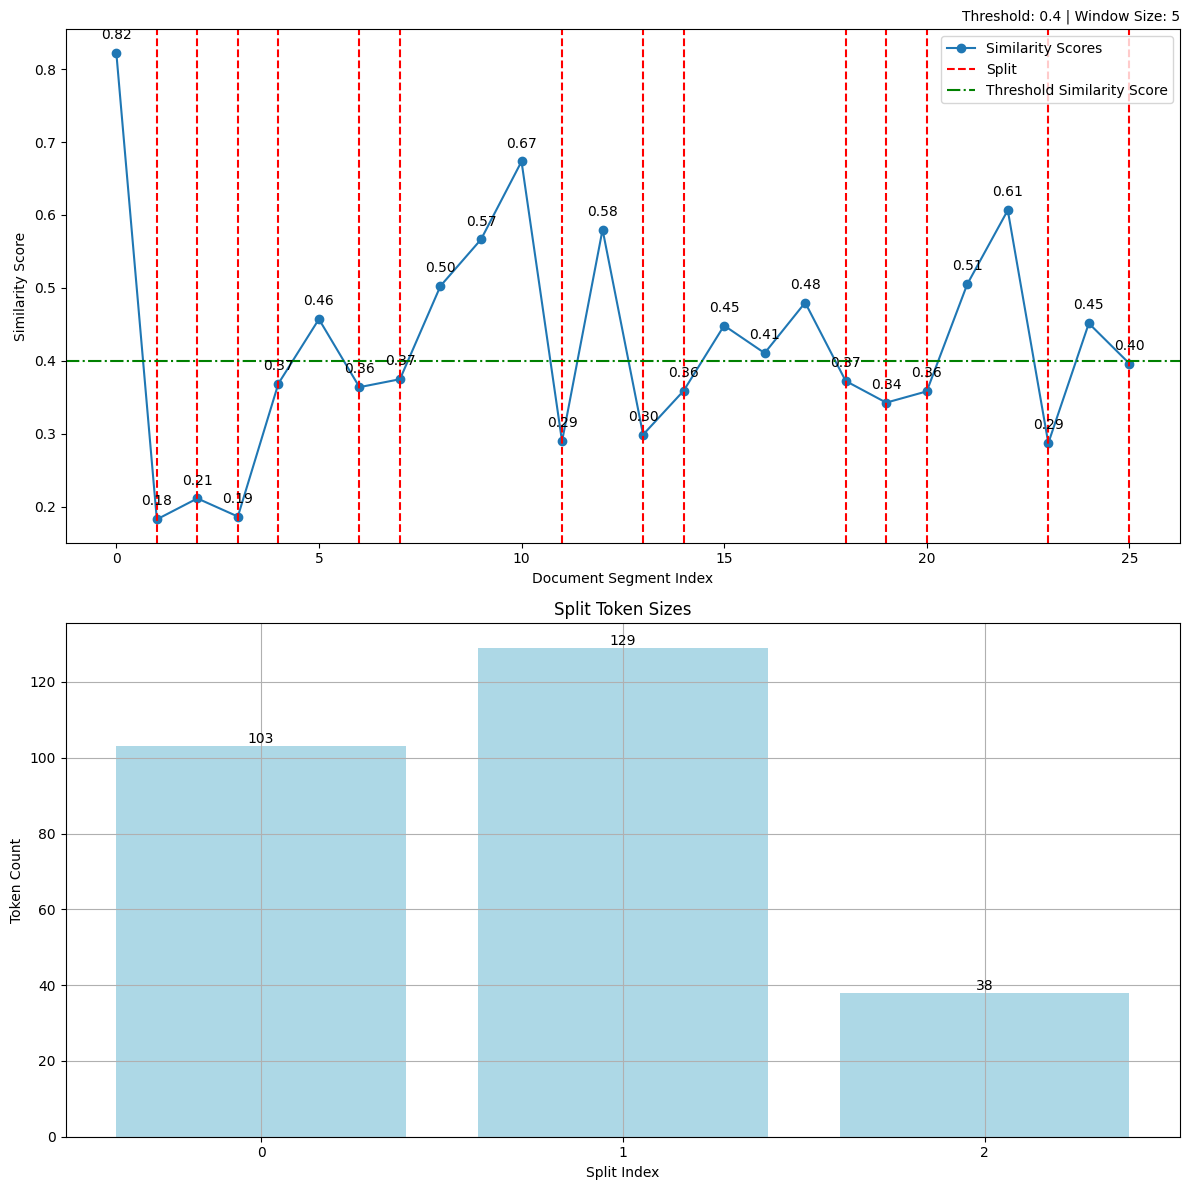

Splitting Statistics:
  - Total Documents: 27
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 38
  - Maximum Token Size of Split: 129
  - Similarity Split Ratio: 0.67
section_4.txt


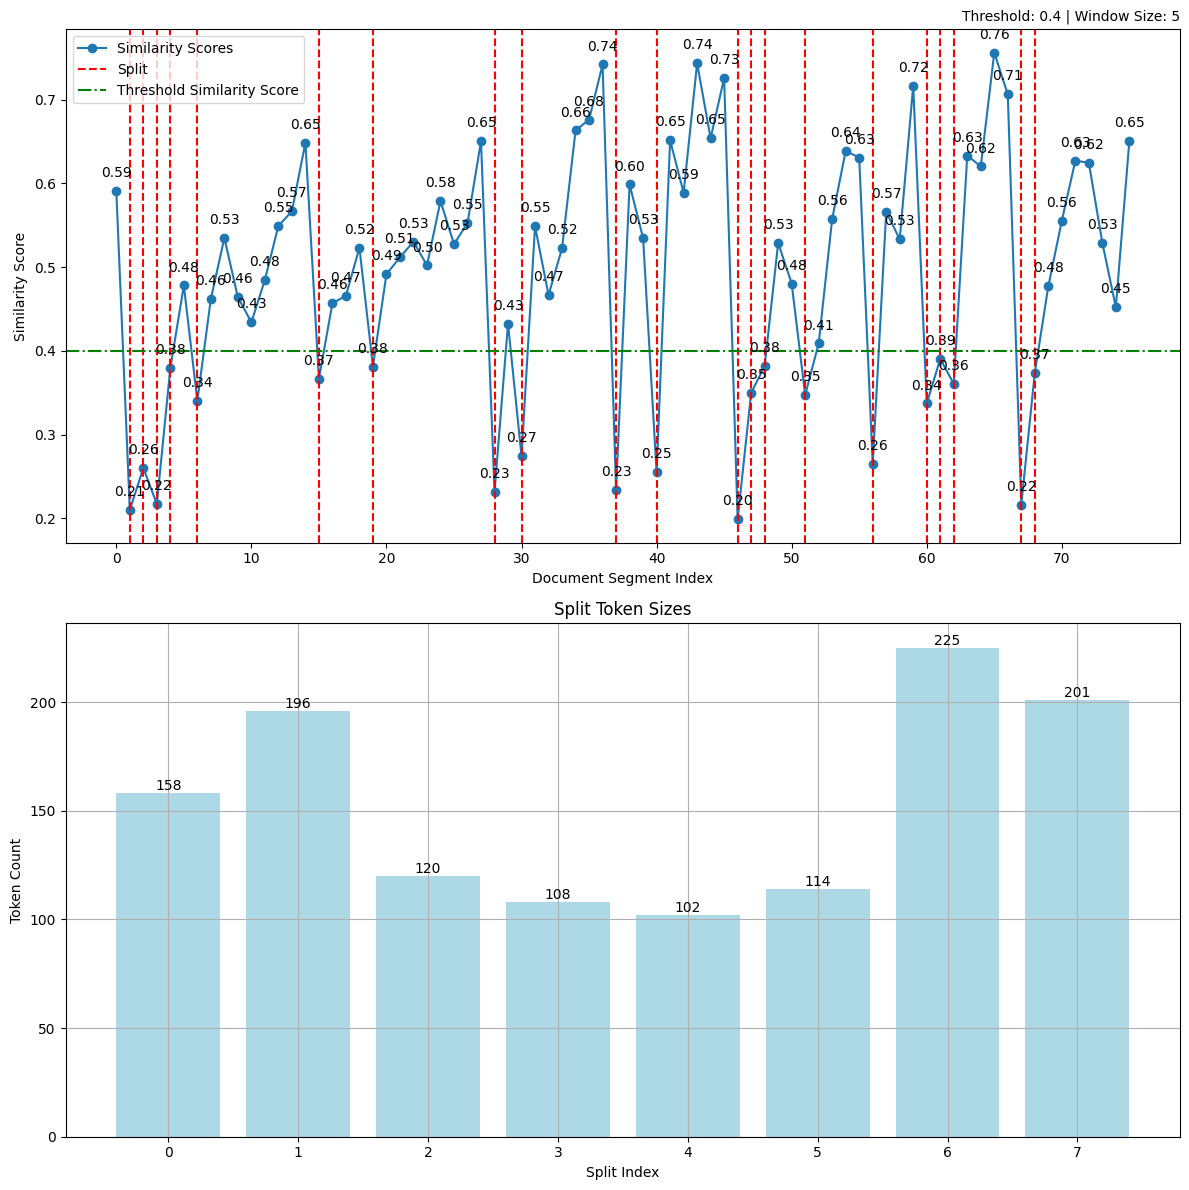

Splitting Statistics:
  - Total Documents: 77
  - Total Splits: 8
  - Splits by Threshold: 7
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 102
  - Maximum Token Size of Split: 225
  - Similarity Split Ratio: 0.88
section_25.txt


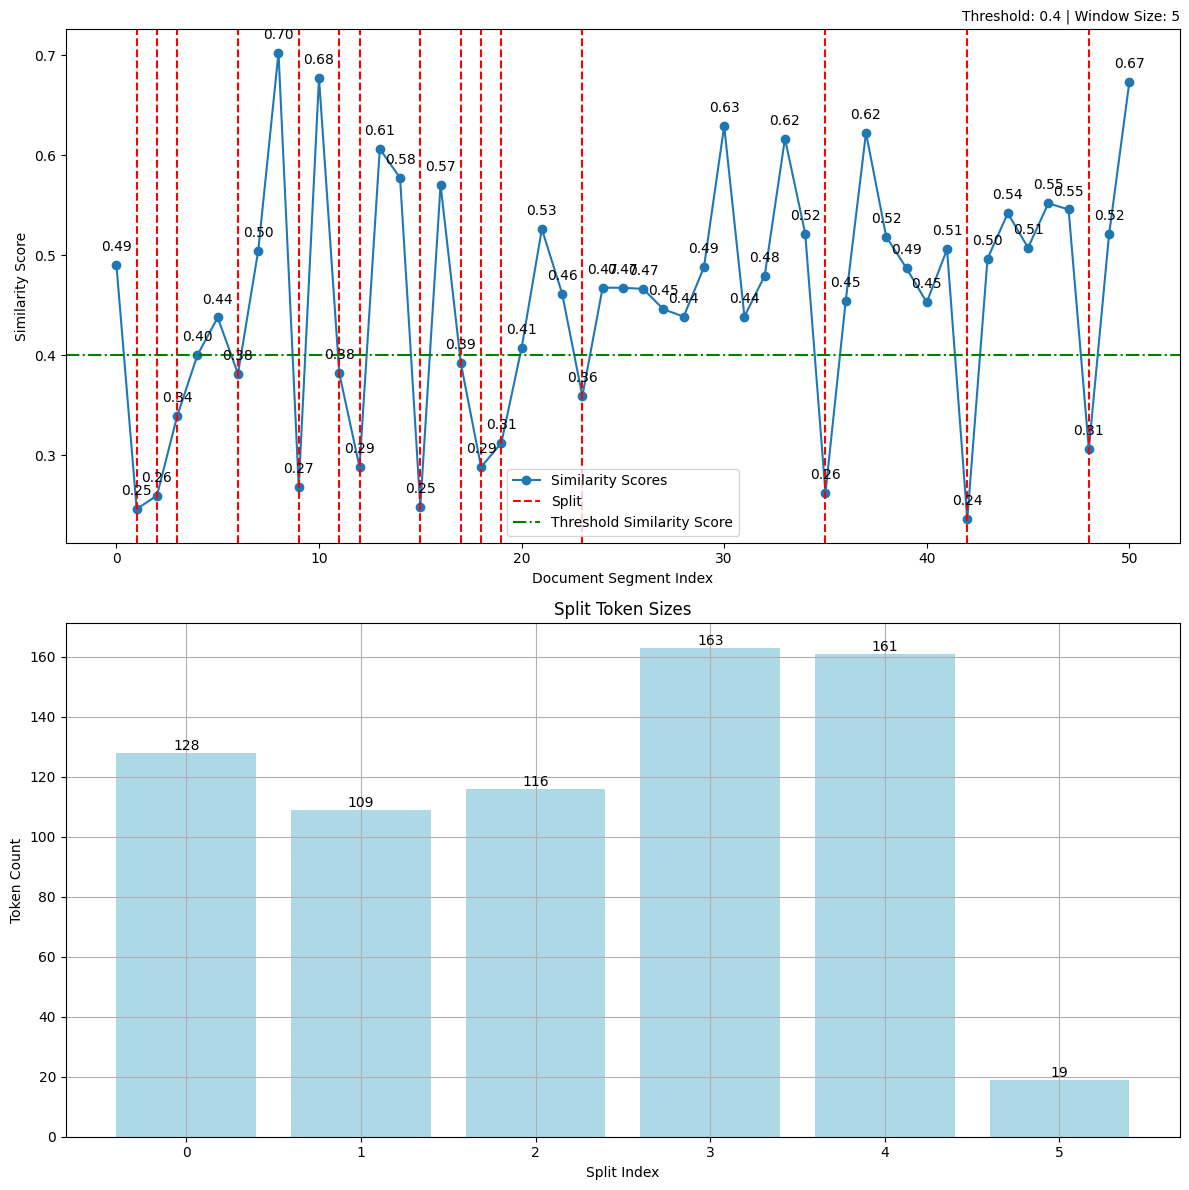

Splitting Statistics:
  - Total Documents: 52
  - Total Splits: 6
  - Splits by Threshold: 5
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 19
  - Maximum Token Size of Split: 163
  - Similarity Split Ratio: 0.83
section_6.txt


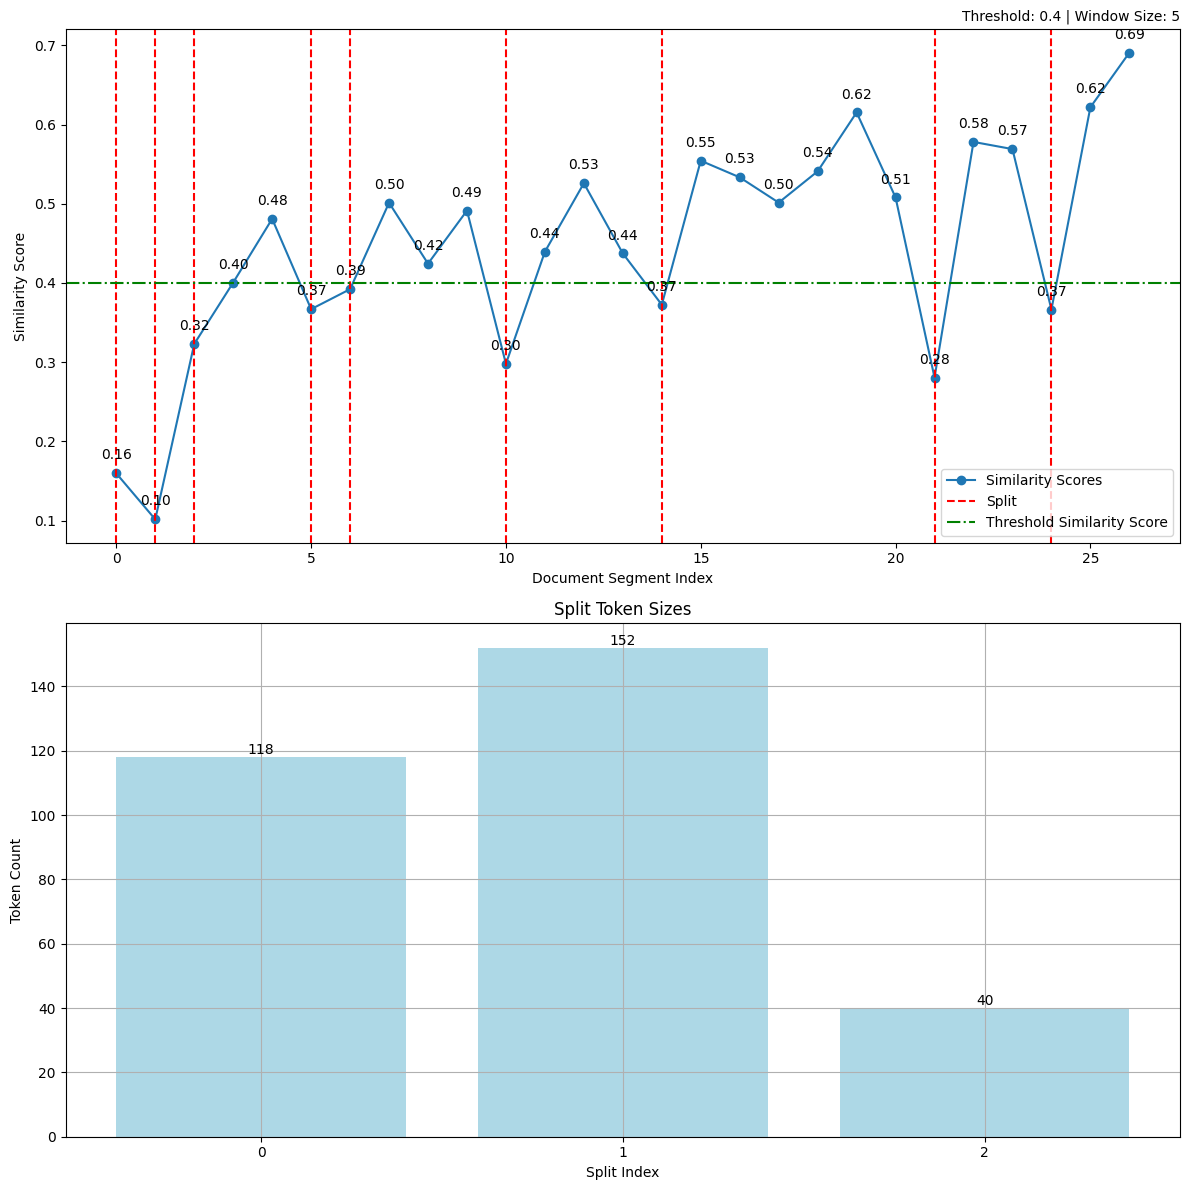

Splitting Statistics:
  - Total Documents: 28
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 40
  - Maximum Token Size of Split: 152
  - Similarity Split Ratio: 0.67
section_161.txt


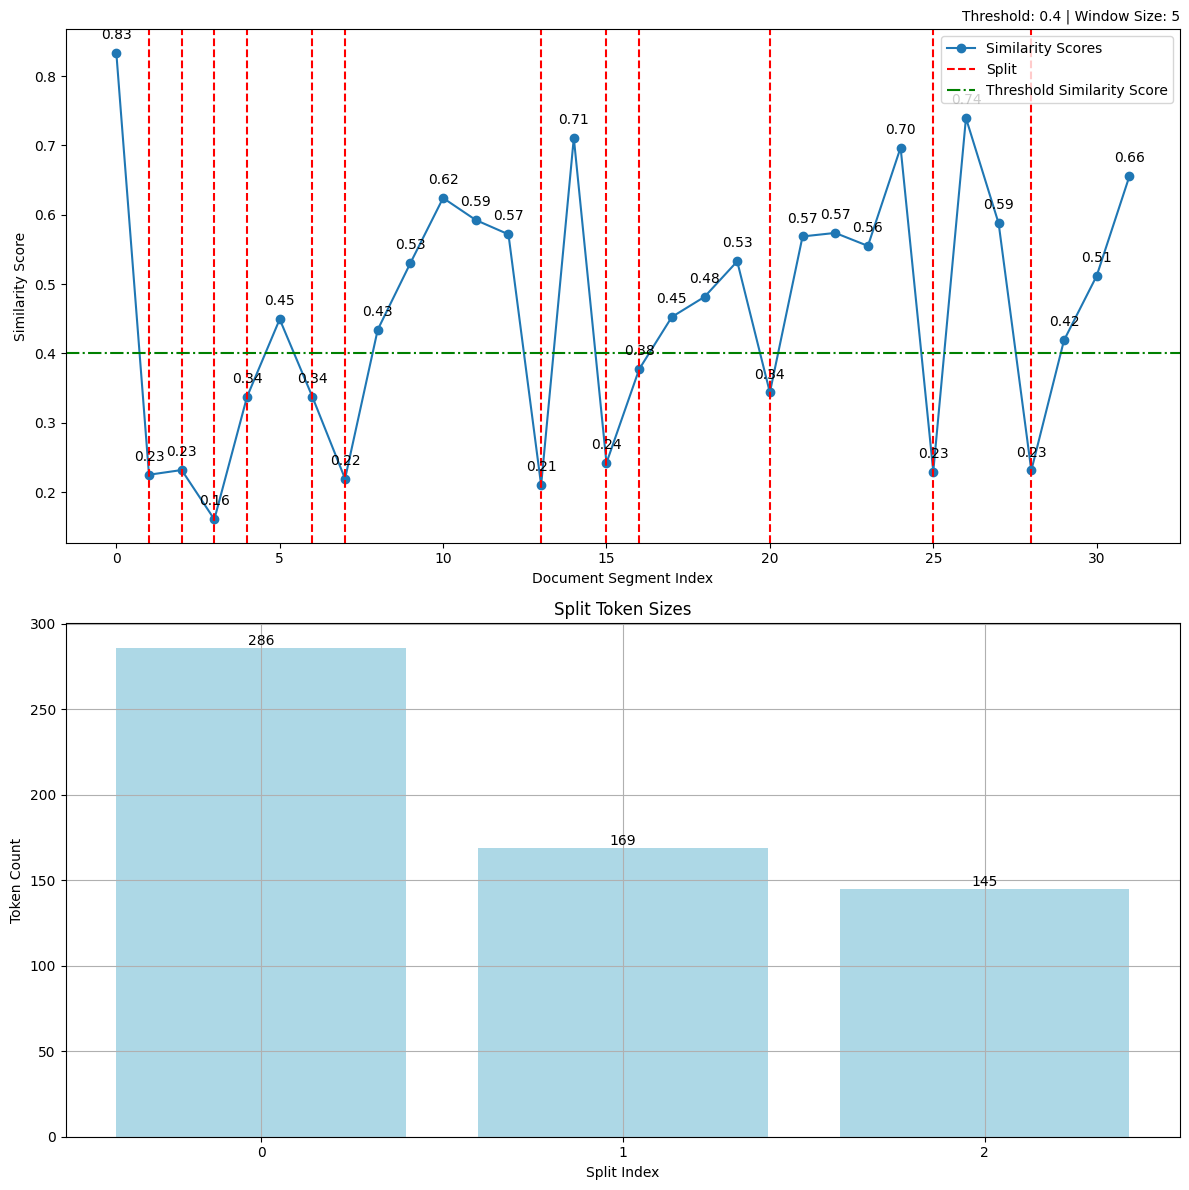

Splitting Statistics:
  - Total Documents: 33
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 145
  - Maximum Token Size of Split: 286
  - Similarity Split Ratio: 0.67
section_35.txt


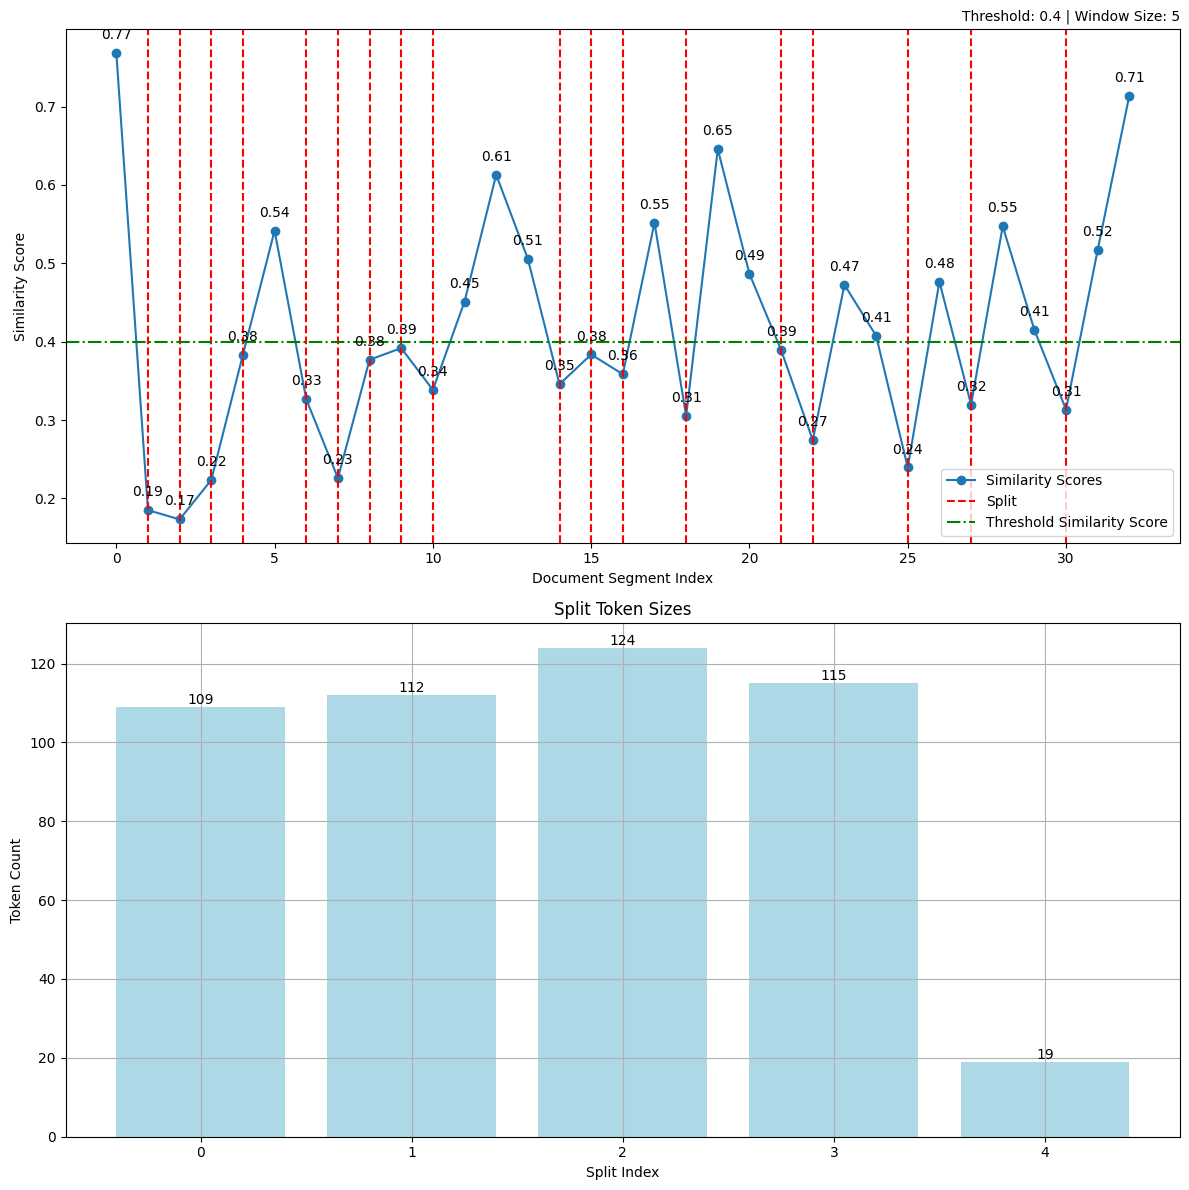

Splitting Statistics:
  - Total Documents: 34
  - Total Splits: 5
  - Splits by Threshold: 4
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 19
  - Maximum Token Size of Split: 124
  - Similarity Split Ratio: 0.80
section_24.txt


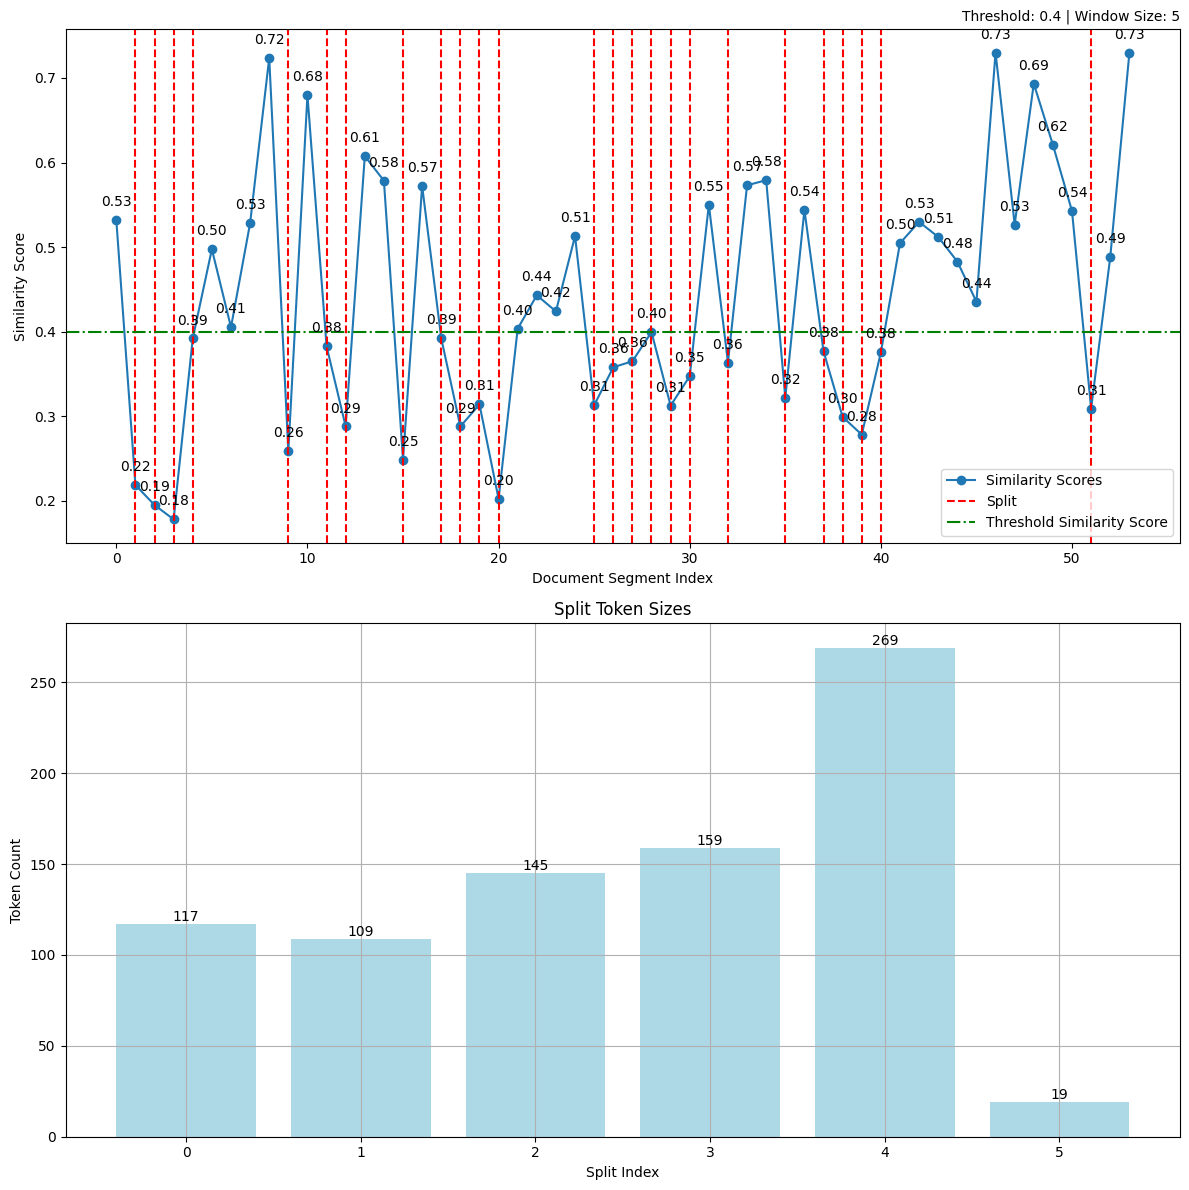

Splitting Statistics:
  - Total Documents: 55
  - Total Splits: 6
  - Splits by Threshold: 5
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 19
  - Maximum Token Size of Split: 269
  - Similarity Split Ratio: 0.83
section_42.txt


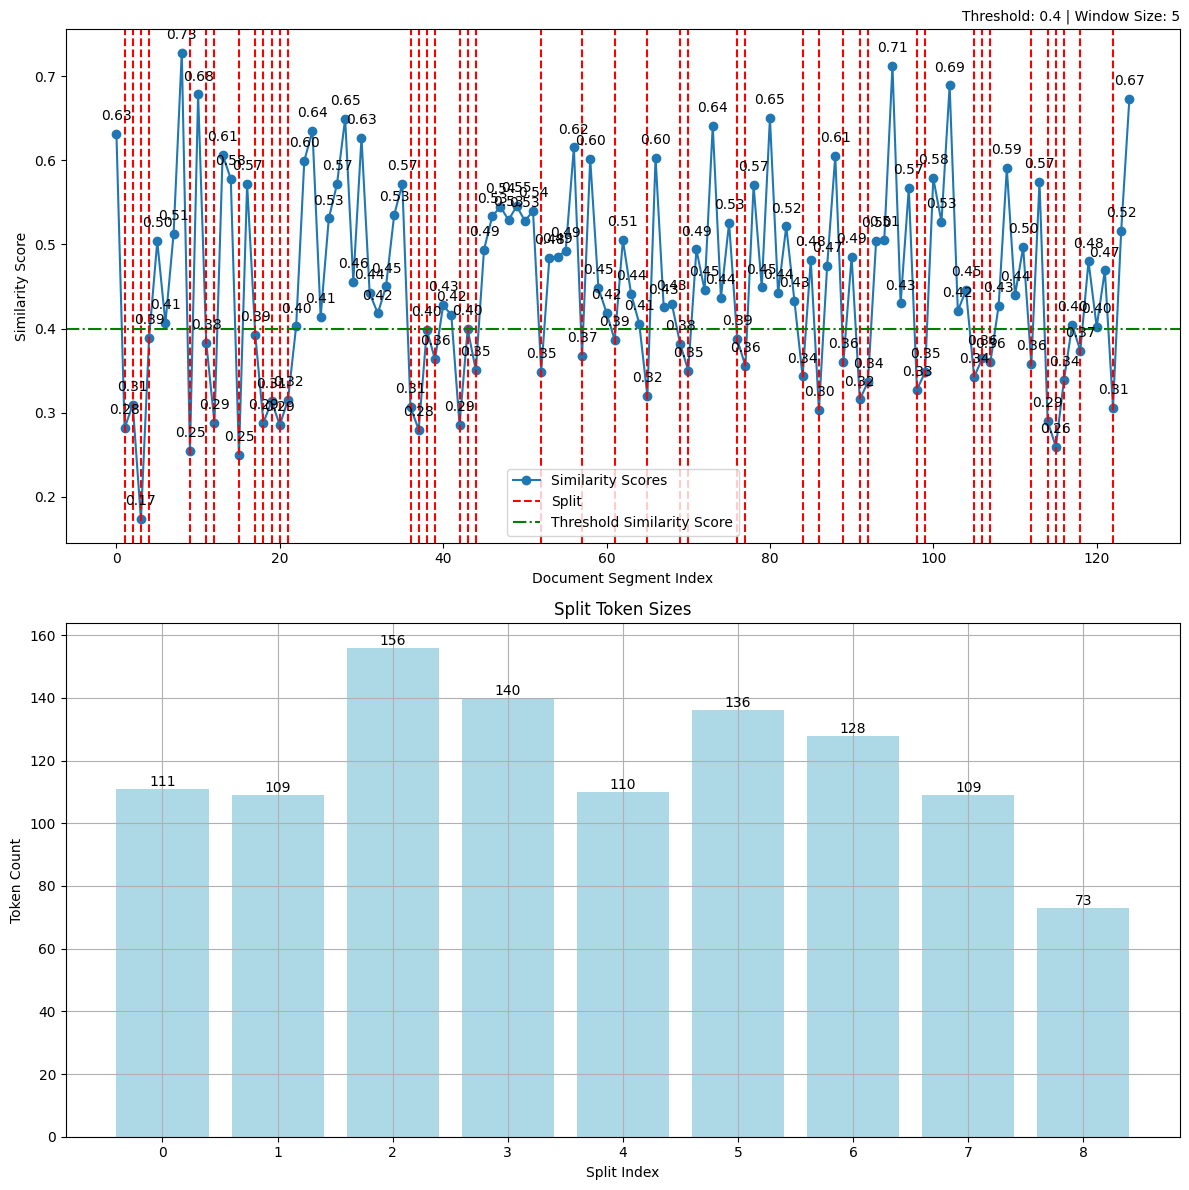

Splitting Statistics:
  - Total Documents: 126
  - Total Splits: 9
  - Splits by Threshold: 8
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 73
  - Maximum Token Size of Split: 156
  - Similarity Split Ratio: 0.89
section_41.txt


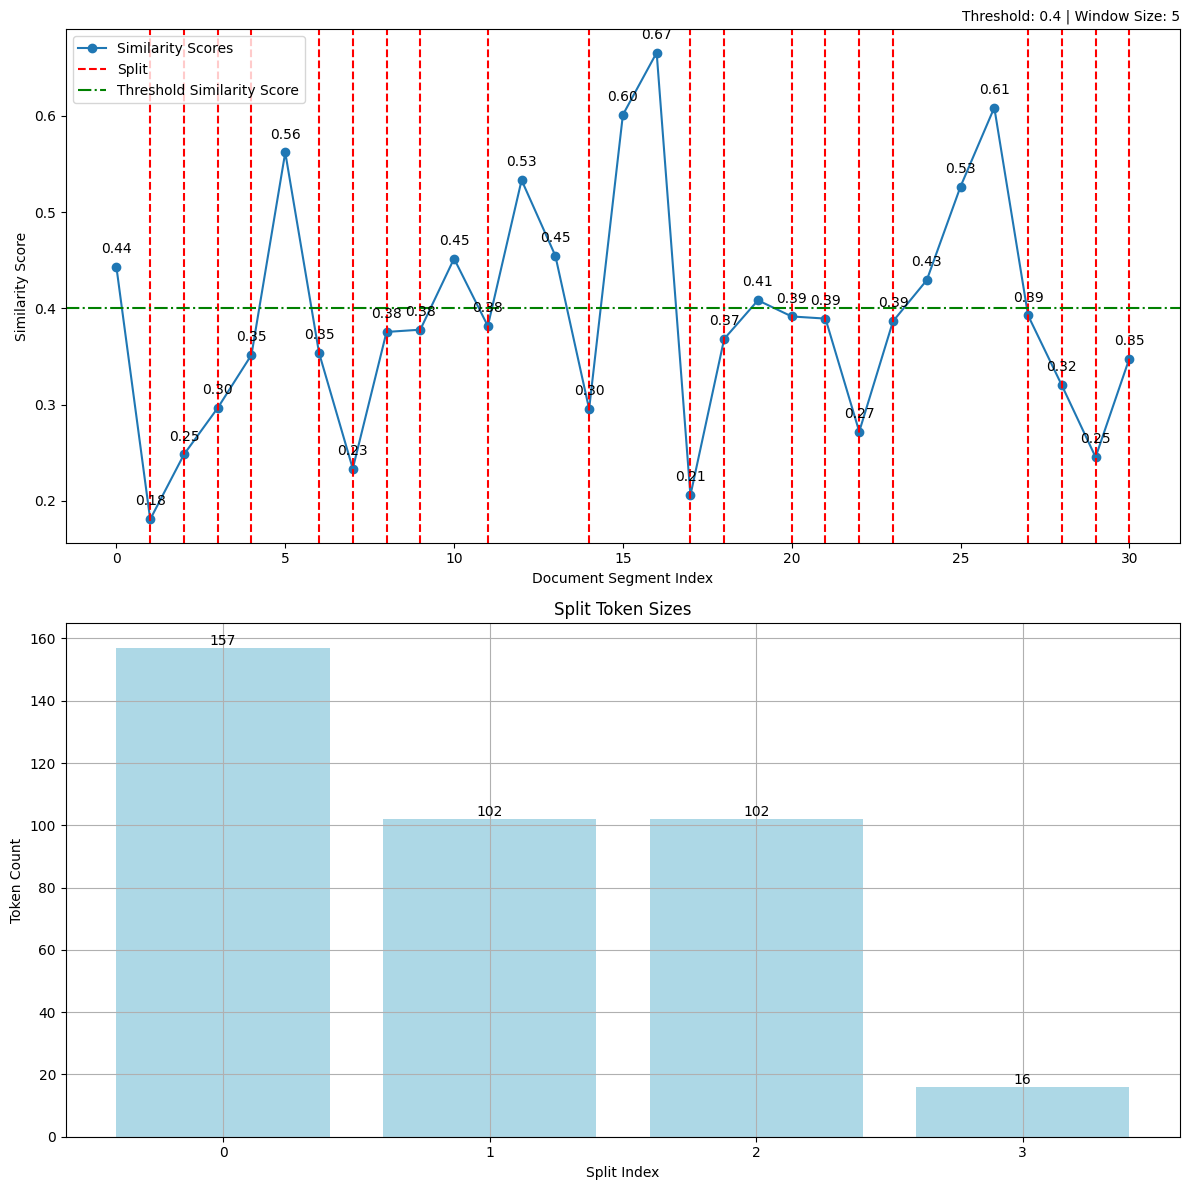

Splitting Statistics:
  - Total Documents: 32
  - Total Splits: 4
  - Splits by Threshold: 3
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 16
  - Maximum Token Size of Split: 157
  - Similarity Split Ratio: 0.75
section_14.txt


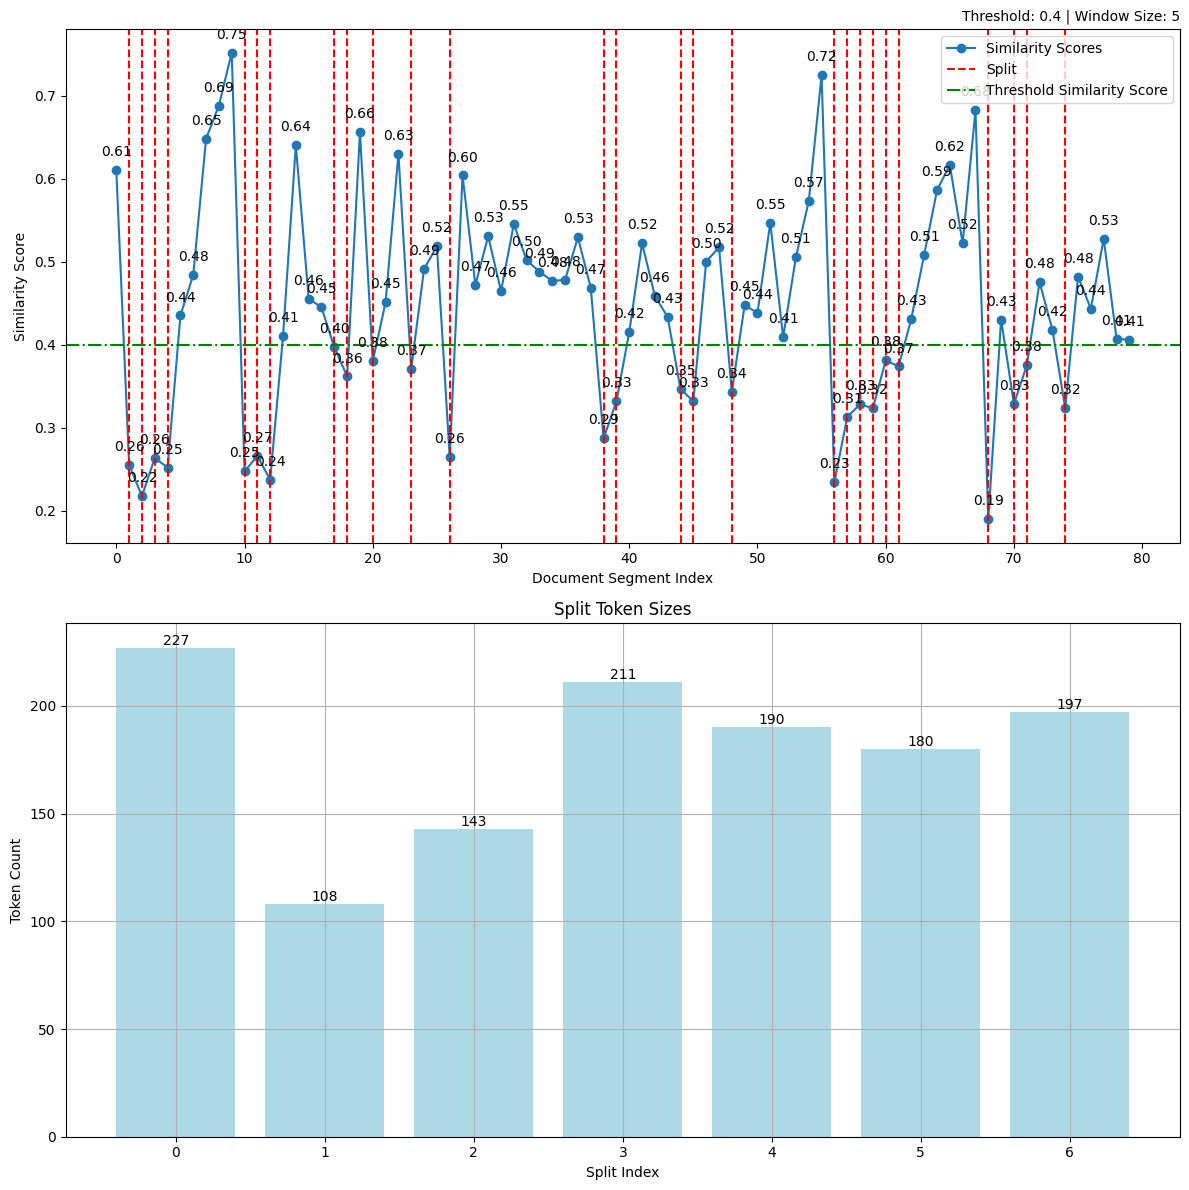

Splitting Statistics:
  - Total Documents: 81
  - Total Splits: 7
  - Splits by Threshold: 6
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 108
  - Maximum Token Size of Split: 227
  - Similarity Split Ratio: 0.86
section_20.txt


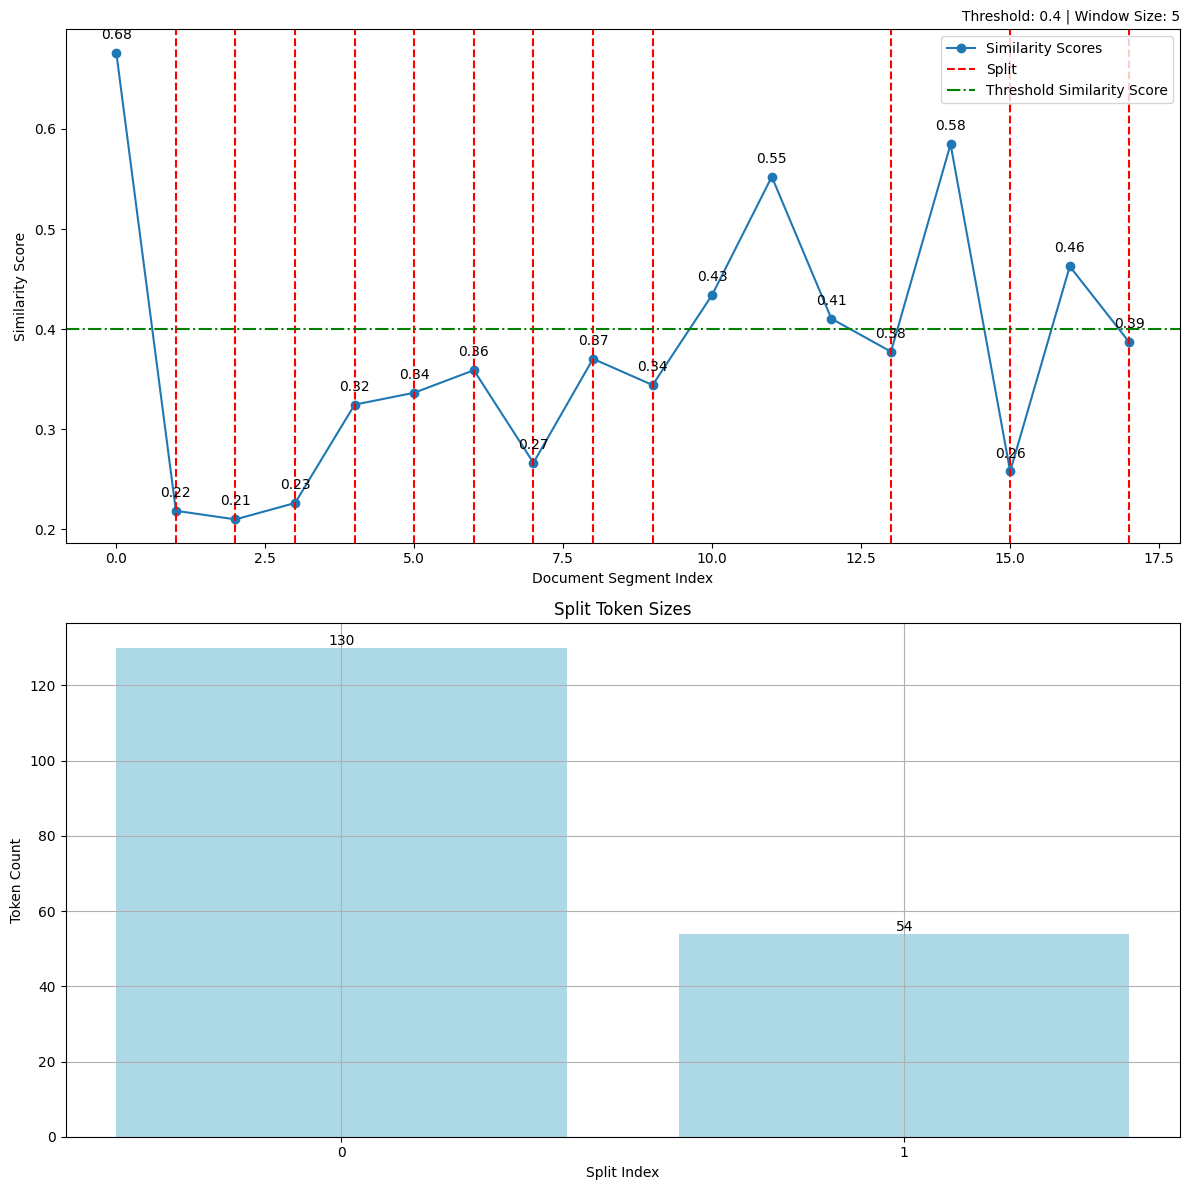

Splitting Statistics:
  - Total Documents: 19
  - Total Splits: 2
  - Splits by Threshold: 1
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 54
  - Maximum Token Size of Split: 130
  - Similarity Split Ratio: 0.50
section_13.txt


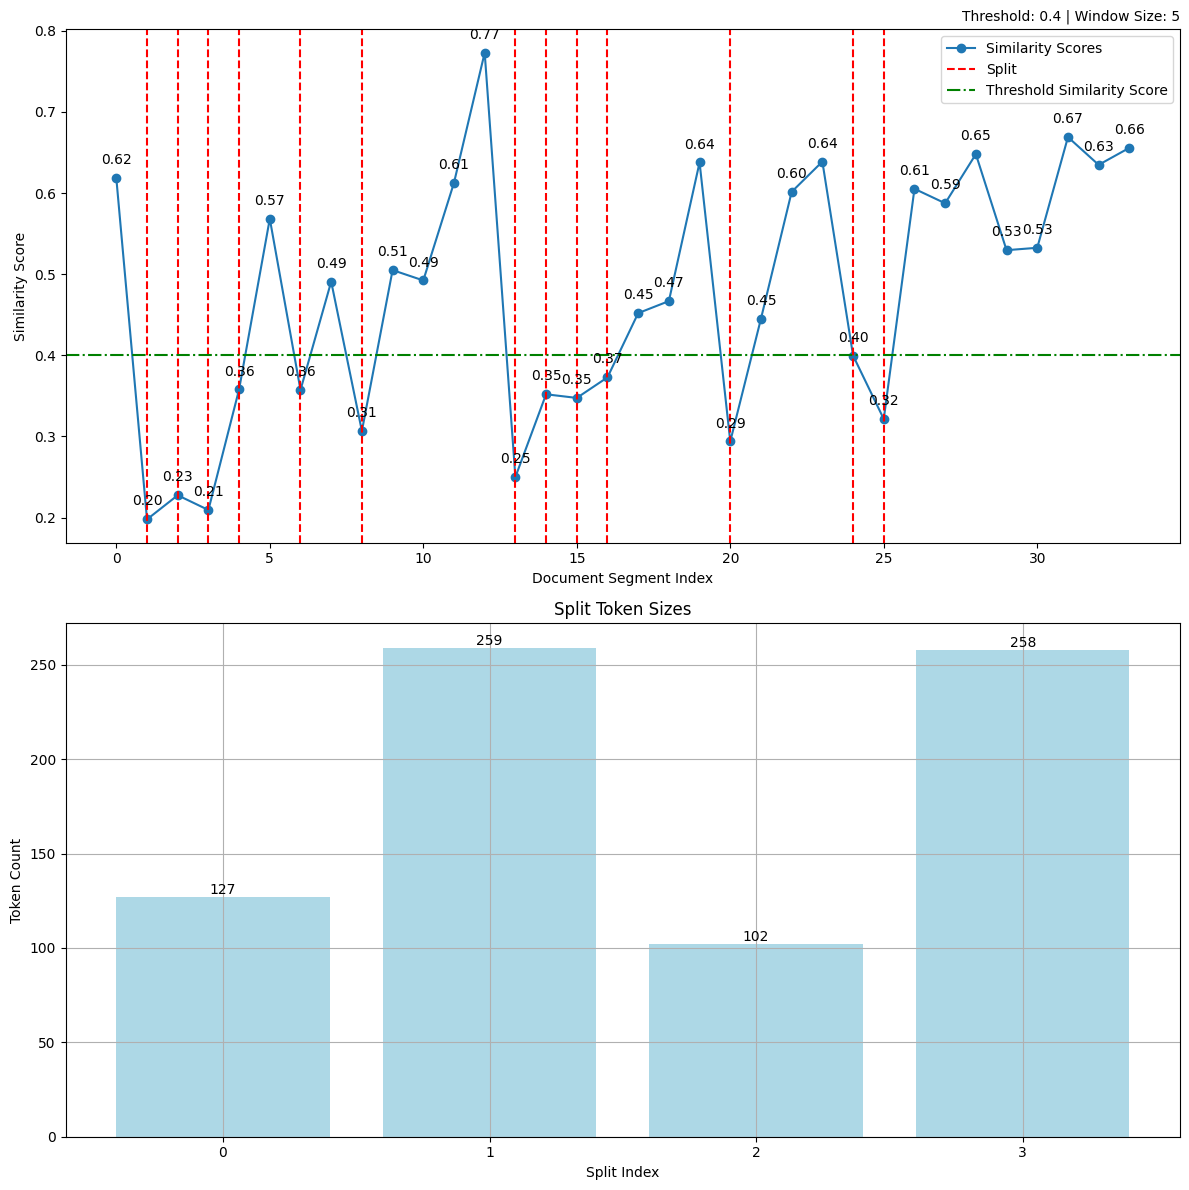

Splitting Statistics:
  - Total Documents: 35
  - Total Splits: 4
  - Splits by Threshold: 3
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 102
  - Maximum Token Size of Split: 259
  - Similarity Split Ratio: 0.75
section_171.txt


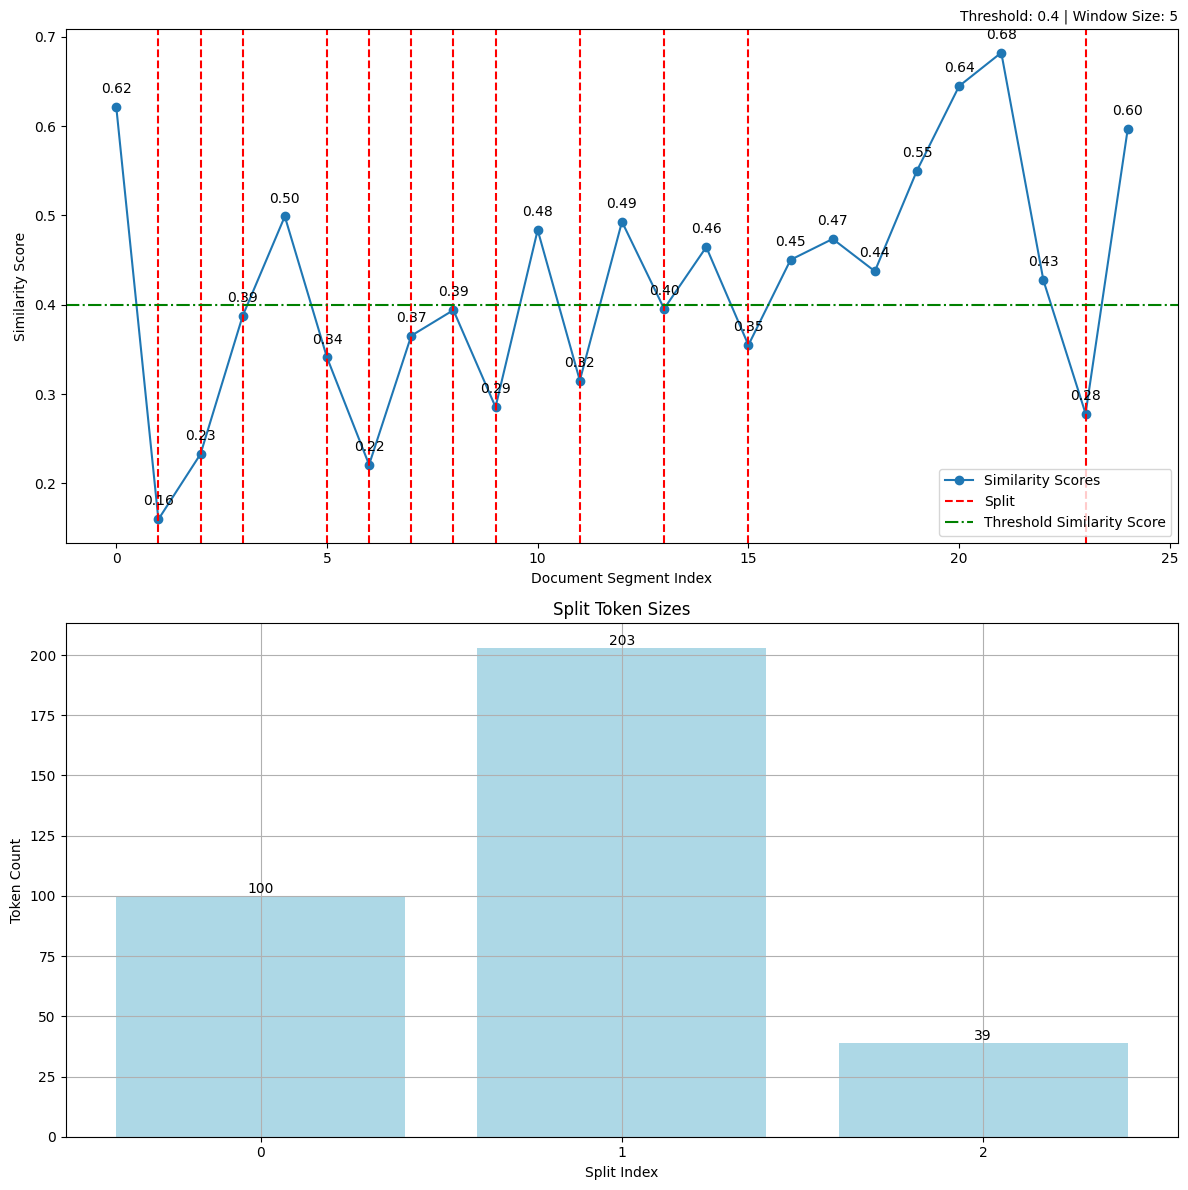

Splitting Statistics:
  - Total Documents: 26
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 39
  - Maximum Token Size of Split: 203
  - Similarity Split Ratio: 0.67
section_45.txt


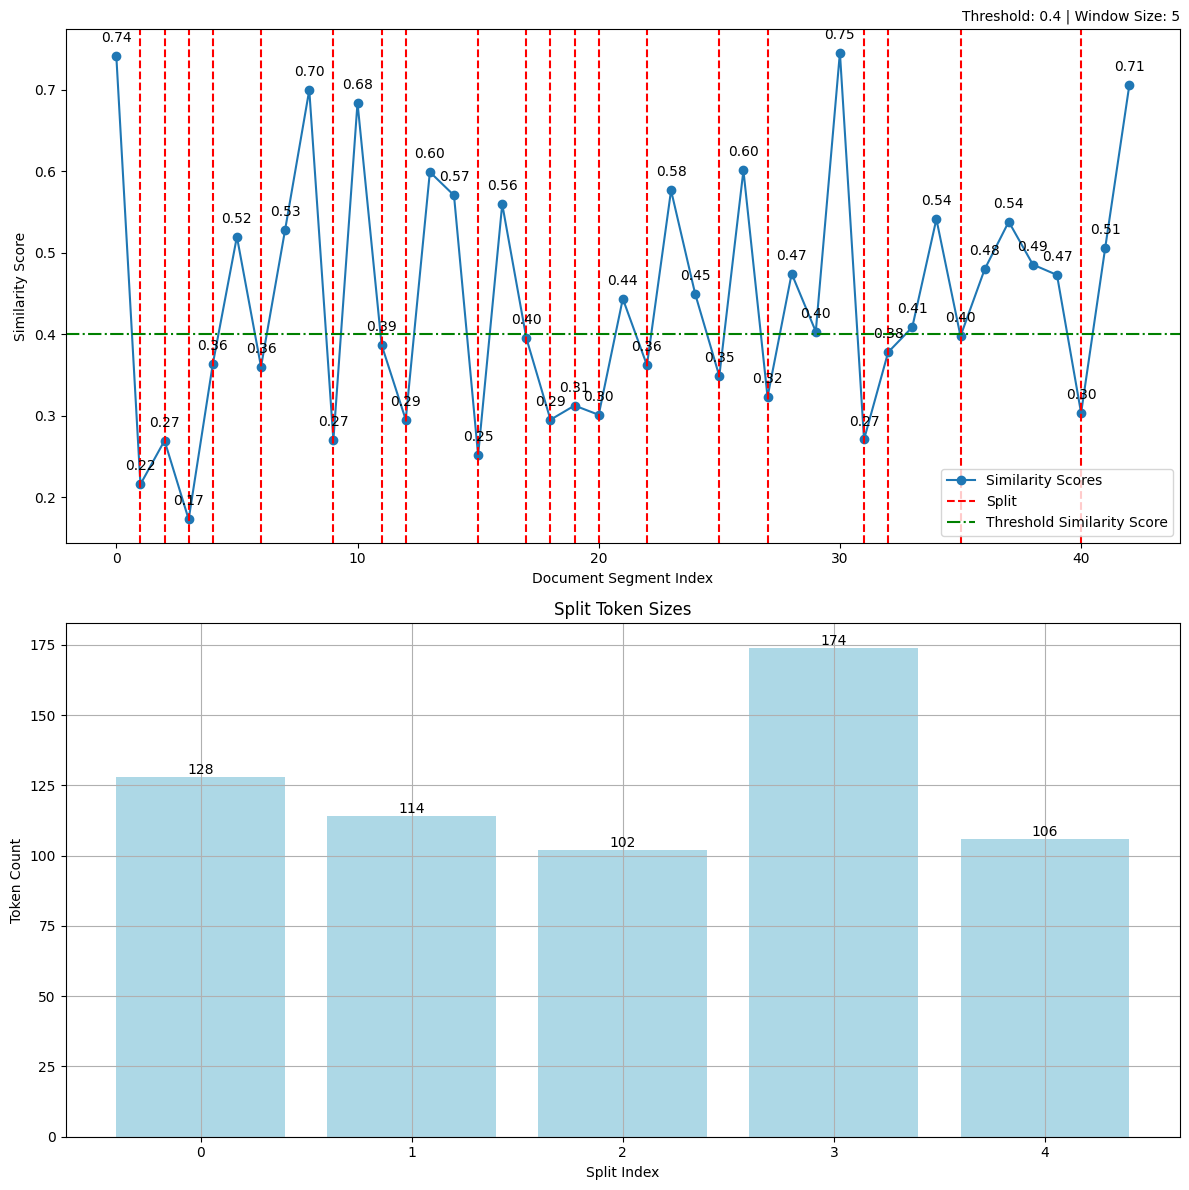

Splitting Statistics:
  - Total Documents: 44
  - Total Splits: 5
  - Splits by Threshold: 4
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 102
  - Maximum Token Size of Split: 174
  - Similarity Split Ratio: 0.80
section_10.txt


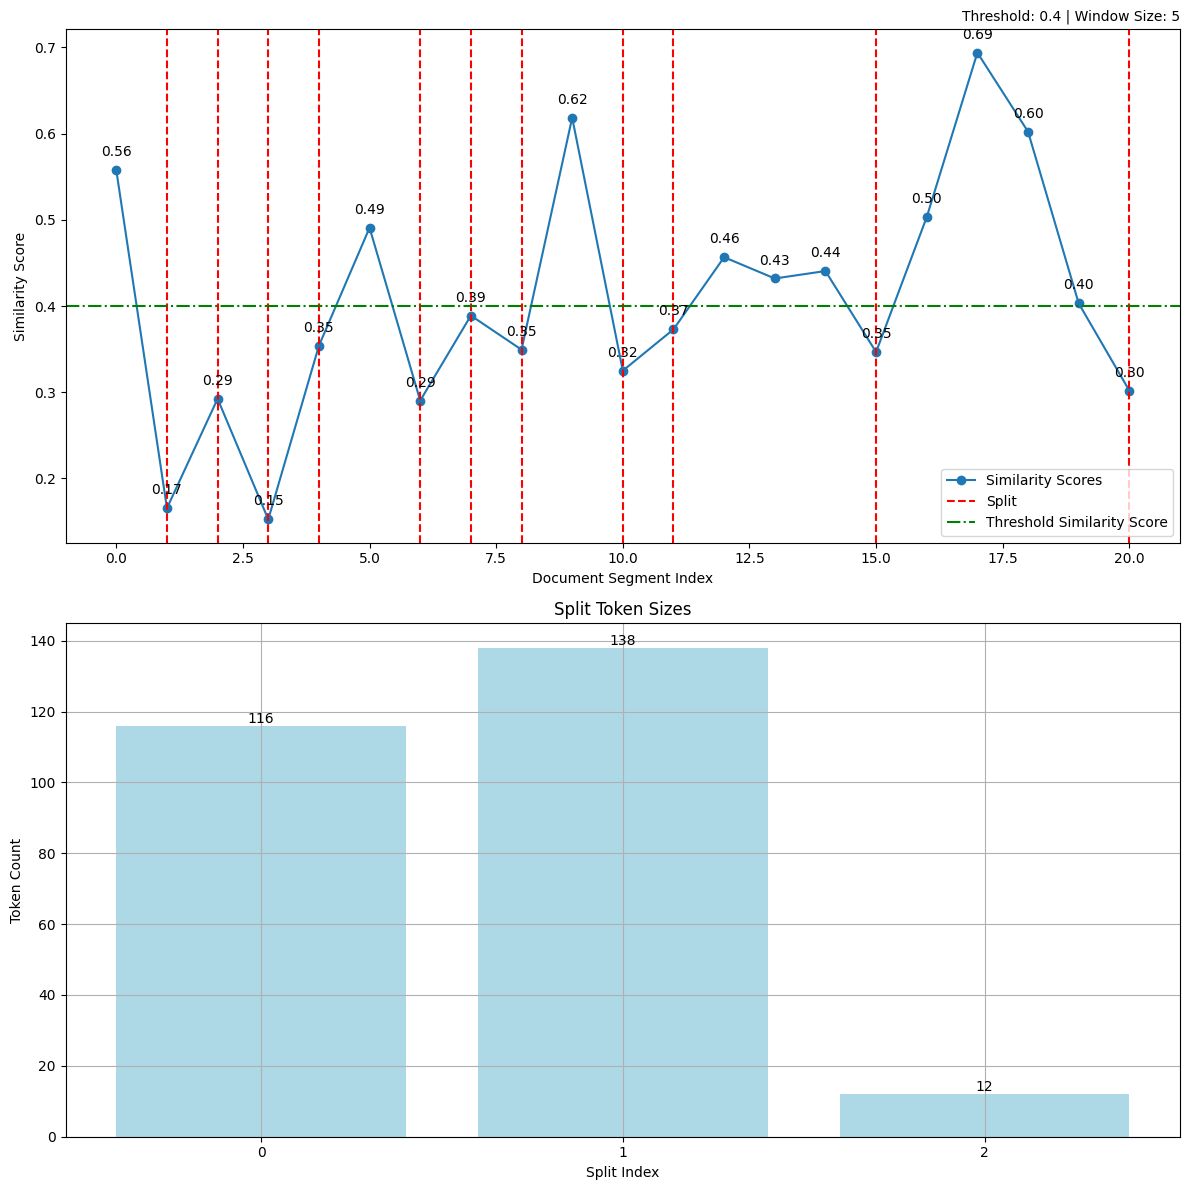

Splitting Statistics:
  - Total Documents: 22
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 12
  - Maximum Token Size of Split: 138
  - Similarity Split Ratio: 0.67
section_36.txt


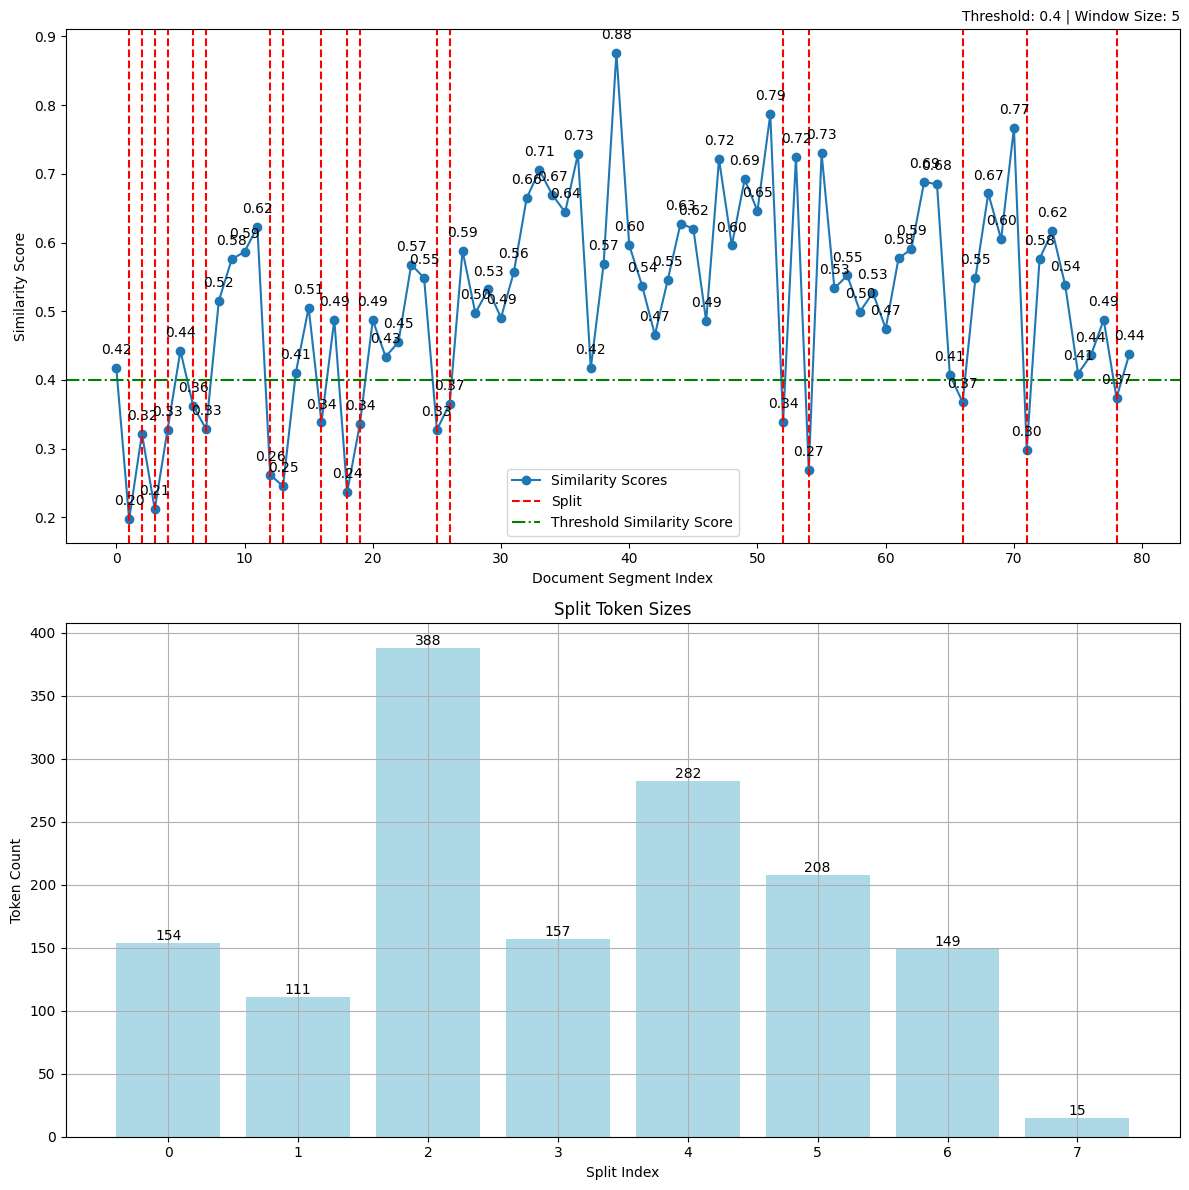

Splitting Statistics:
  - Total Documents: 81
  - Total Splits: 8
  - Splits by Threshold: 6
  - Splits by Max Chunk Size: 1
  - Last Split: 1
  - Minimum Token Size of Split: 15
  - Maximum Token Size of Split: 388
  - Similarity Split Ratio: 0.75
section_40.txt


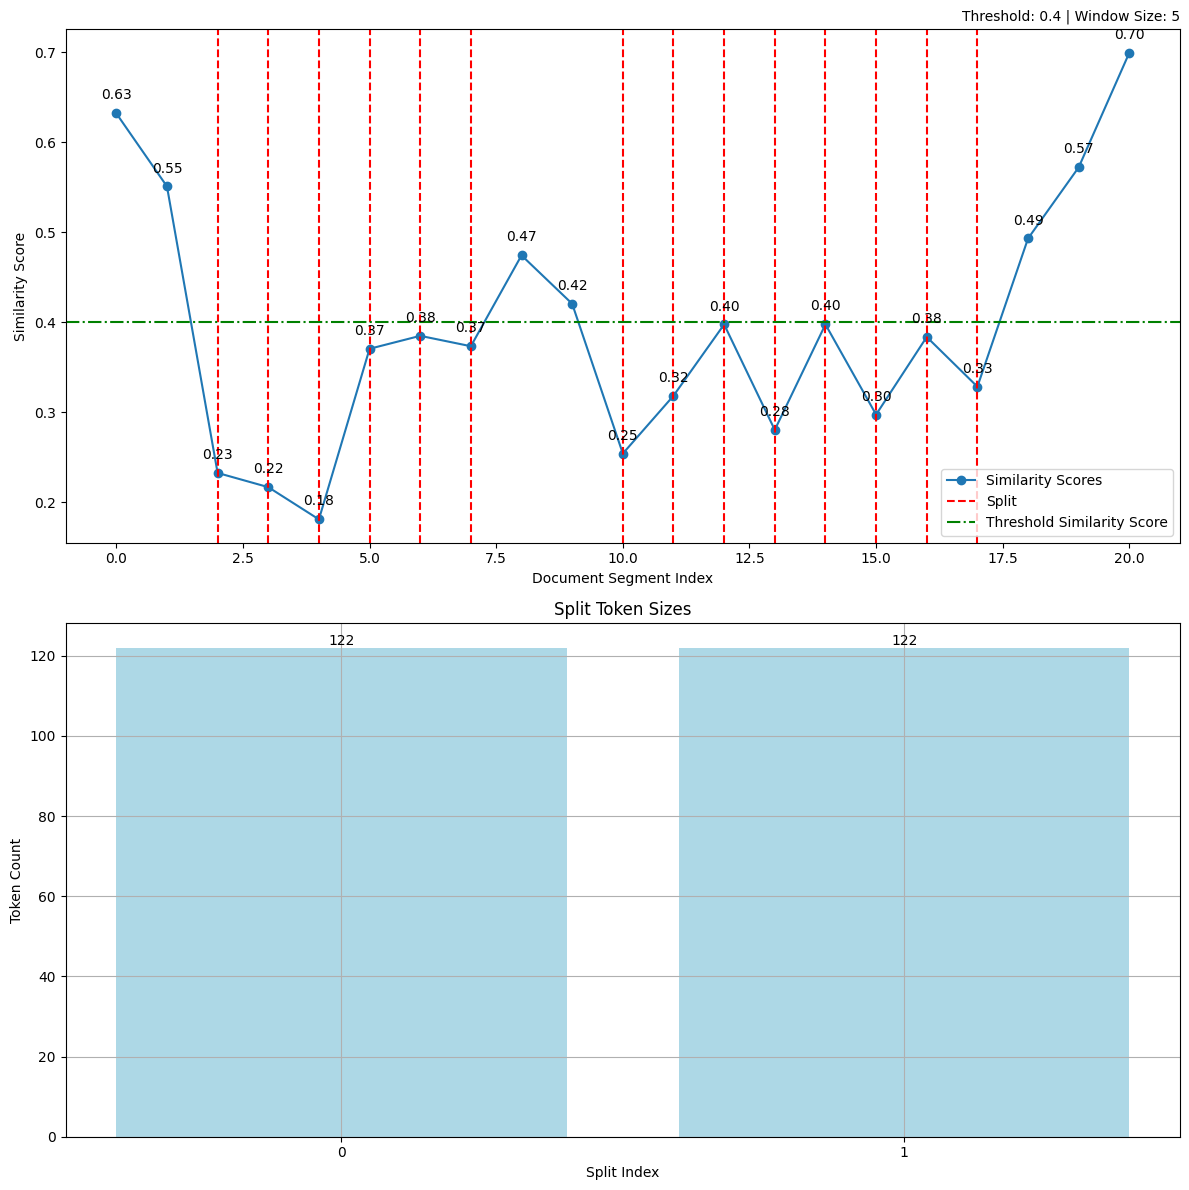

Splitting Statistics:
  - Total Documents: 22
  - Total Splits: 2
  - Splits by Threshold: 1
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 122
  - Maximum Token Size of Split: 122
  - Similarity Split Ratio: 0.50
section_37.txt


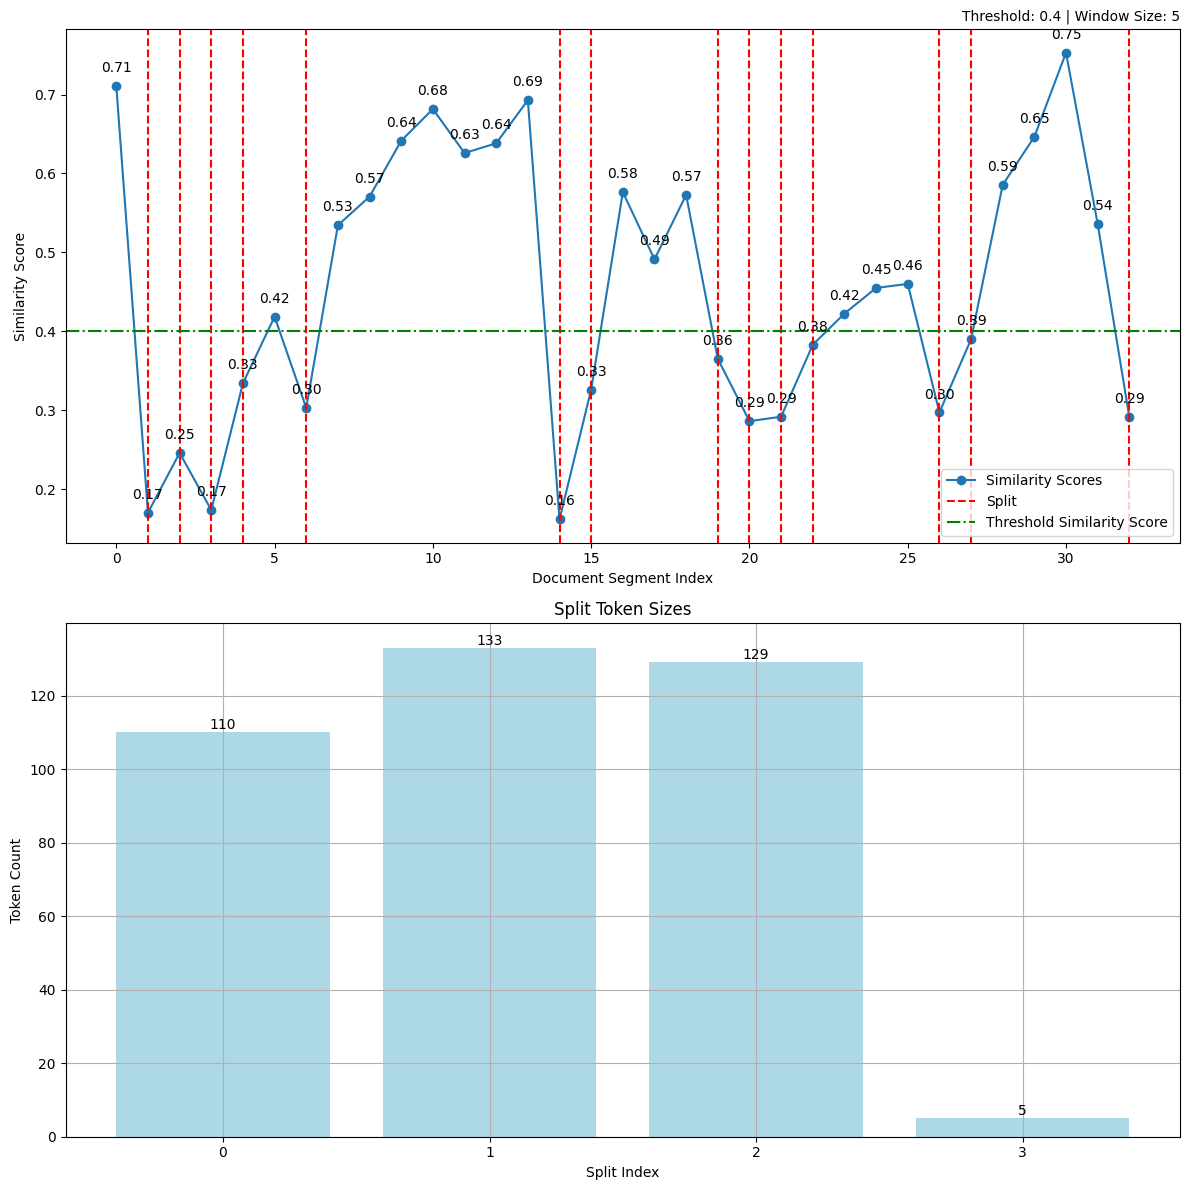

Splitting Statistics:
  - Total Documents: 34
  - Total Splits: 4
  - Splits by Threshold: 3
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 5
  - Maximum Token Size of Split: 133
  - Similarity Split Ratio: 0.75
section_7.txt


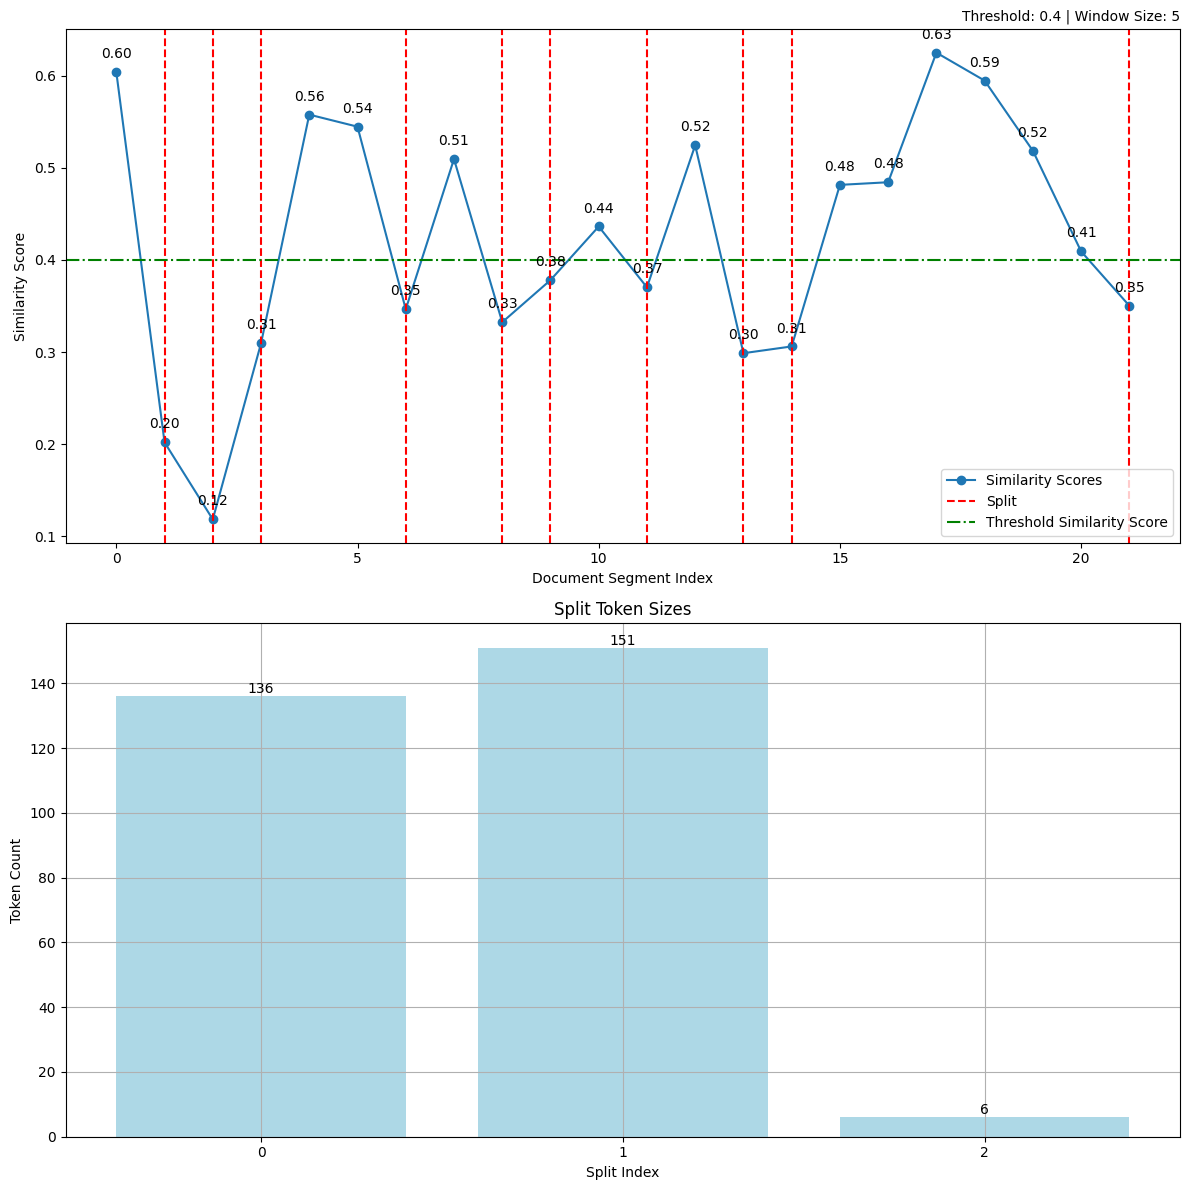

Splitting Statistics:
  - Total Documents: 23
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 6
  - Maximum Token Size of Split: 151
  - Similarity Split Ratio: 0.67
section_2.txt


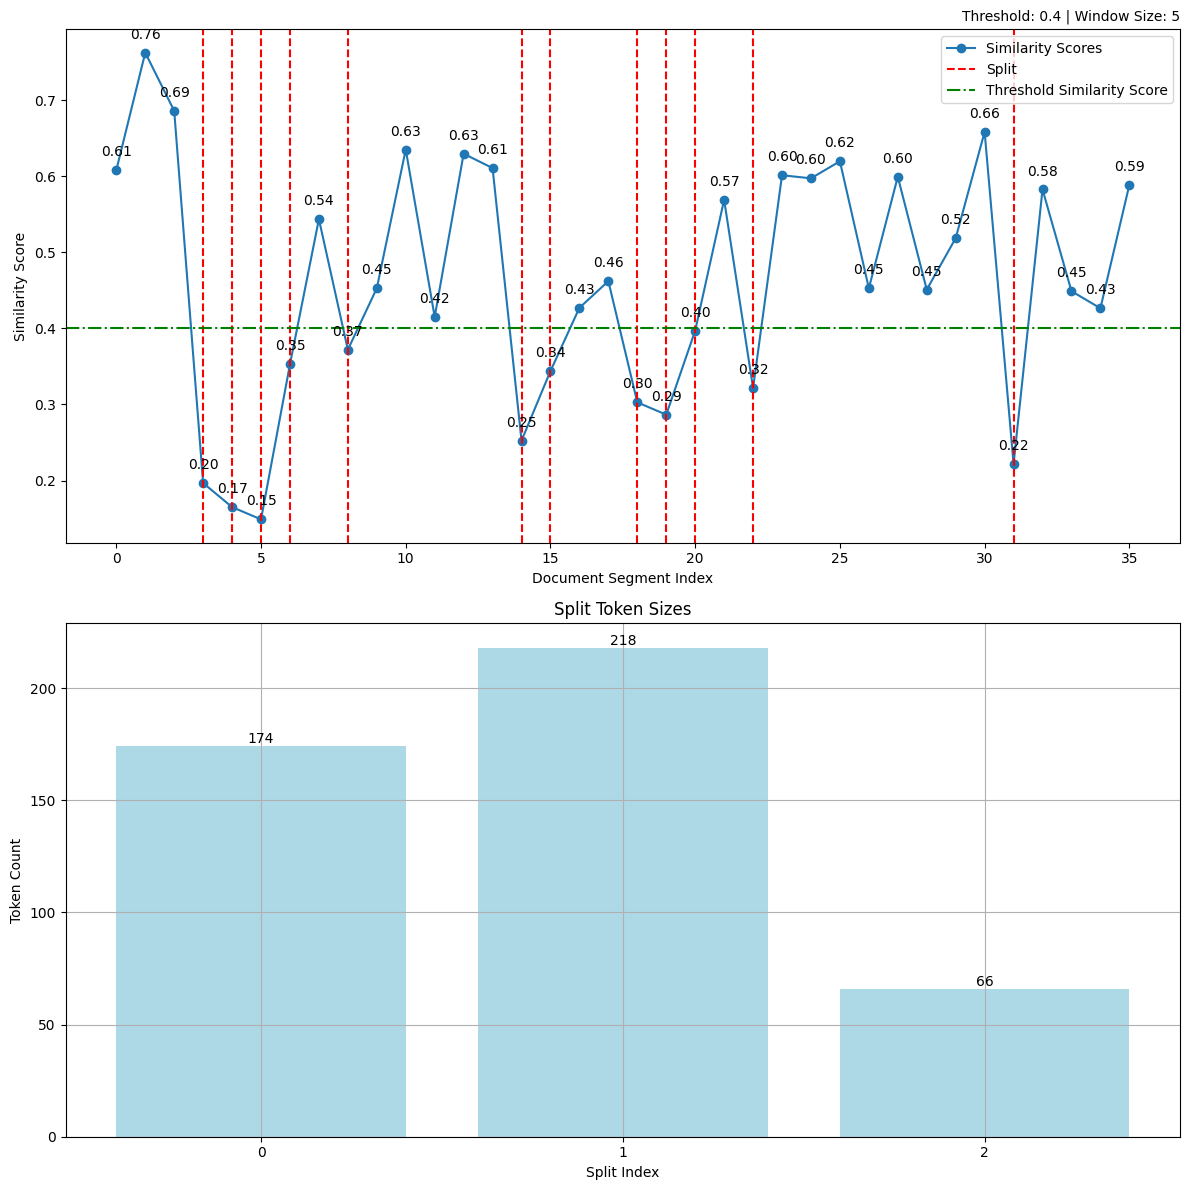

Splitting Statistics:
  - Total Documents: 37
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 66
  - Maximum Token Size of Split: 218
  - Similarity Split Ratio: 0.67
section_22.txt


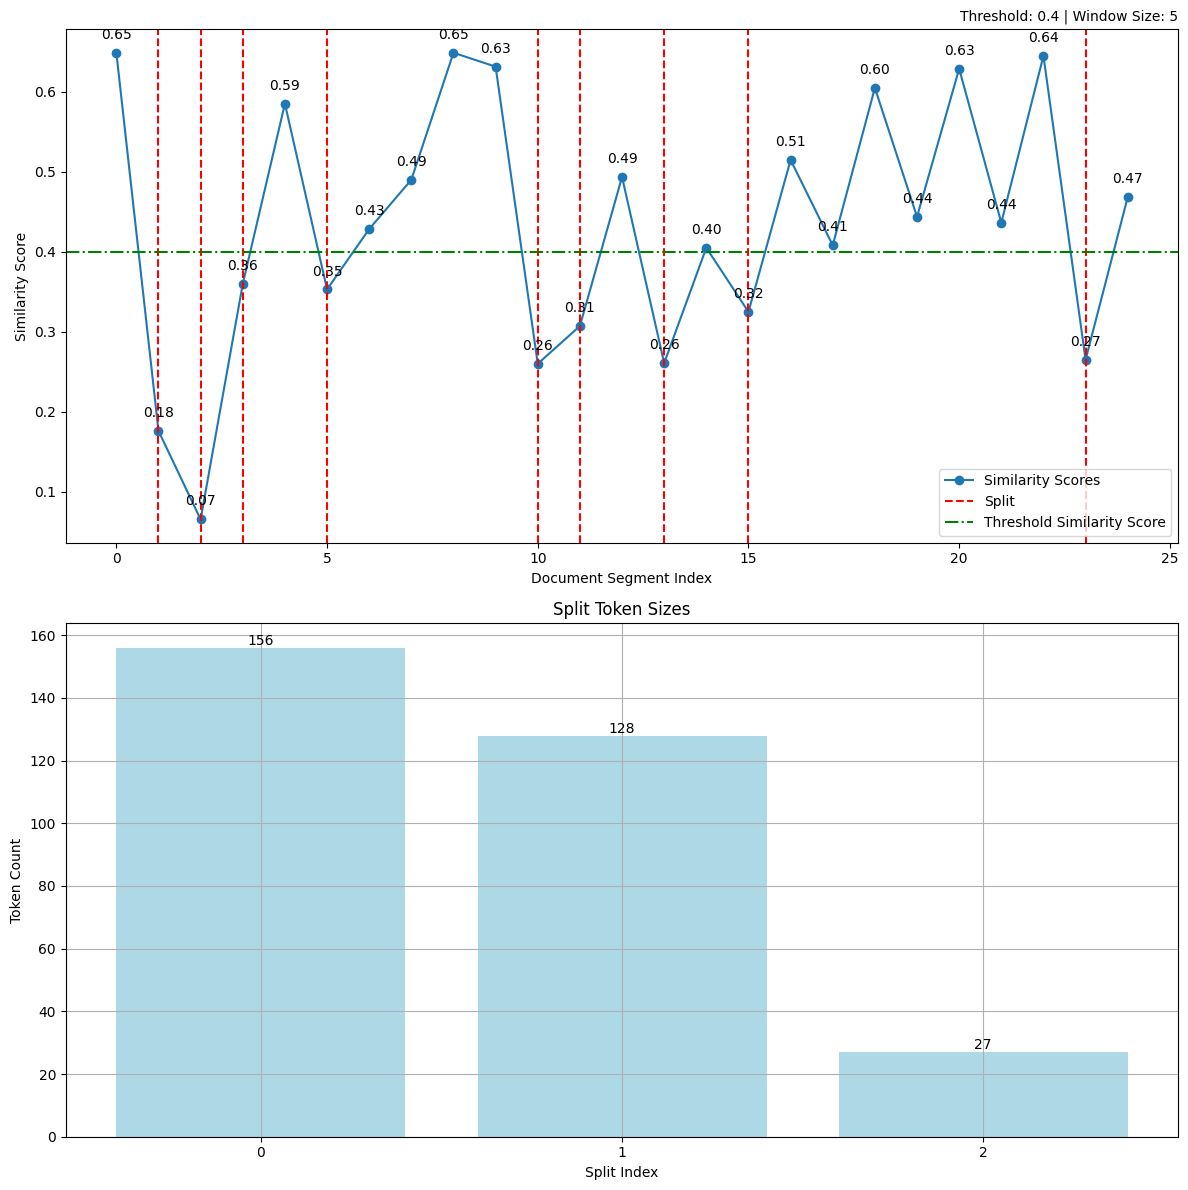

Splitting Statistics:
  - Total Documents: 26
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 27
  - Maximum Token Size of Split: 156
  - Similarity Split Ratio: 0.67
section_27.txt


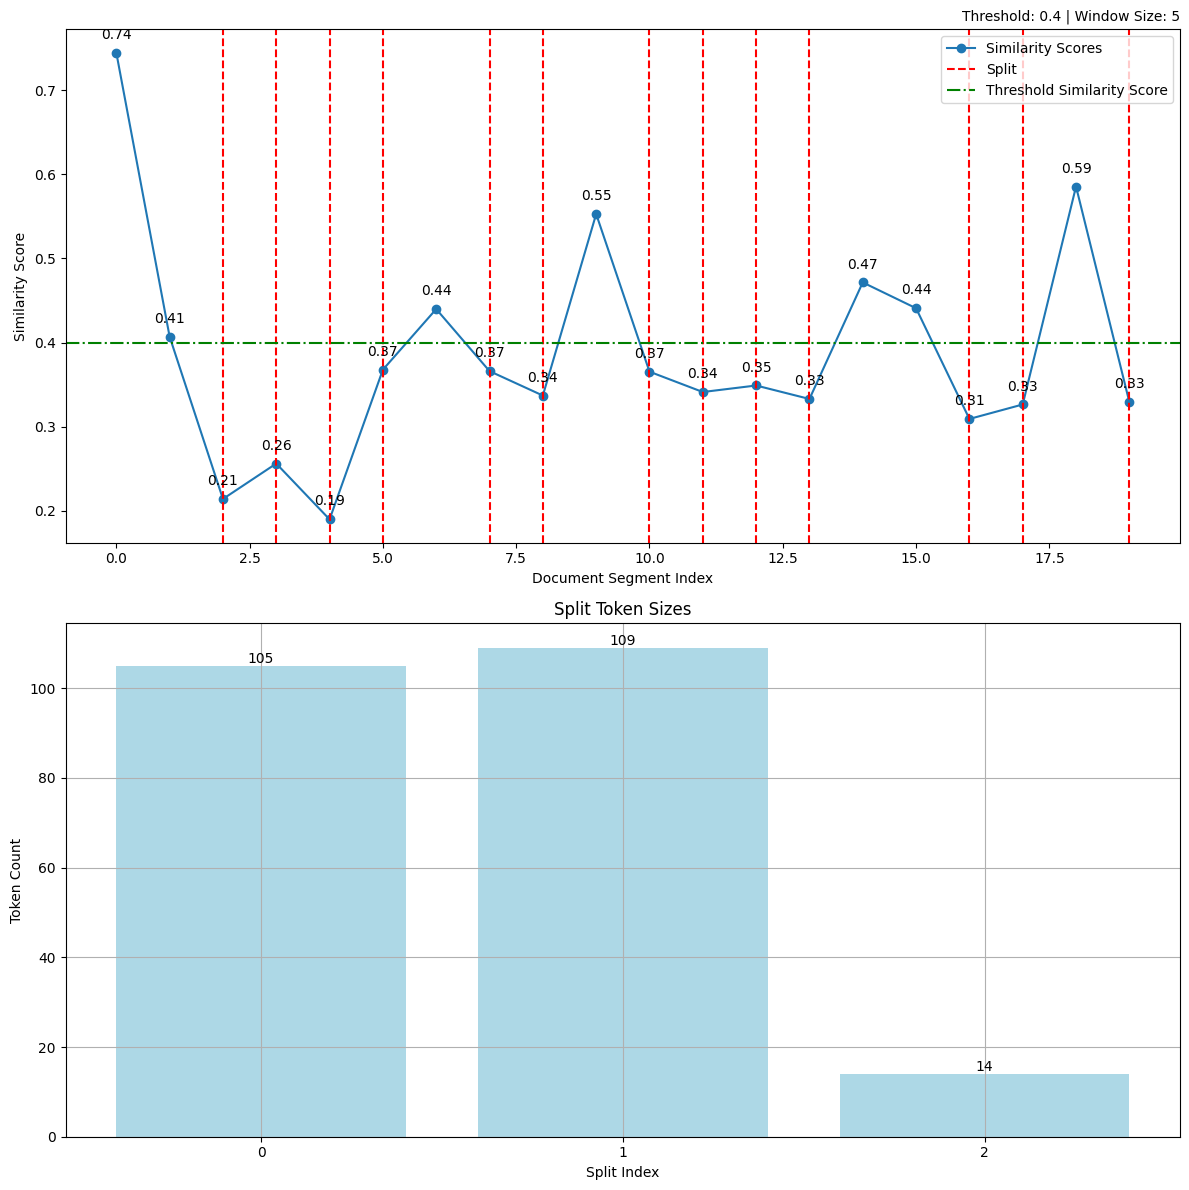

Splitting Statistics:
  - Total Documents: 21
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 14
  - Maximum Token Size of Split: 109
  - Similarity Split Ratio: 0.67
section_30.txt


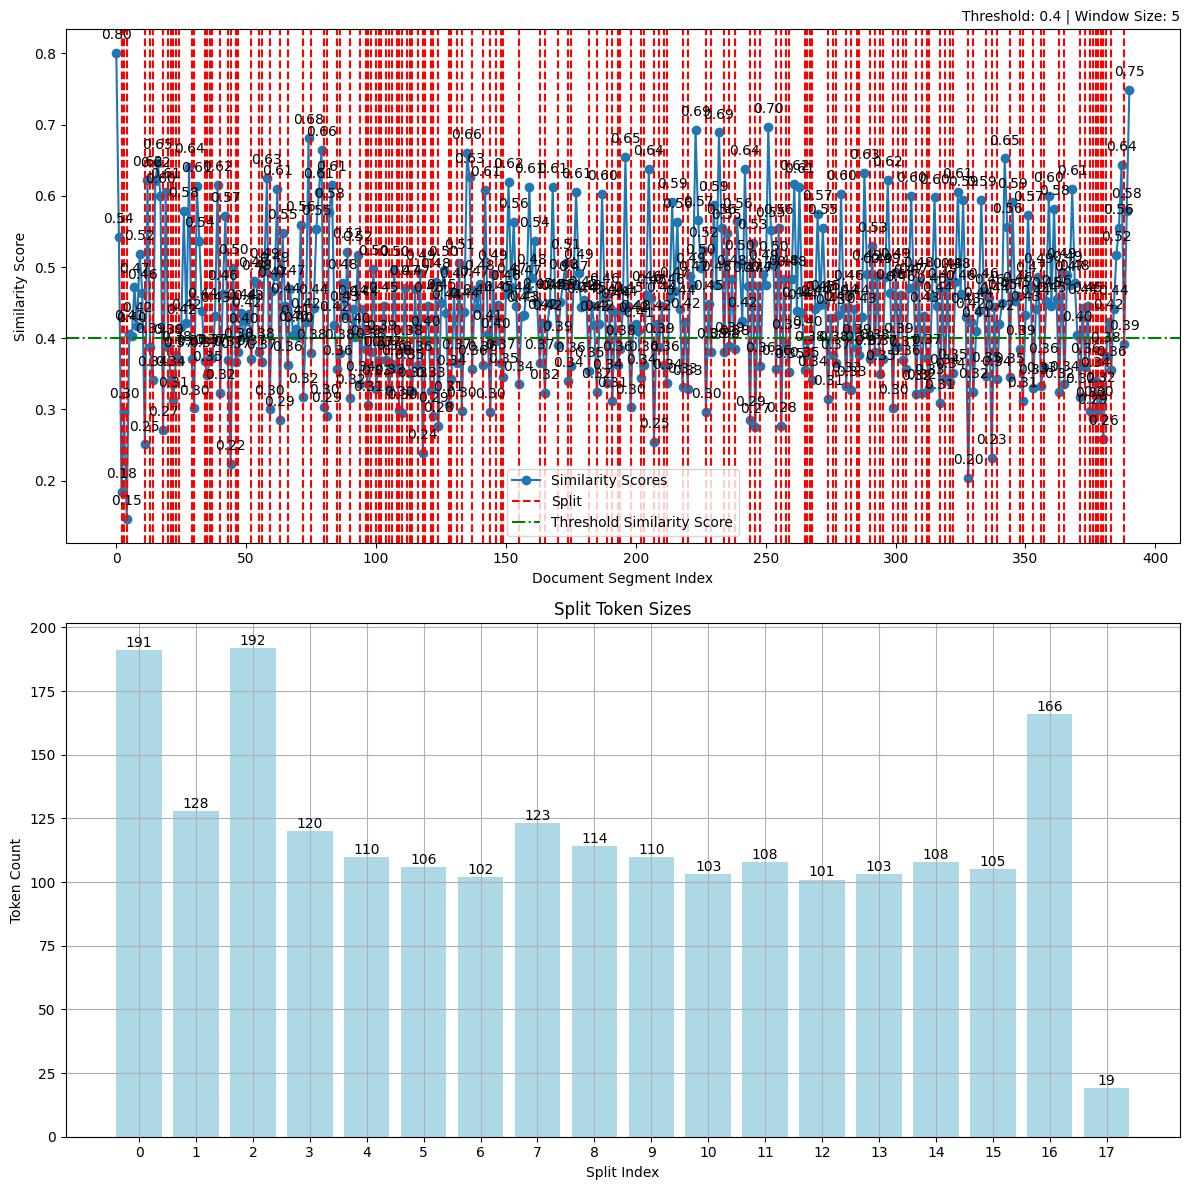

Splitting Statistics:
  - Total Documents: 392
  - Total Splits: 18
  - Splits by Threshold: 17
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 19
  - Maximum Token Size of Split: 192
  - Similarity Split Ratio: 0.94
section_47.txt


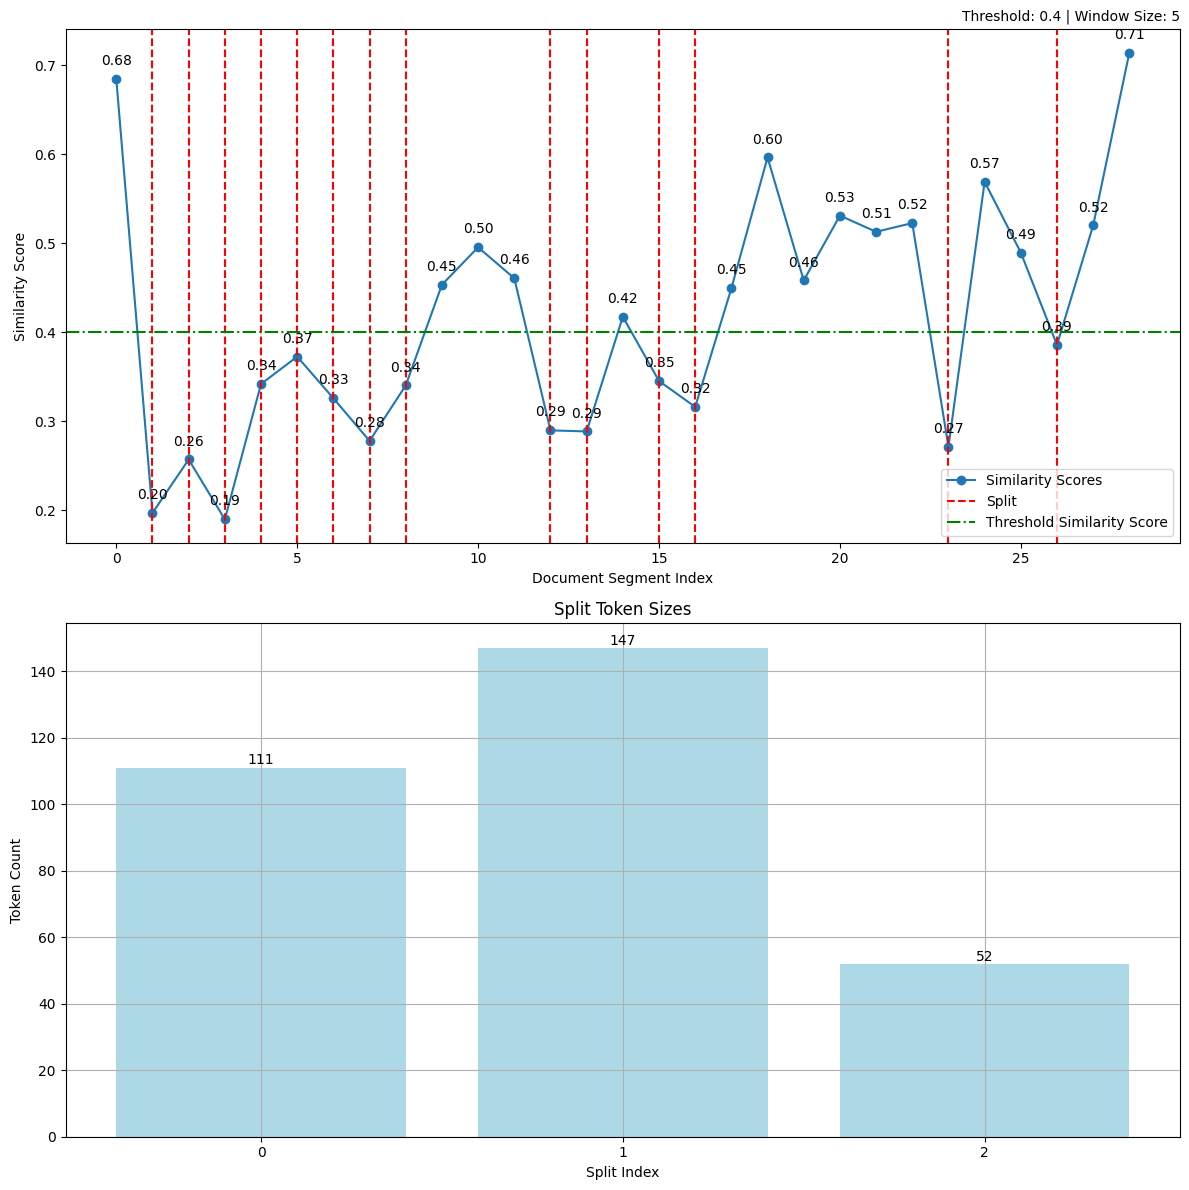

Splitting Statistics:
  - Total Documents: 30
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 52
  - Maximum Token Size of Split: 147
  - Similarity Split Ratio: 0.67
section_44.txt


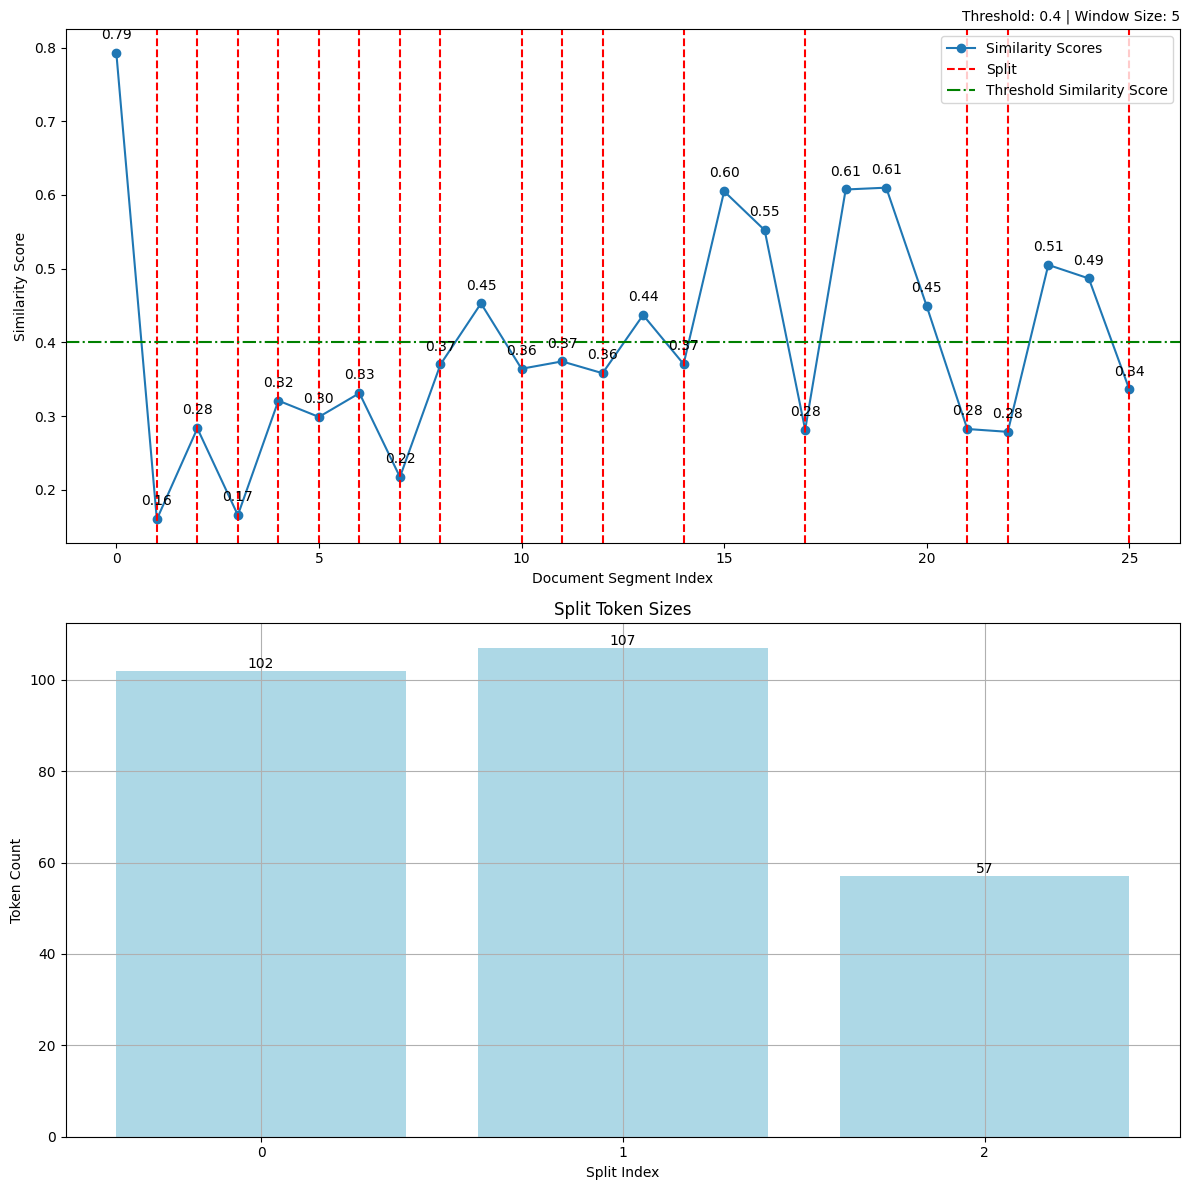

Splitting Statistics:
  - Total Documents: 27
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 57
  - Maximum Token Size of Split: 107
  - Similarity Split Ratio: 0.67
section_34.txt


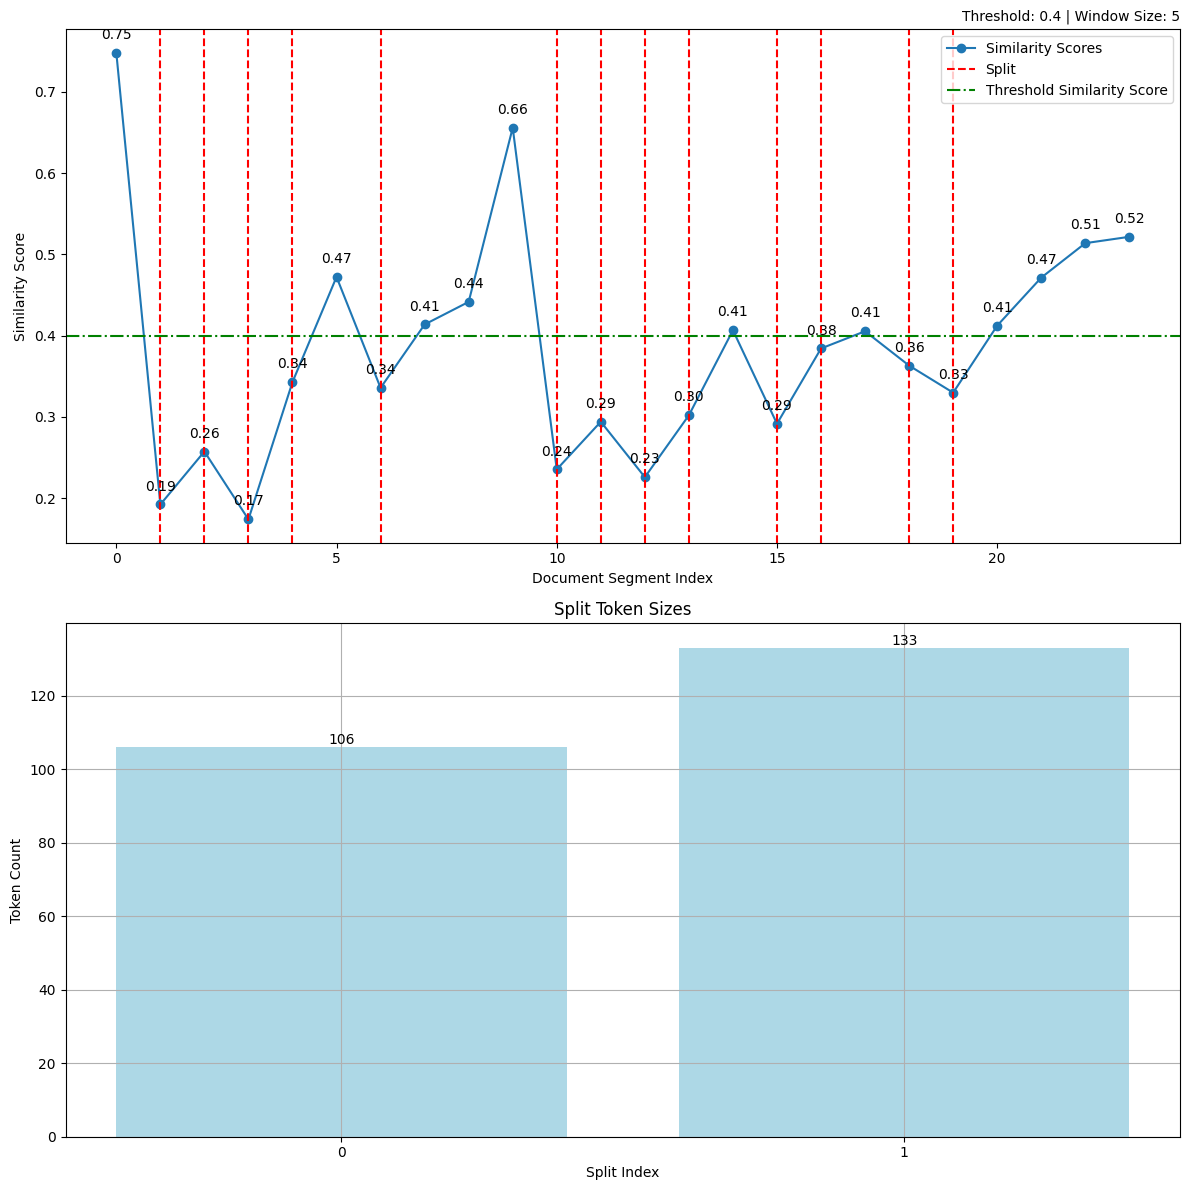

Splitting Statistics:
  - Total Documents: 25
  - Total Splits: 2
  - Splits by Threshold: 1
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 106
  - Maximum Token Size of Split: 133
  - Similarity Split Ratio: 0.50
section_33.txt


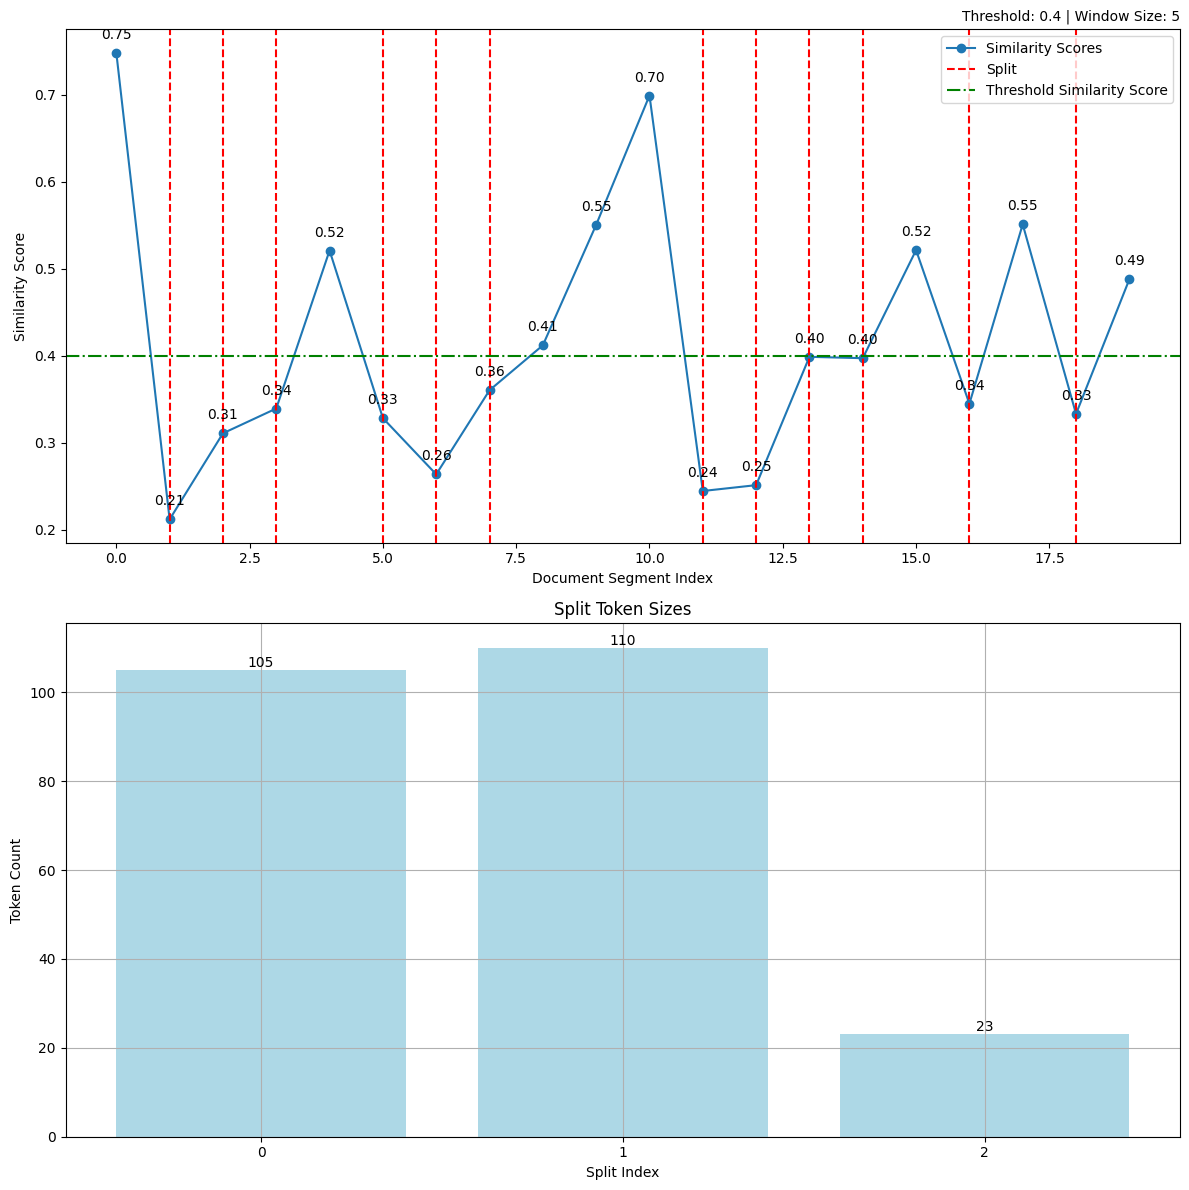

Splitting Statistics:
  - Total Documents: 21
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 23
  - Maximum Token Size of Split: 110
  - Similarity Split Ratio: 0.67
section_15.txt


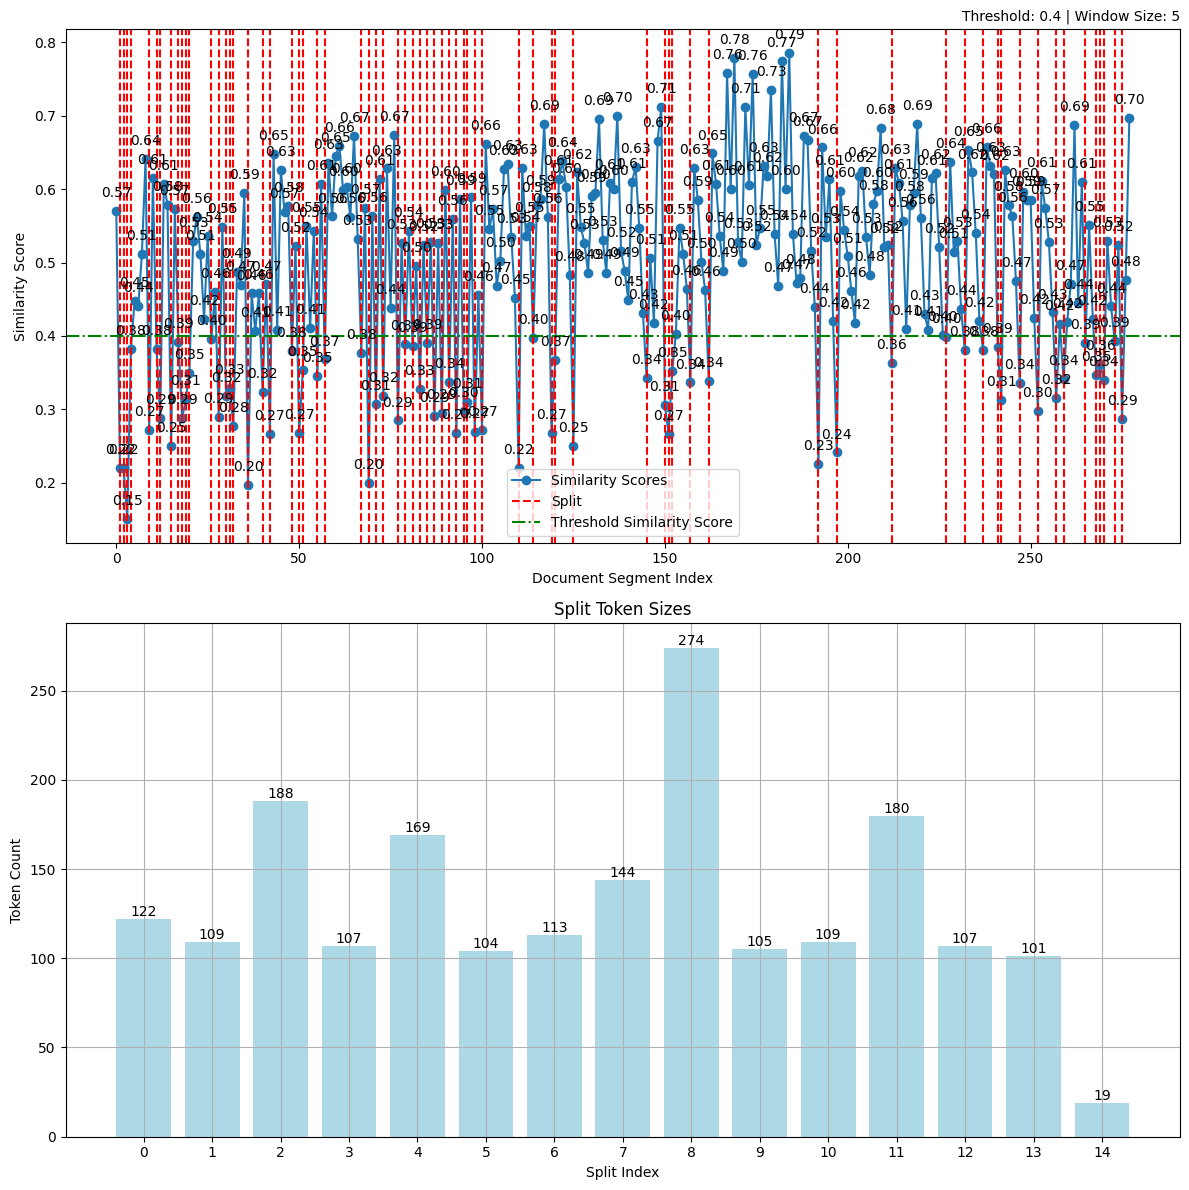

Splitting Statistics:
  - Total Documents: 279
  - Total Splits: 15
  - Splits by Threshold: 14
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 19
  - Maximum Token Size of Split: 274
  - Similarity Split Ratio: 0.93
section_31.txt


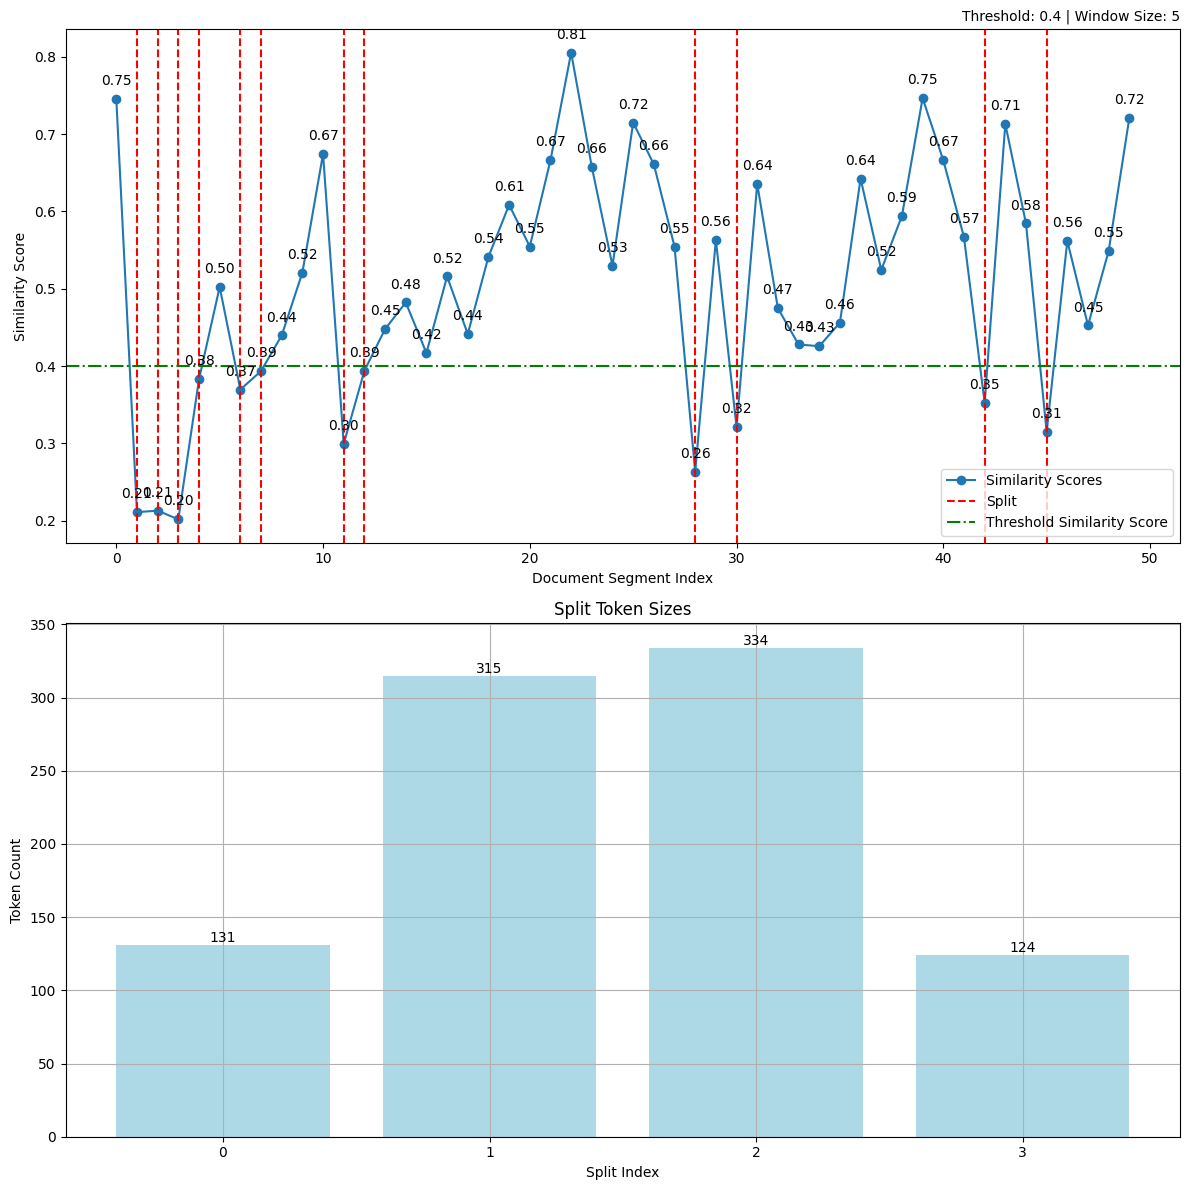

Splitting Statistics:
  - Total Documents: 51
  - Total Splits: 4
  - Splits by Threshold: 3
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 124
  - Maximum Token Size of Split: 334
  - Similarity Split Ratio: 0.75
section_21.txt


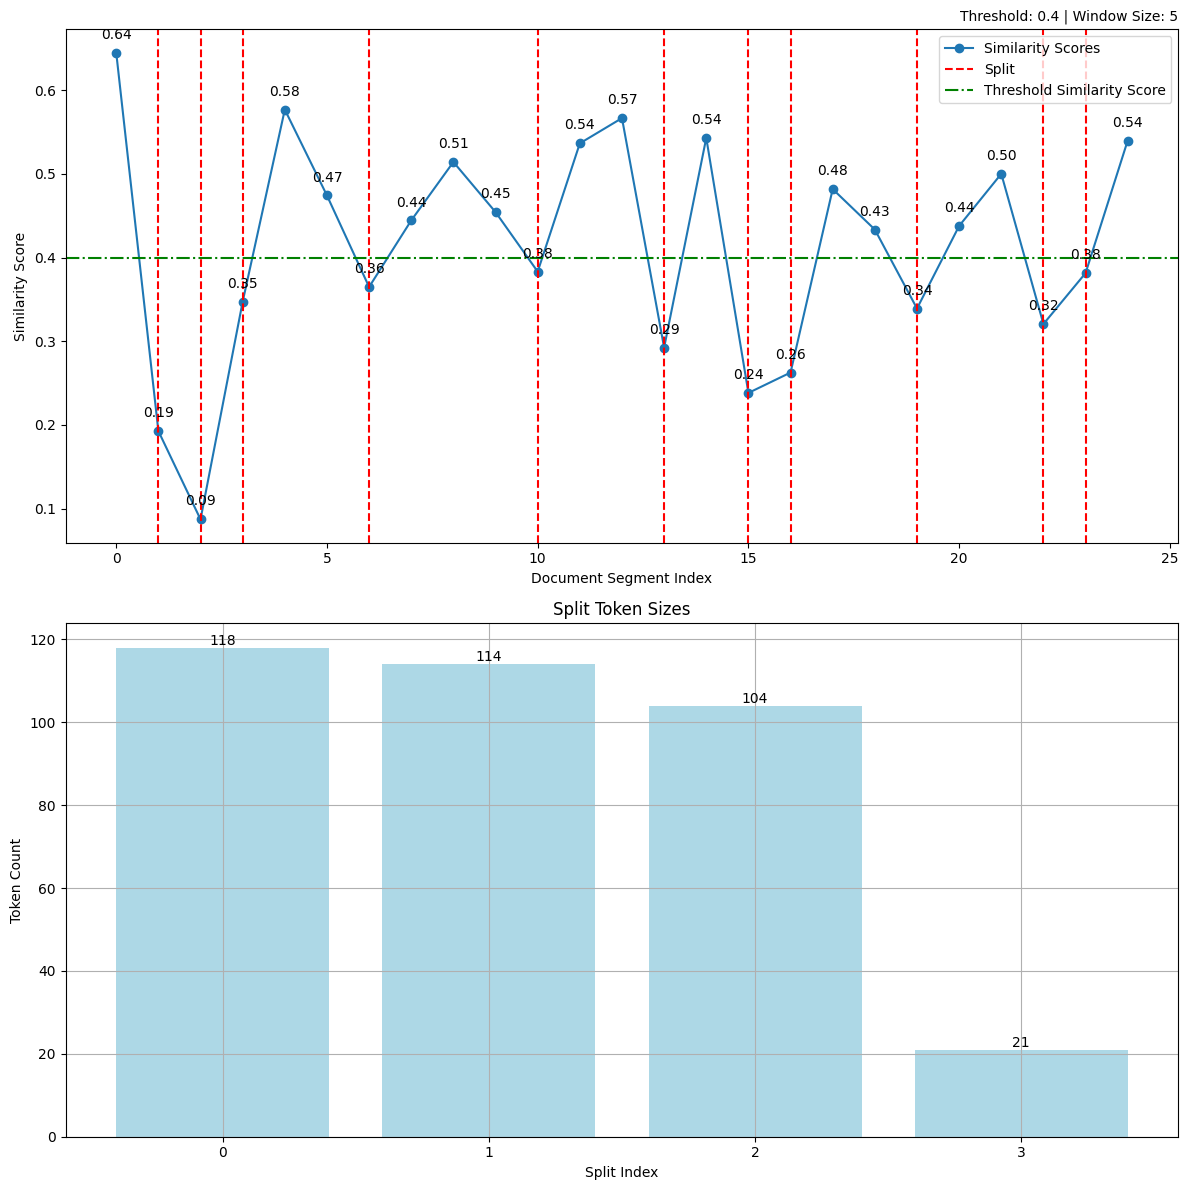

Splitting Statistics:
  - Total Documents: 26
  - Total Splits: 4
  - Splits by Threshold: 3
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 21
  - Maximum Token Size of Split: 118
  - Similarity Split Ratio: 0.75
section_87.txt


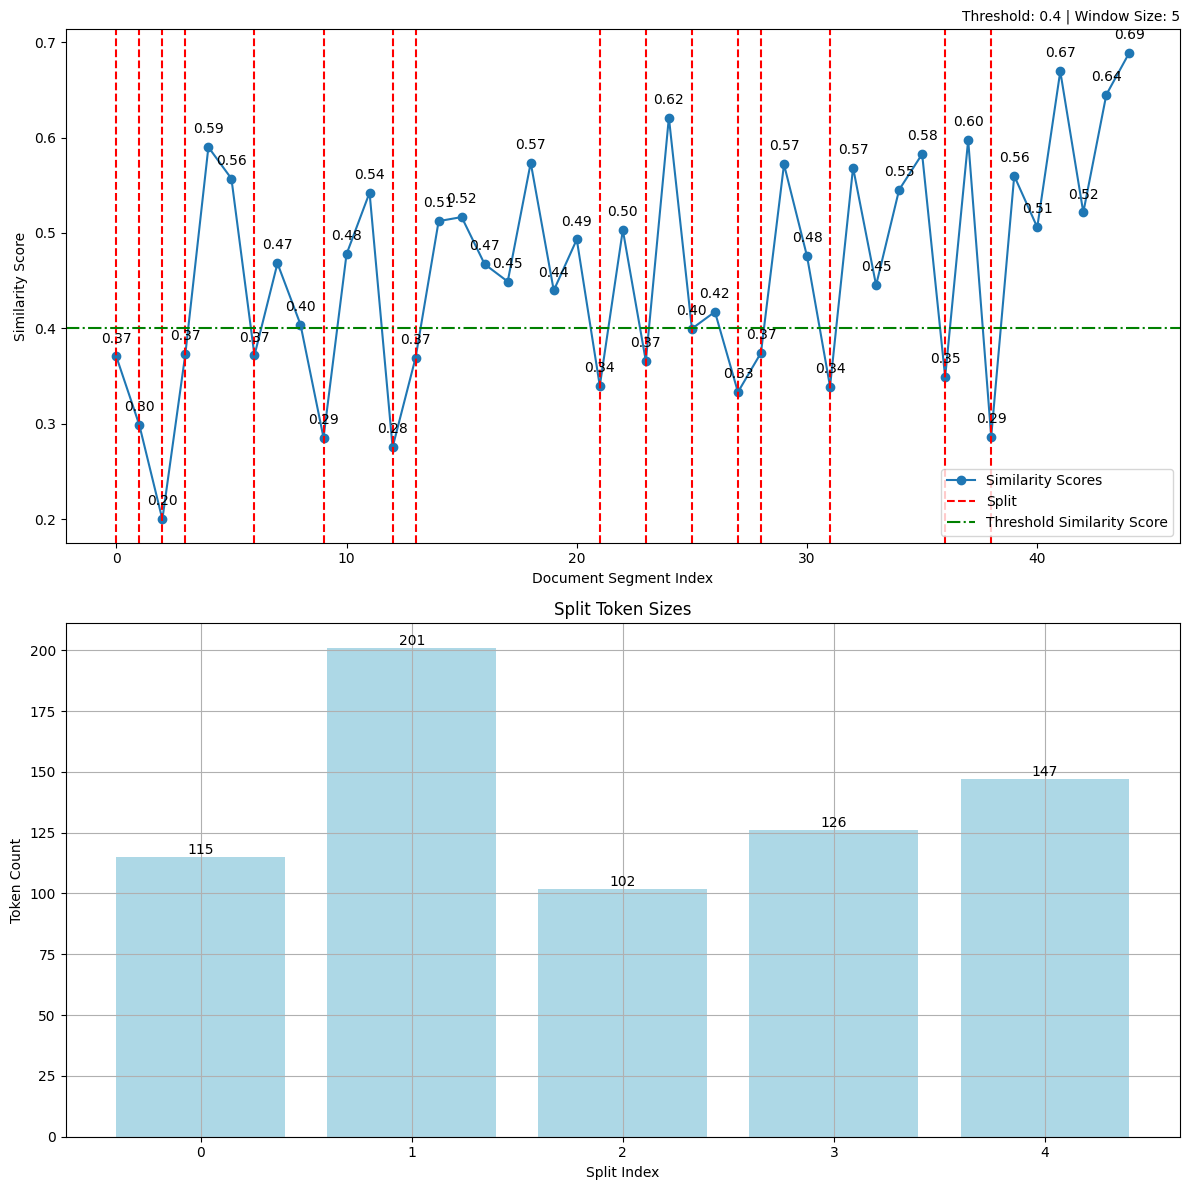

Splitting Statistics:
  - Total Documents: 46
  - Total Splits: 5
  - Splits by Threshold: 4
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 102
  - Maximum Token Size of Split: 201
  - Similarity Split Ratio: 0.80
section_229.txt


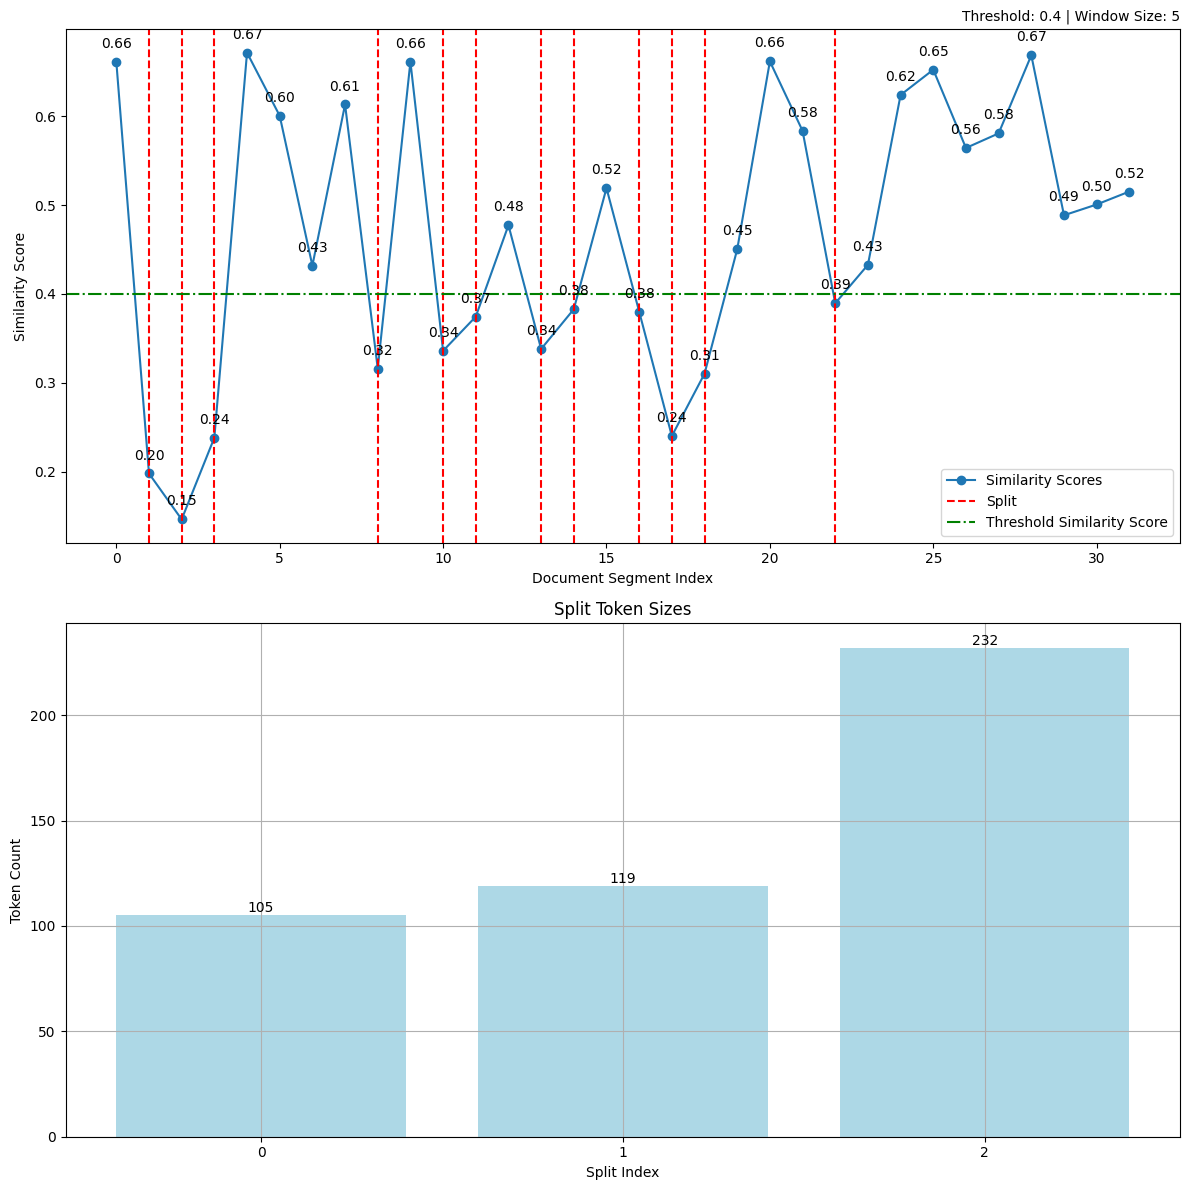

Splitting Statistics:
  - Total Documents: 33
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 105
  - Maximum Token Size of Split: 232
  - Similarity Split Ratio: 0.67
section_28.txt


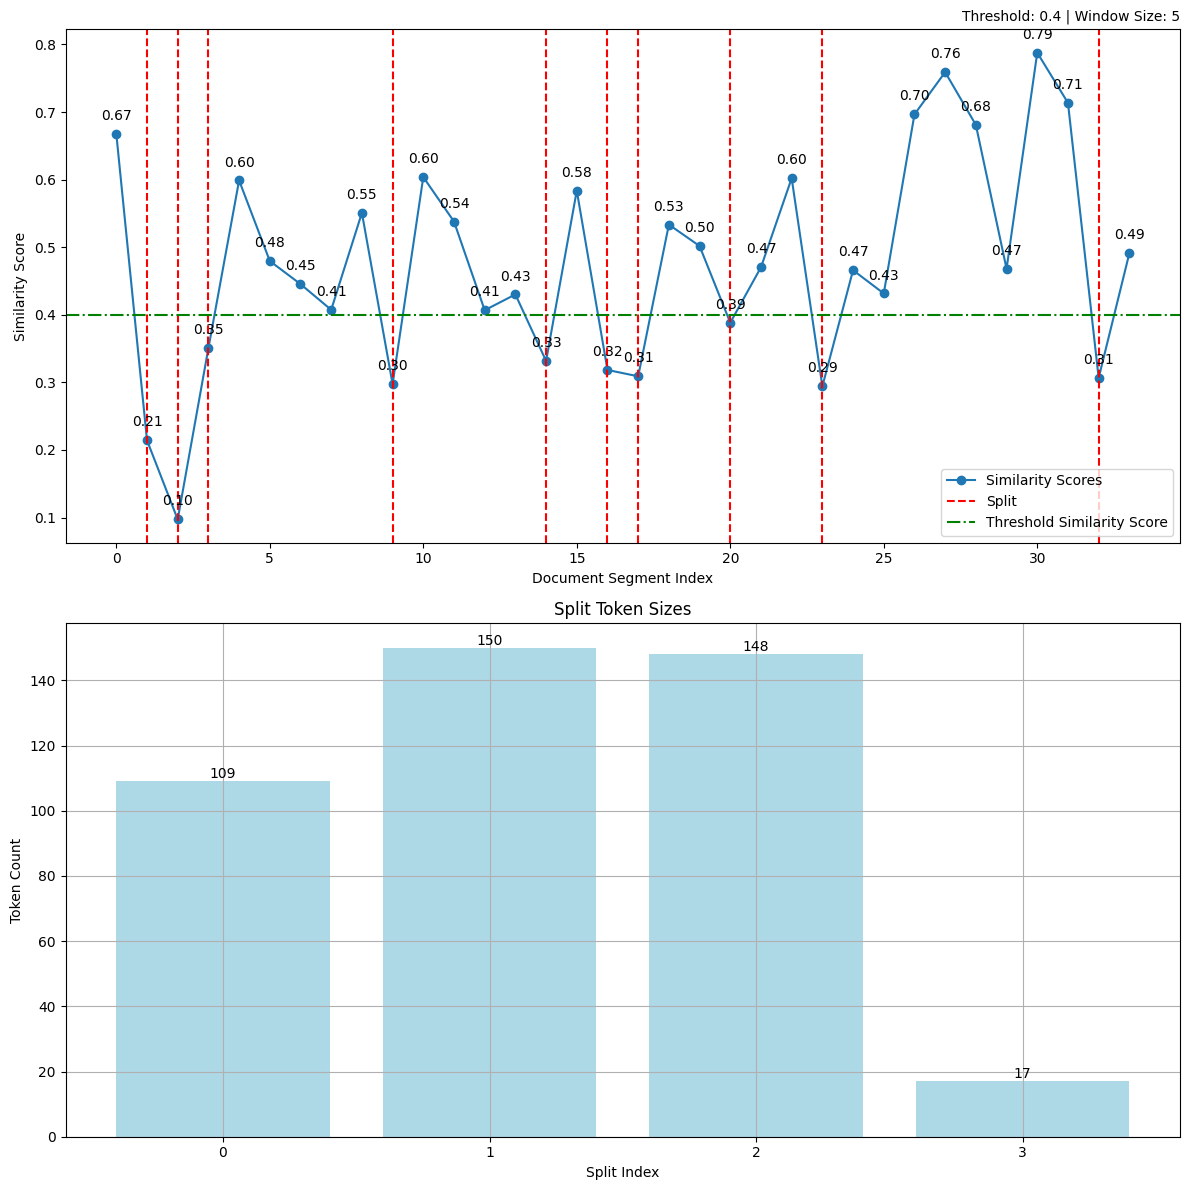

Splitting Statistics:
  - Total Documents: 35
  - Total Splits: 4
  - Splits by Threshold: 3
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 17
  - Maximum Token Size of Split: 150
  - Similarity Split Ratio: 0.75
section_46.txt


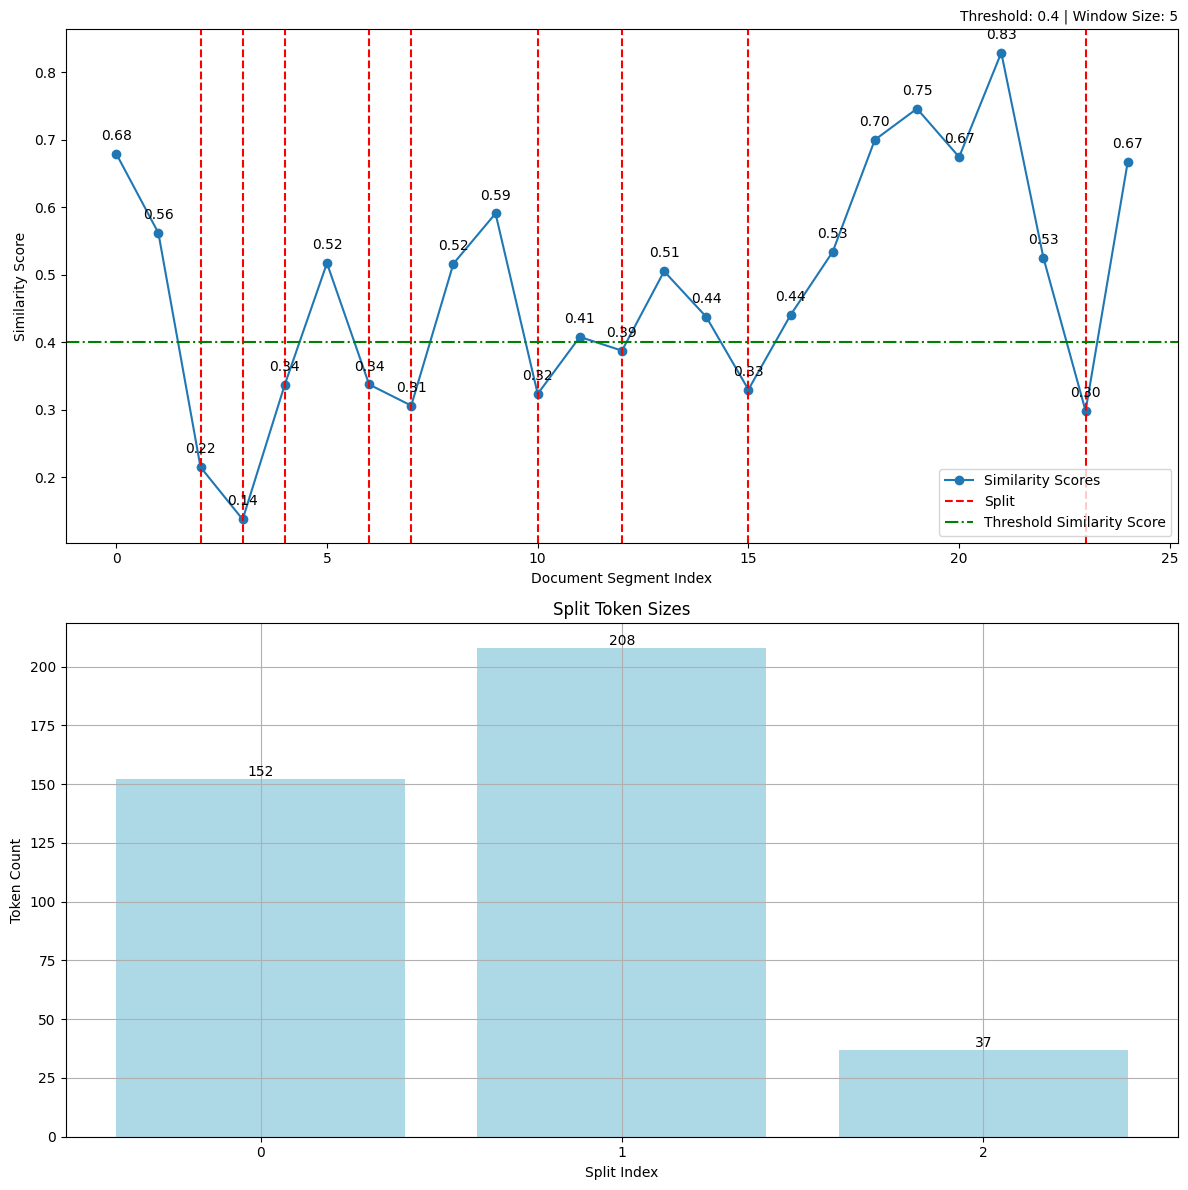

Splitting Statistics:
  - Total Documents: 26
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 37
  - Maximum Token Size of Split: 208
  - Similarity Split Ratio: 0.67
section_192.txt


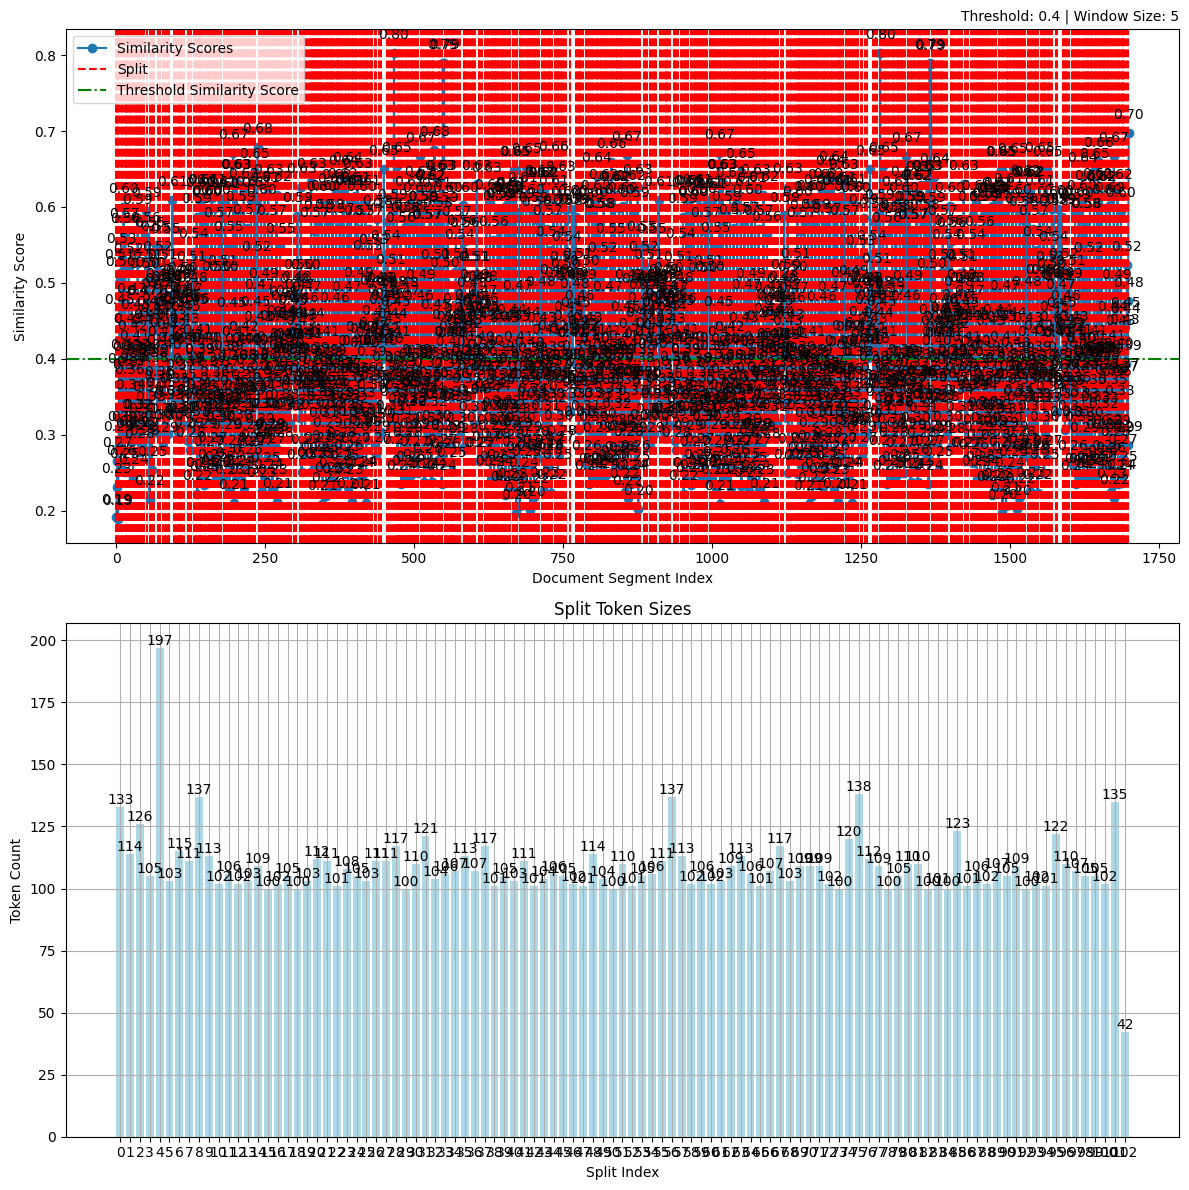

Splitting Statistics:
  - Total Documents: 1701
  - Total Splits: 103
  - Splits by Threshold: 102
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 42
  - Maximum Token Size of Split: 197
  - Similarity Split Ratio: 0.99
section_122.txt


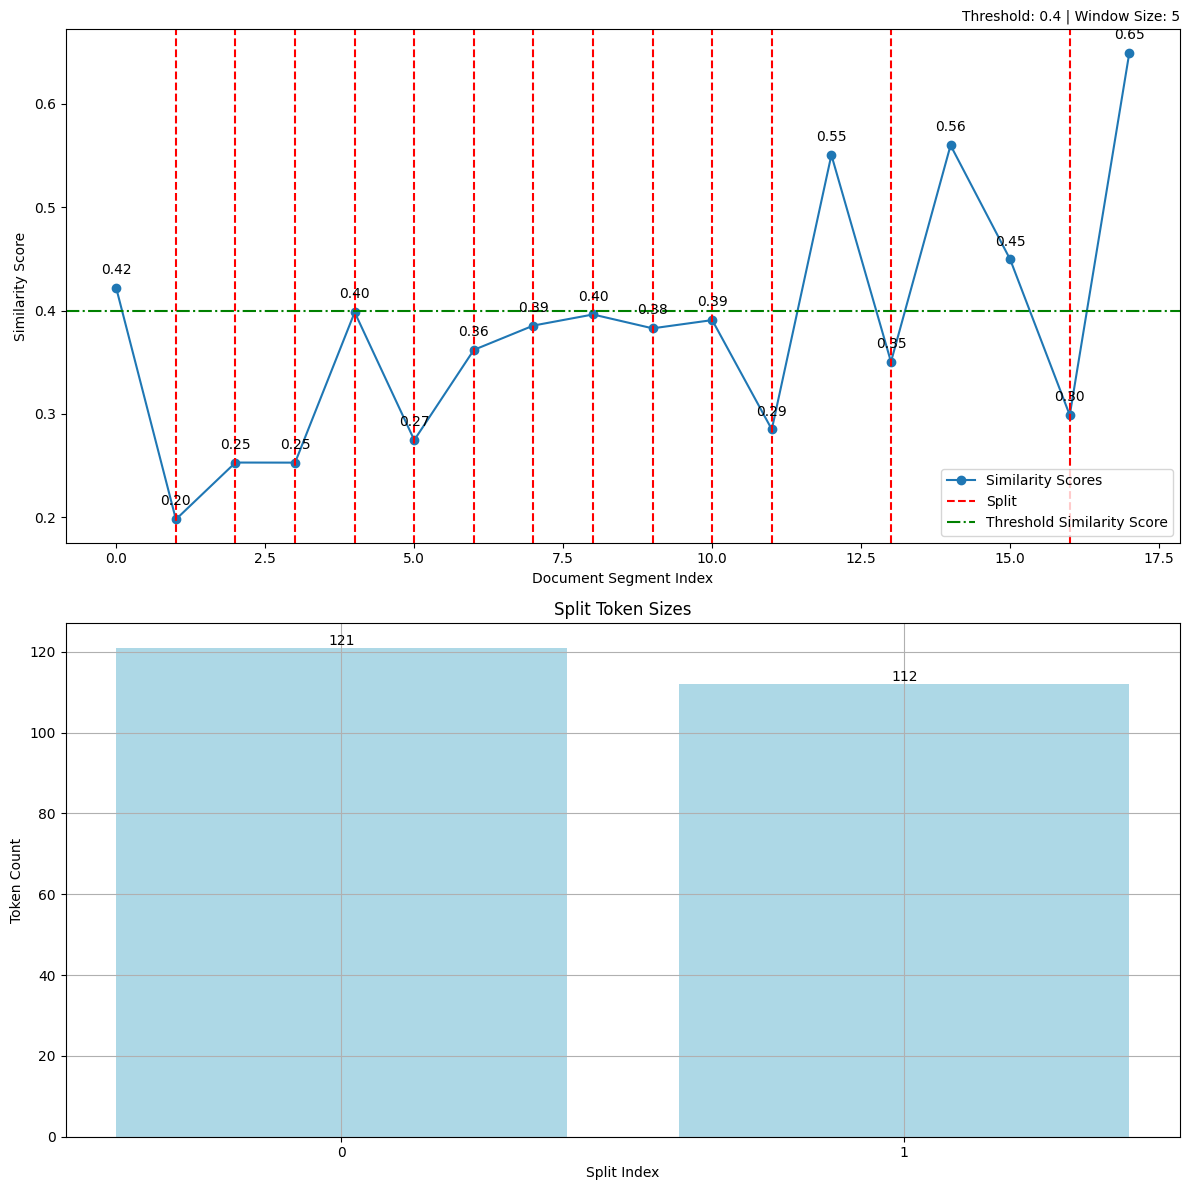

Splitting Statistics:
  - Total Documents: 19
  - Total Splits: 2
  - Splits by Threshold: 1
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 112
  - Maximum Token Size of Split: 121
  - Similarity Split Ratio: 0.50
section_1.txt


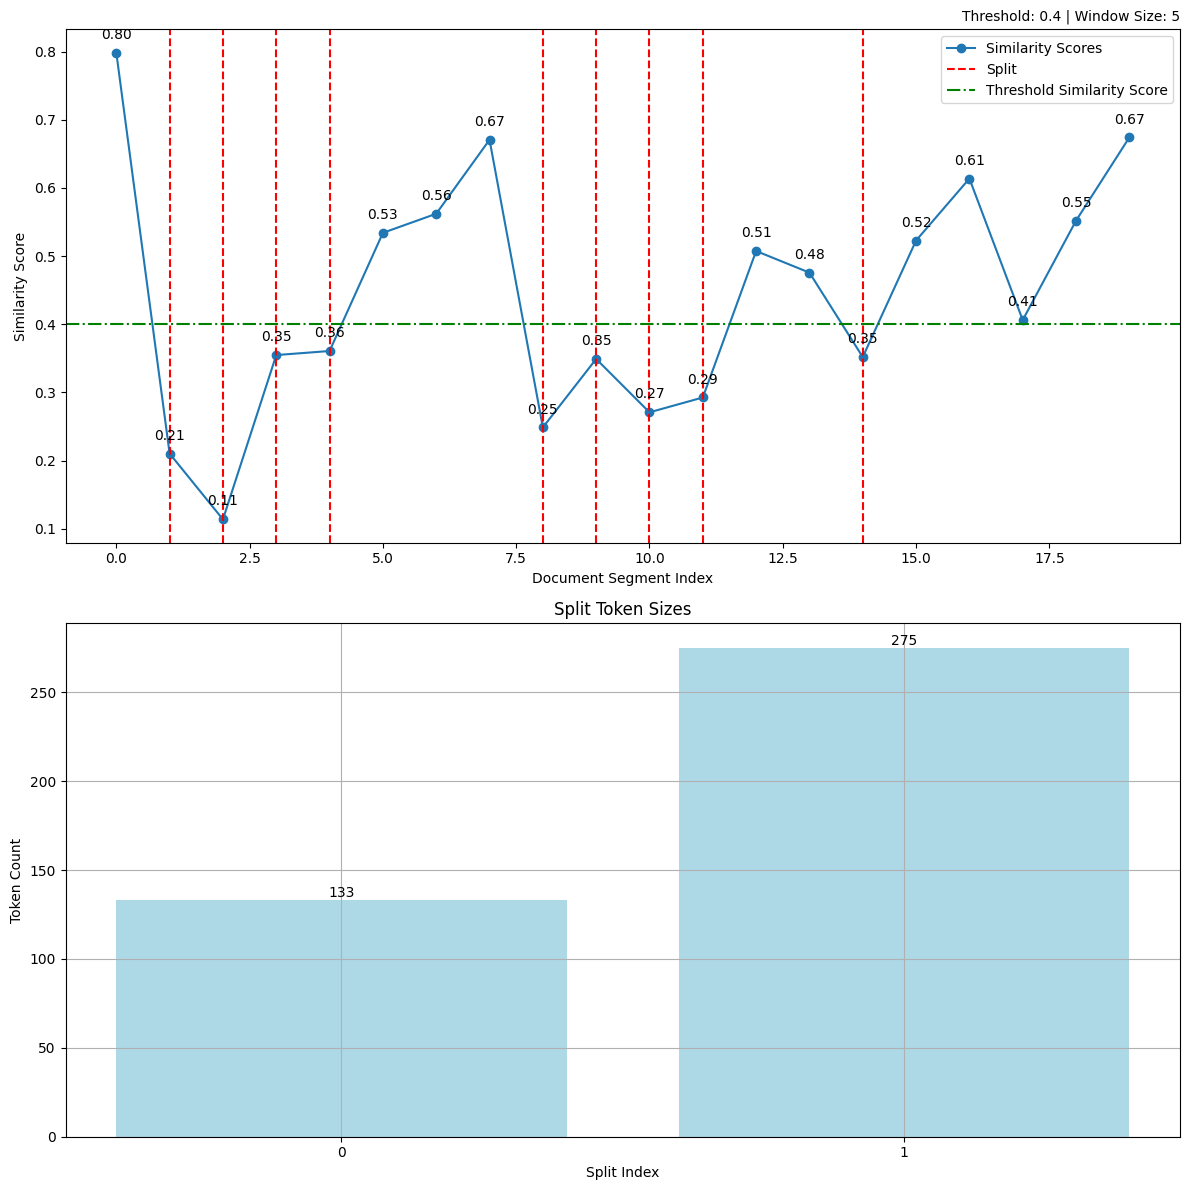

Splitting Statistics:
  - Total Documents: 21
  - Total Splits: 2
  - Splits by Threshold: 1
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 133
  - Maximum Token Size of Split: 275
  - Similarity Split Ratio: 0.50
section_9.txt


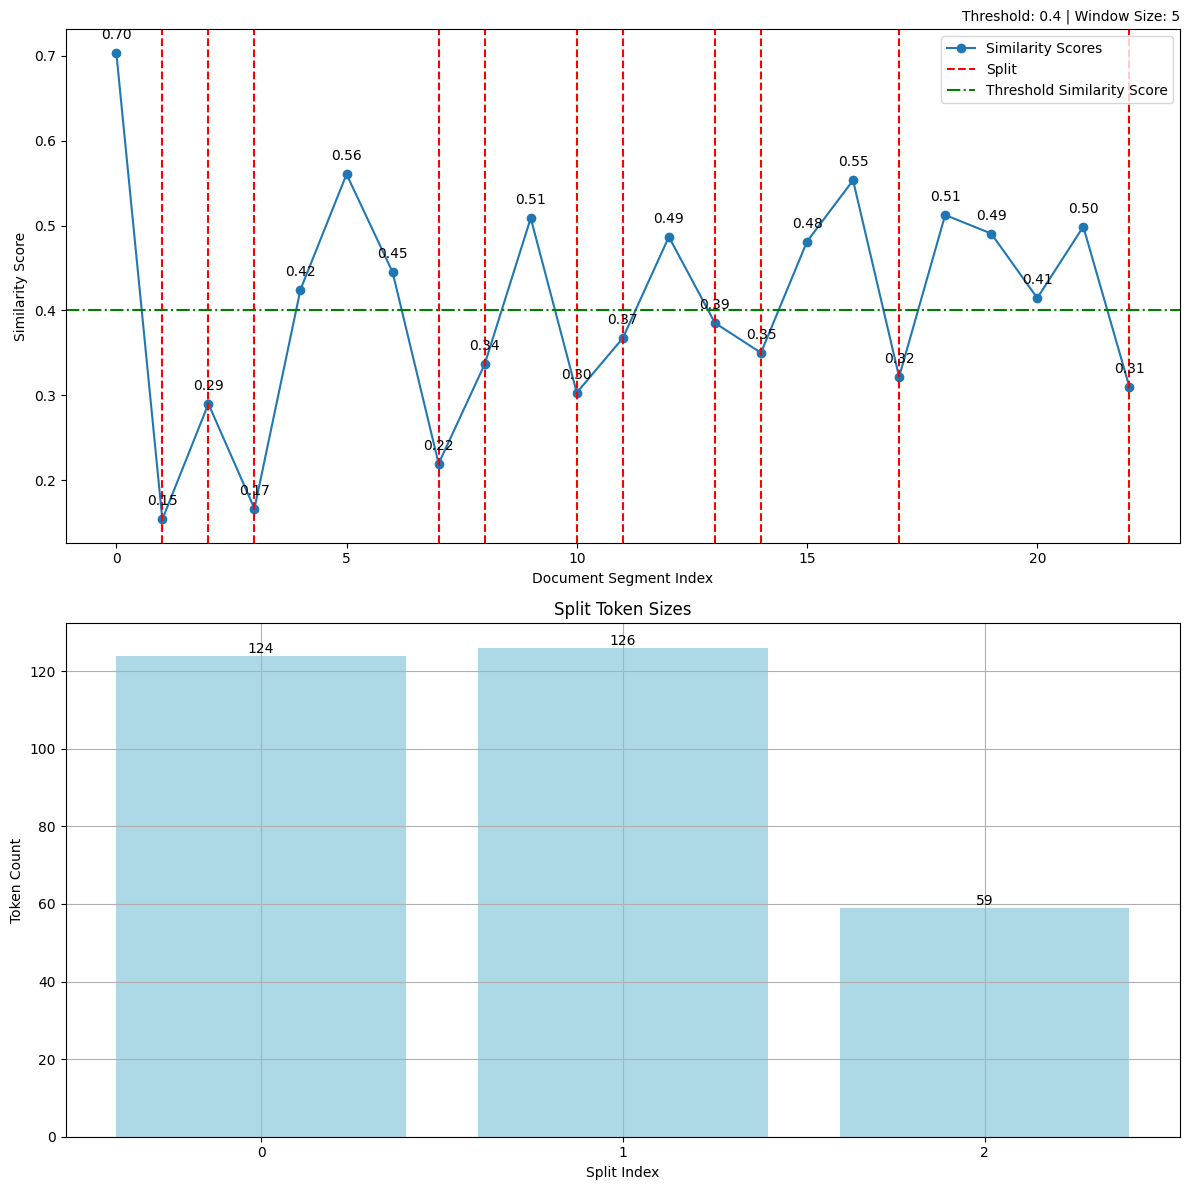

Splitting Statistics:
  - Total Documents: 24
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 59
  - Maximum Token Size of Split: 126
  - Similarity Split Ratio: 0.67
section_11.txt


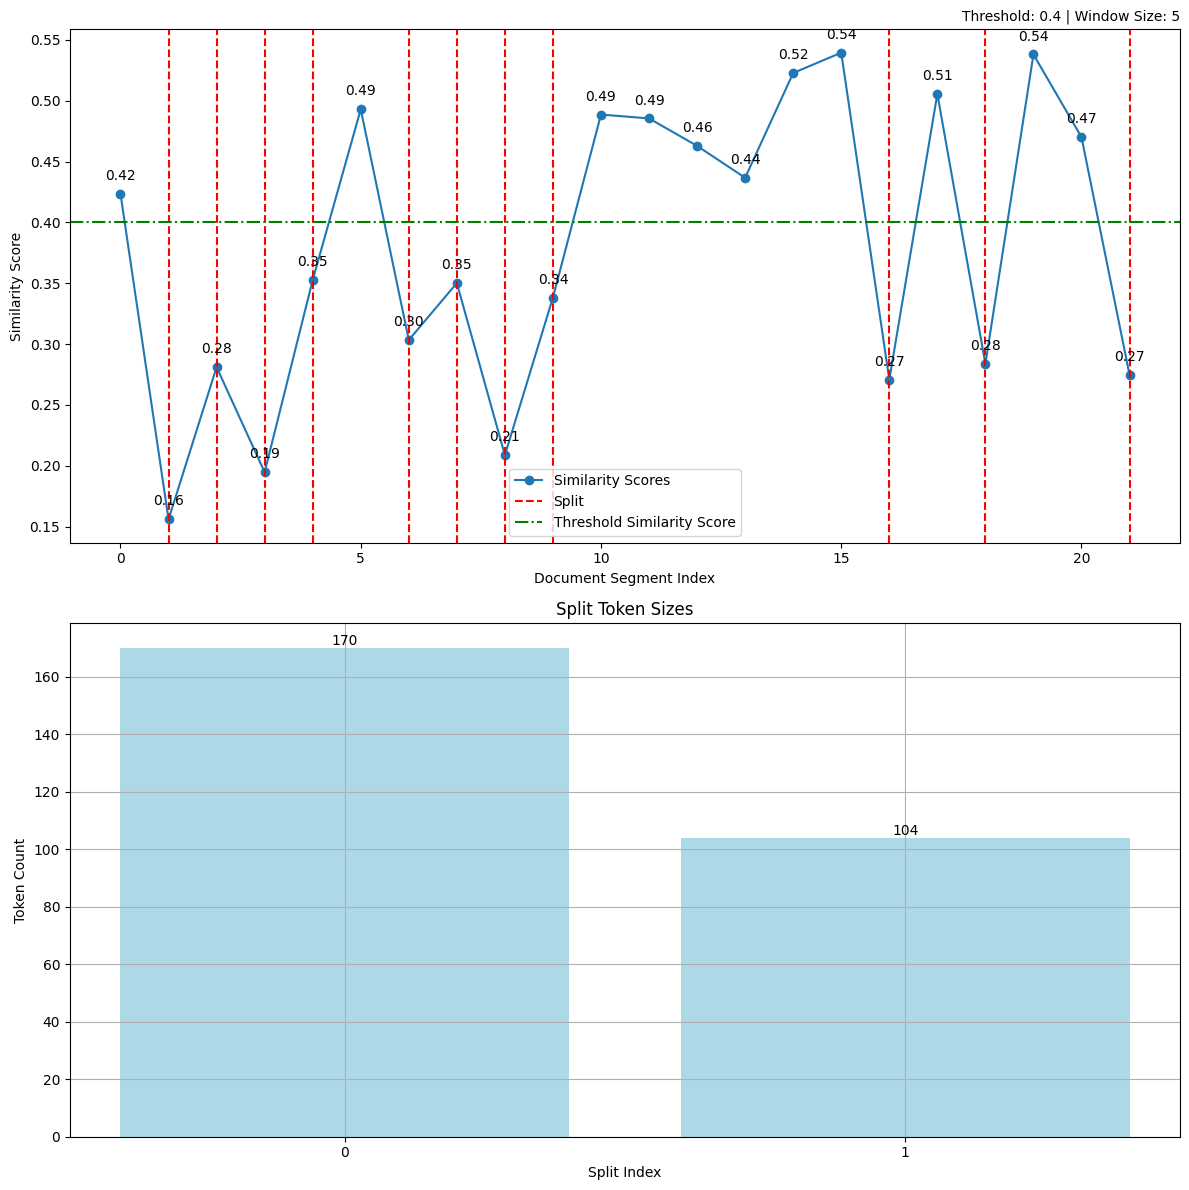

Splitting Statistics:
  - Total Documents: 23
  - Total Splits: 2
  - Splits by Threshold: 1
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 104
  - Maximum Token Size of Split: 170
  - Similarity Split Ratio: 0.50
section_17.txt


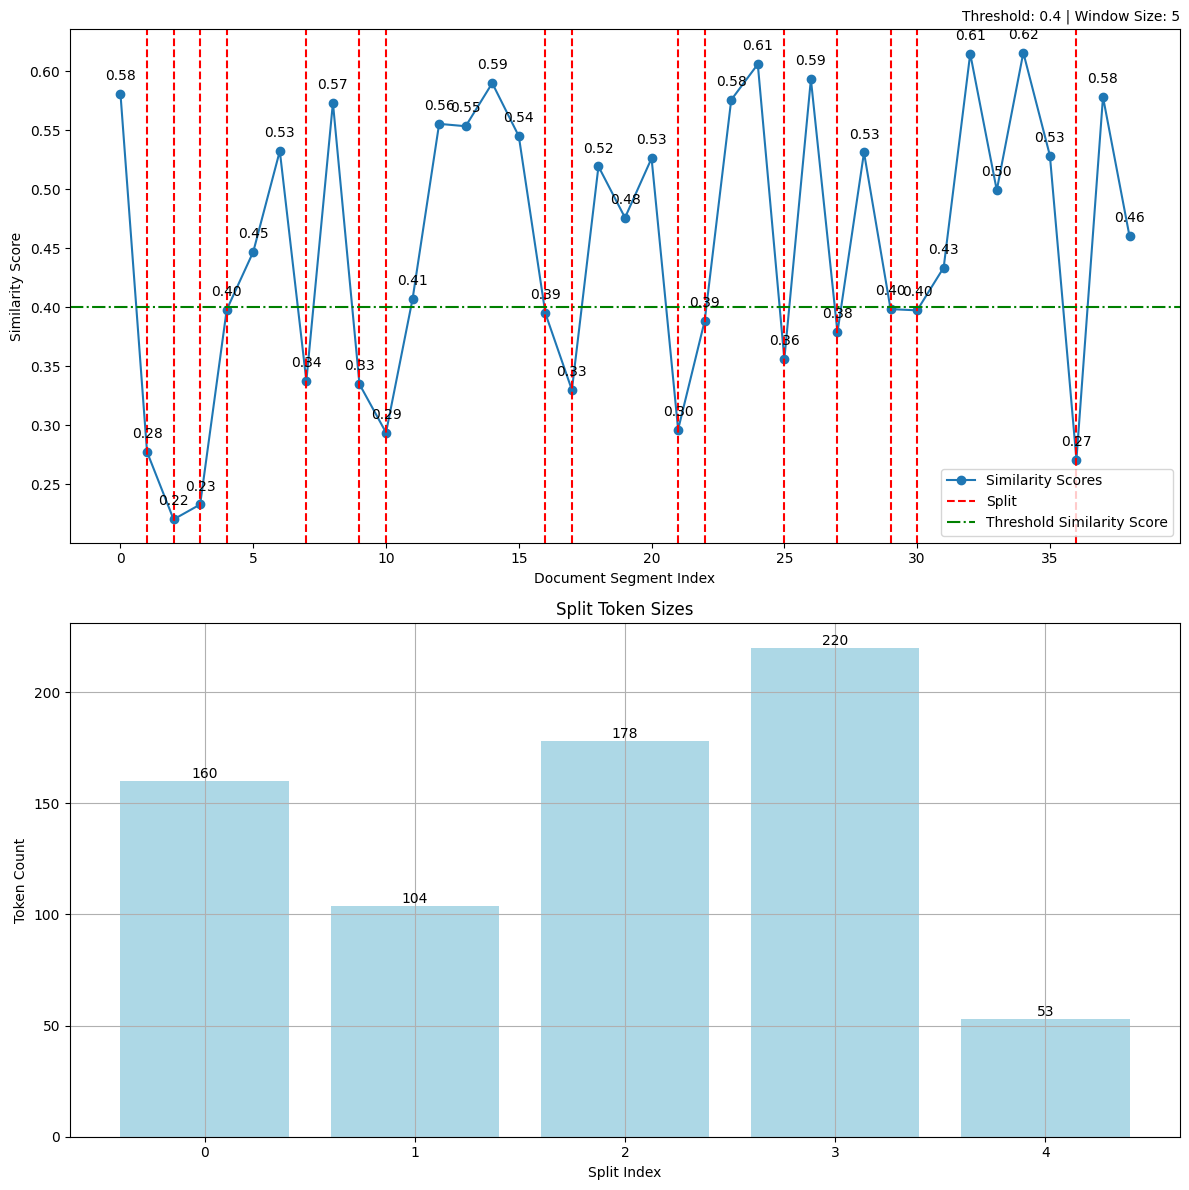

Splitting Statistics:
  - Total Documents: 40
  - Total Splits: 5
  - Splits by Threshold: 4
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 53
  - Maximum Token Size of Split: 220
  - Similarity Split Ratio: 0.80
section_137.txt


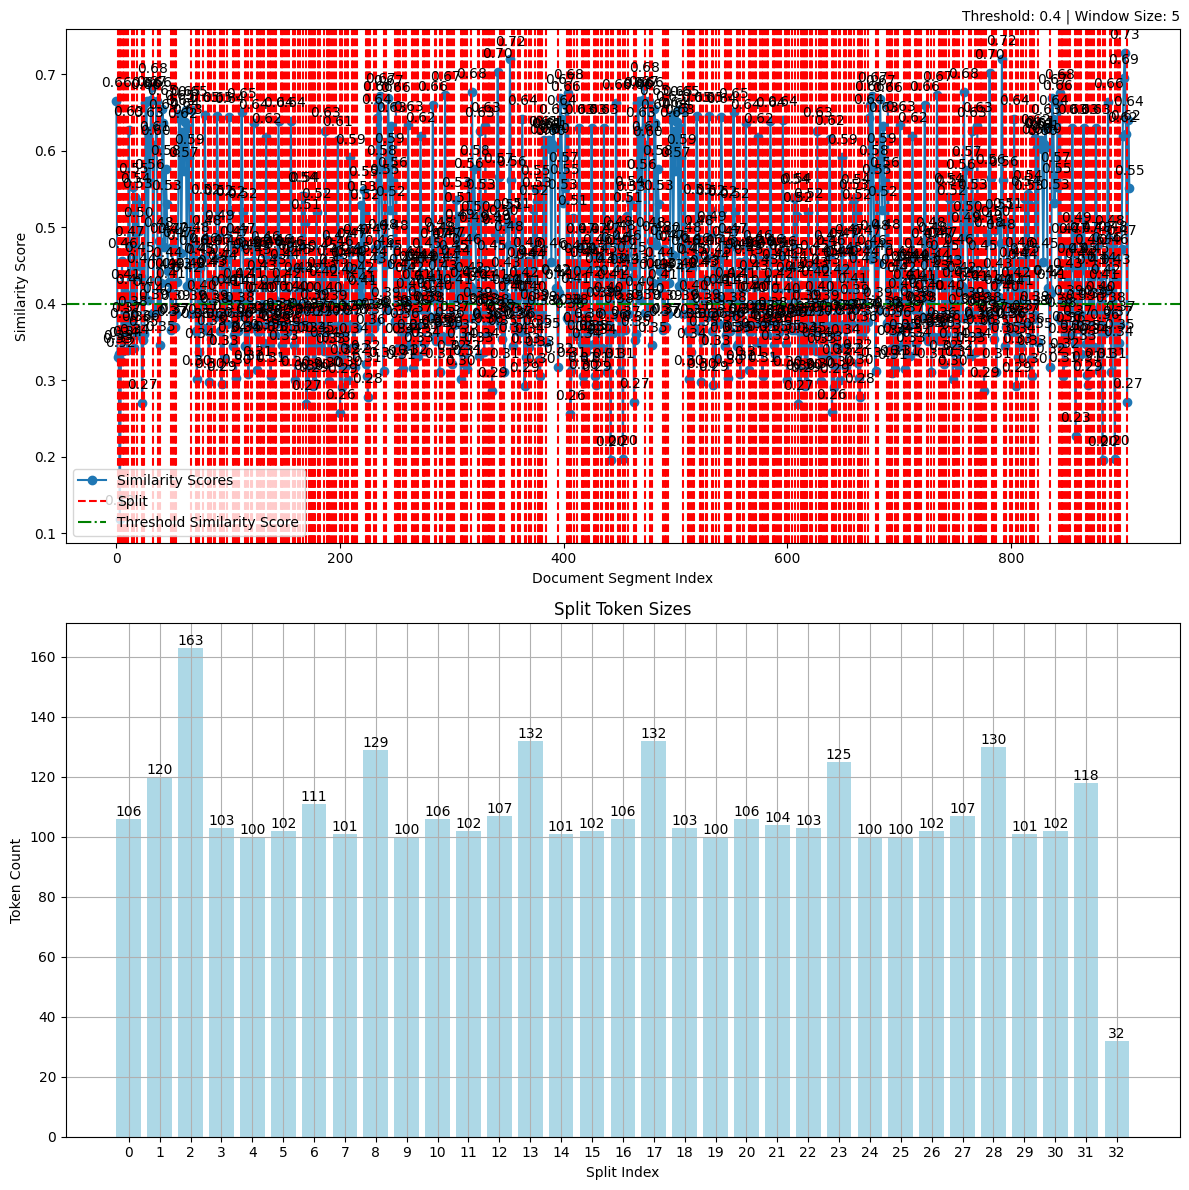

Splitting Statistics:
  - Total Documents: 908
  - Total Splits: 33
  - Splits by Threshold: 32
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 32
  - Maximum Token Size of Split: 163
  - Similarity Split Ratio: 0.97
section_38.txt


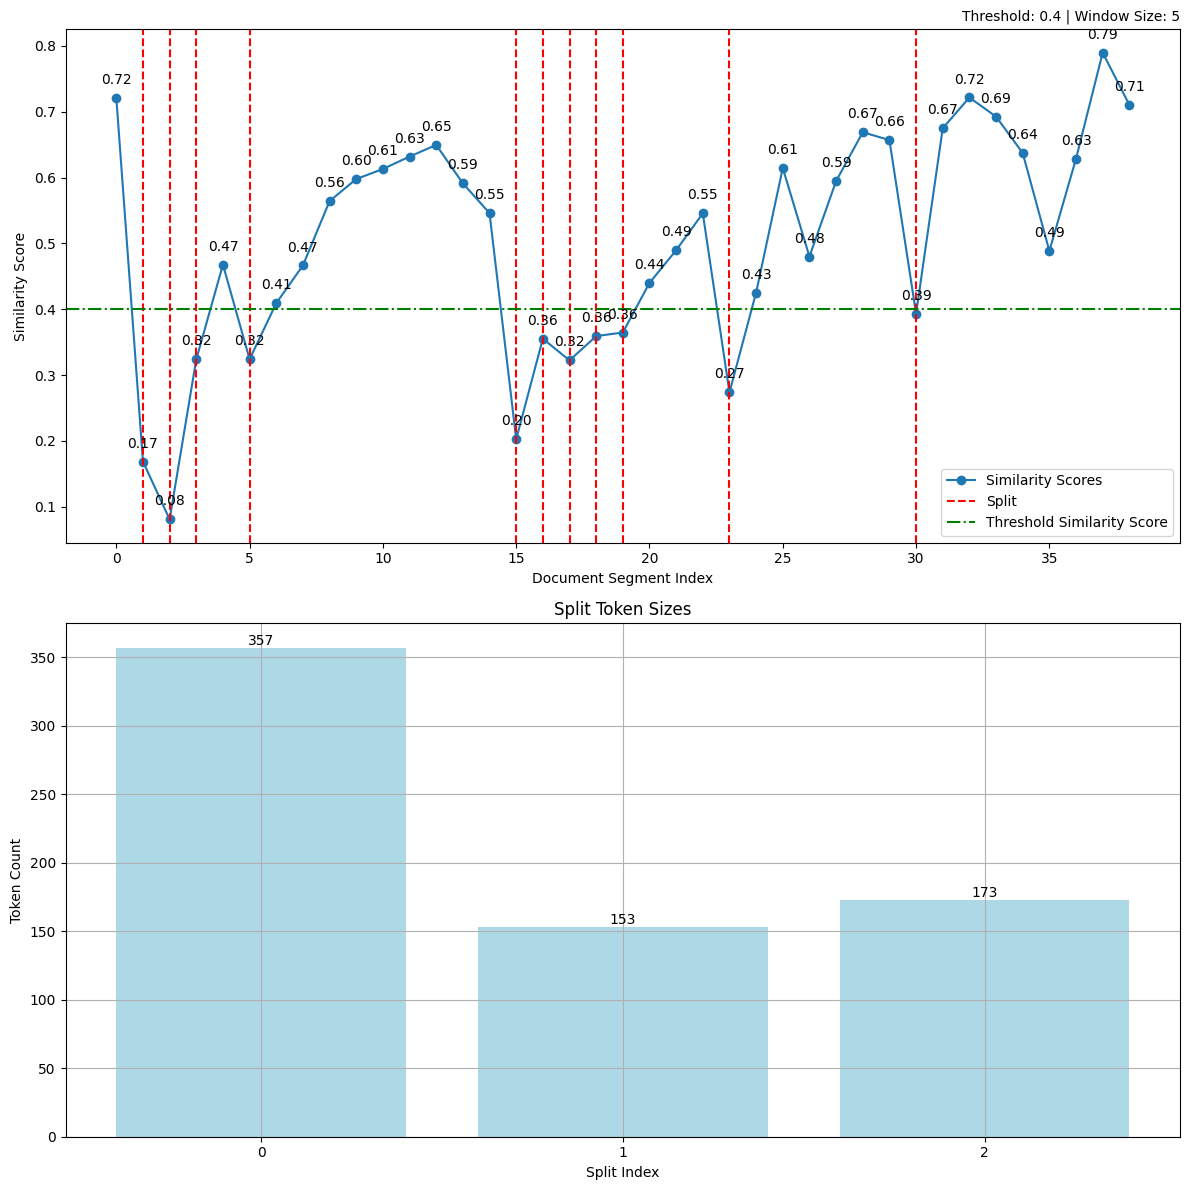

Splitting Statistics:
  - Total Documents: 40
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 153
  - Maximum Token Size of Split: 357
  - Similarity Split Ratio: 0.67
section_3.txt


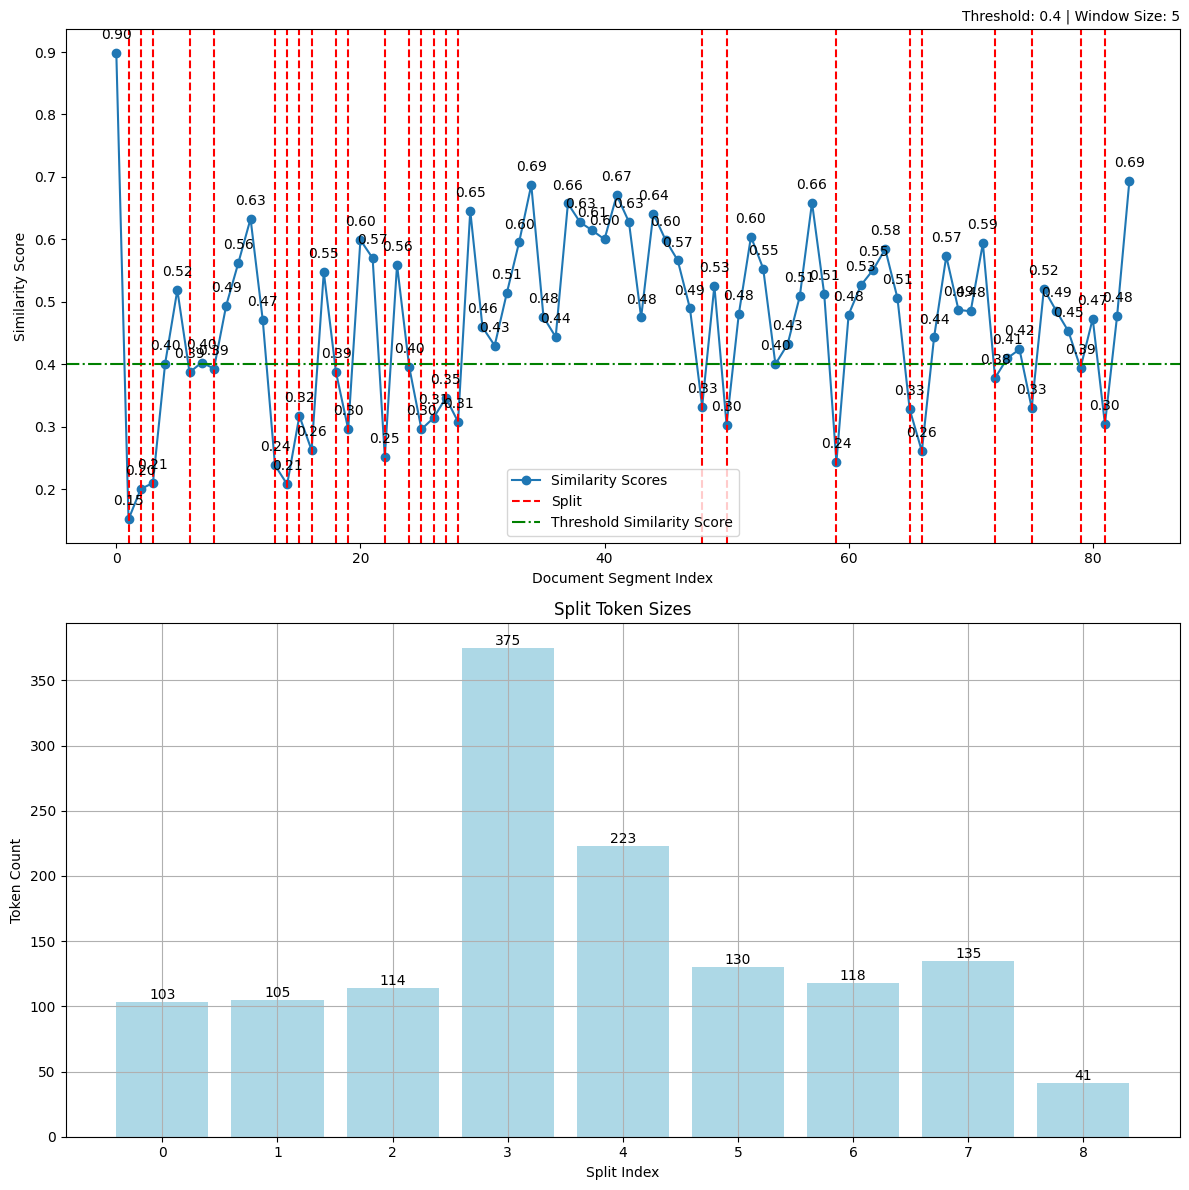

Splitting Statistics:
  - Total Documents: 85
  - Total Splits: 9
  - Splits by Threshold: 7
  - Splits by Max Chunk Size: 1
  - Last Split: 1
  - Minimum Token Size of Split: 41
  - Maximum Token Size of Split: 375
  - Similarity Split Ratio: 0.78
section_29.txt


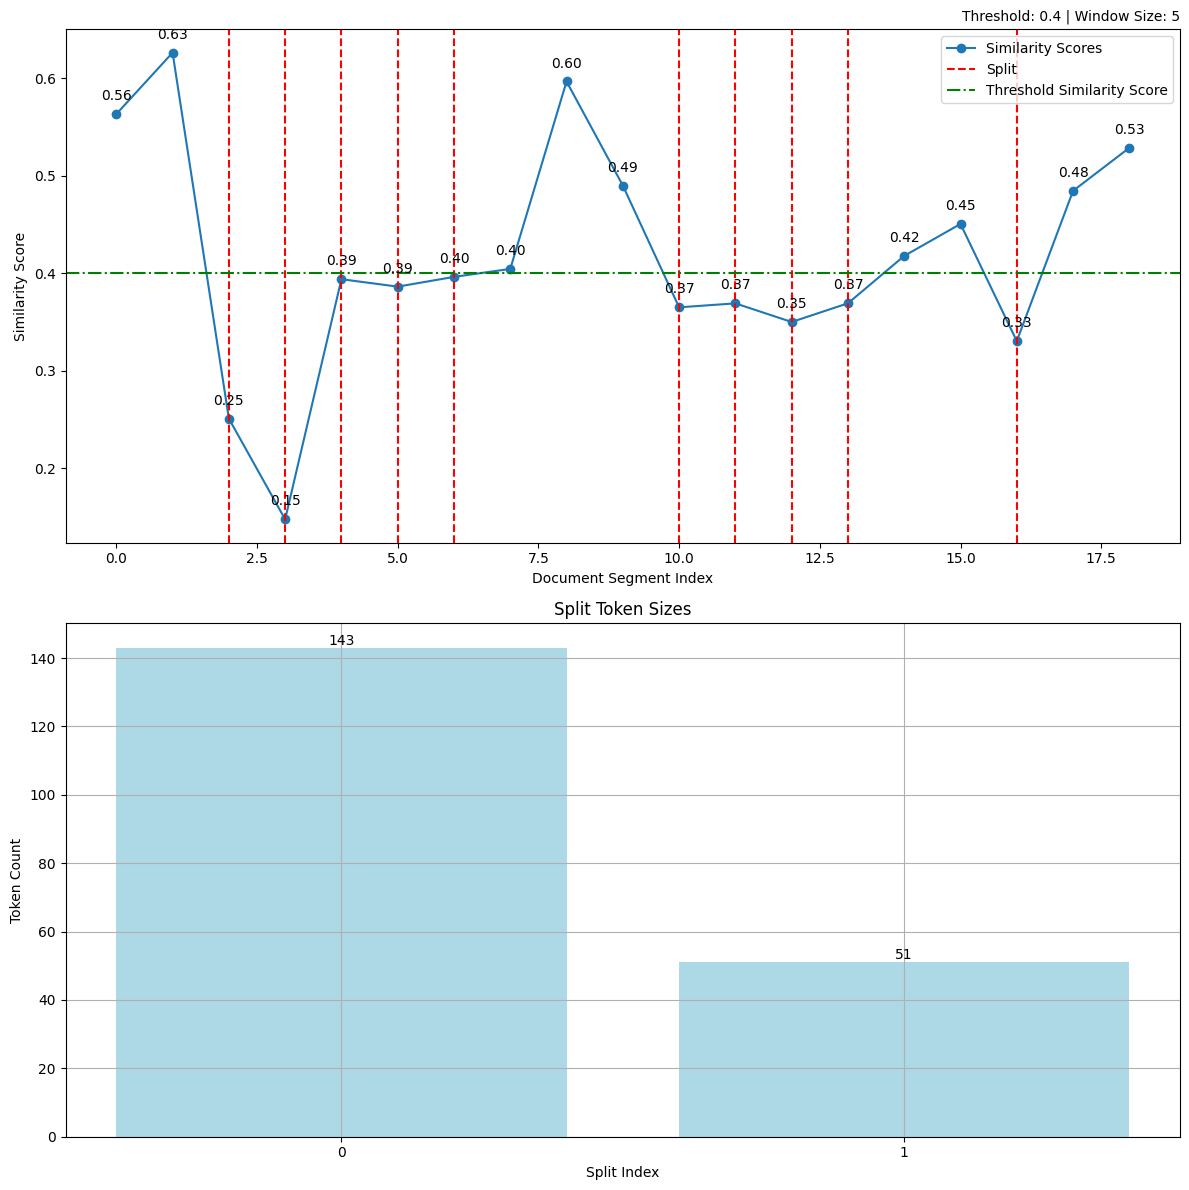

Splitting Statistics:
  - Total Documents: 20
  - Total Splits: 2
  - Splits by Threshold: 1
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 51
  - Maximum Token Size of Split: 143
  - Similarity Split Ratio: 0.50
section_176.txt


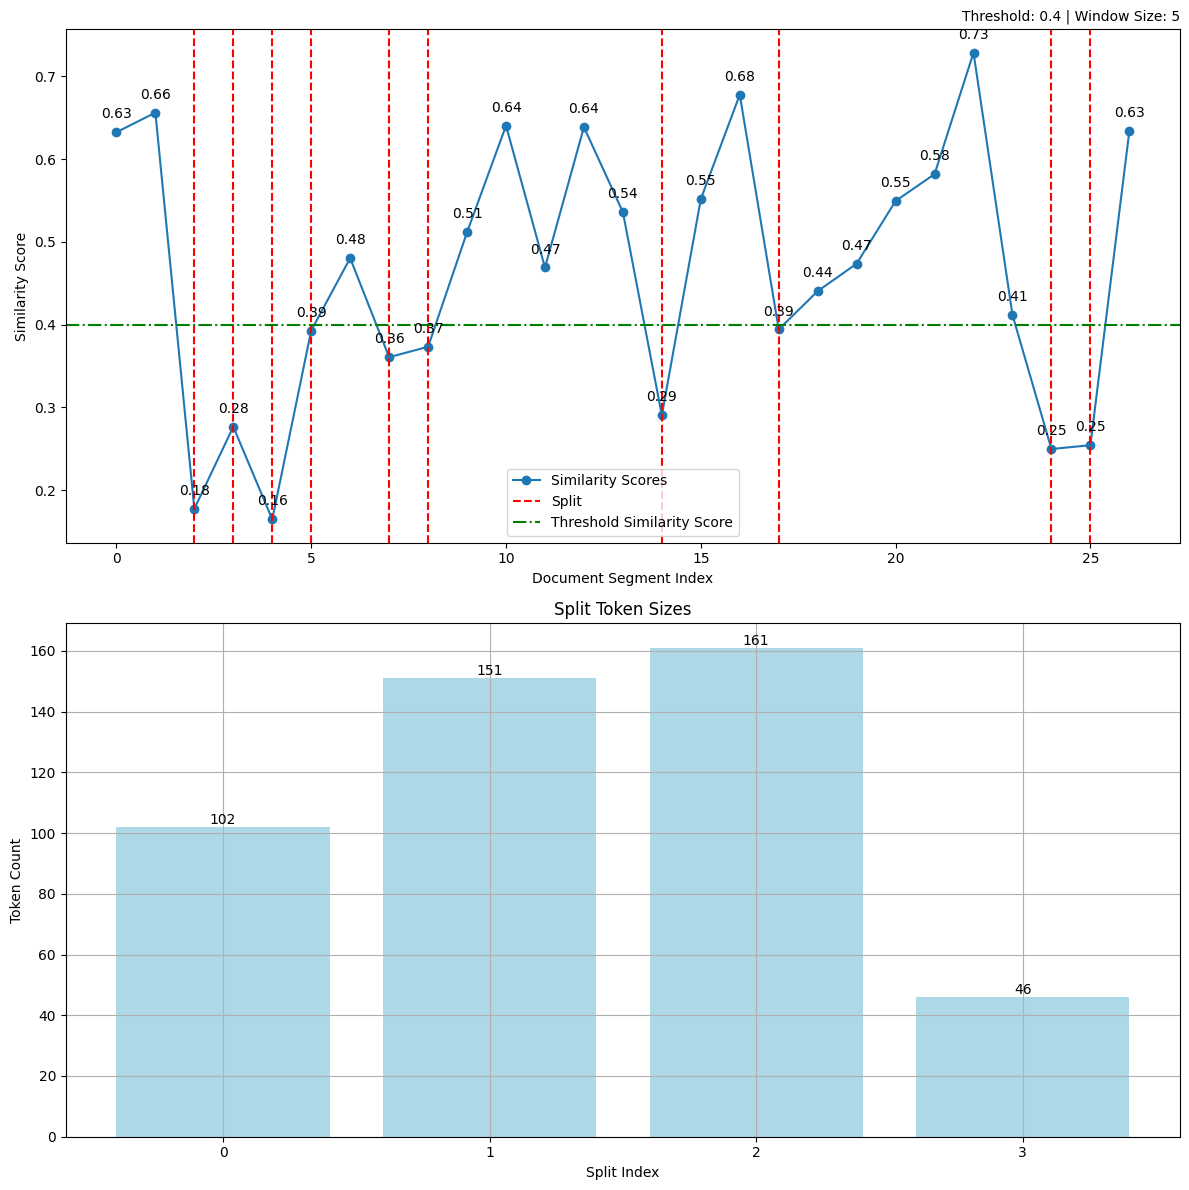

Splitting Statistics:
  - Total Documents: 28
  - Total Splits: 4
  - Splits by Threshold: 3
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 46
  - Maximum Token Size of Split: 161
  - Similarity Split Ratio: 0.75
section_18.txt


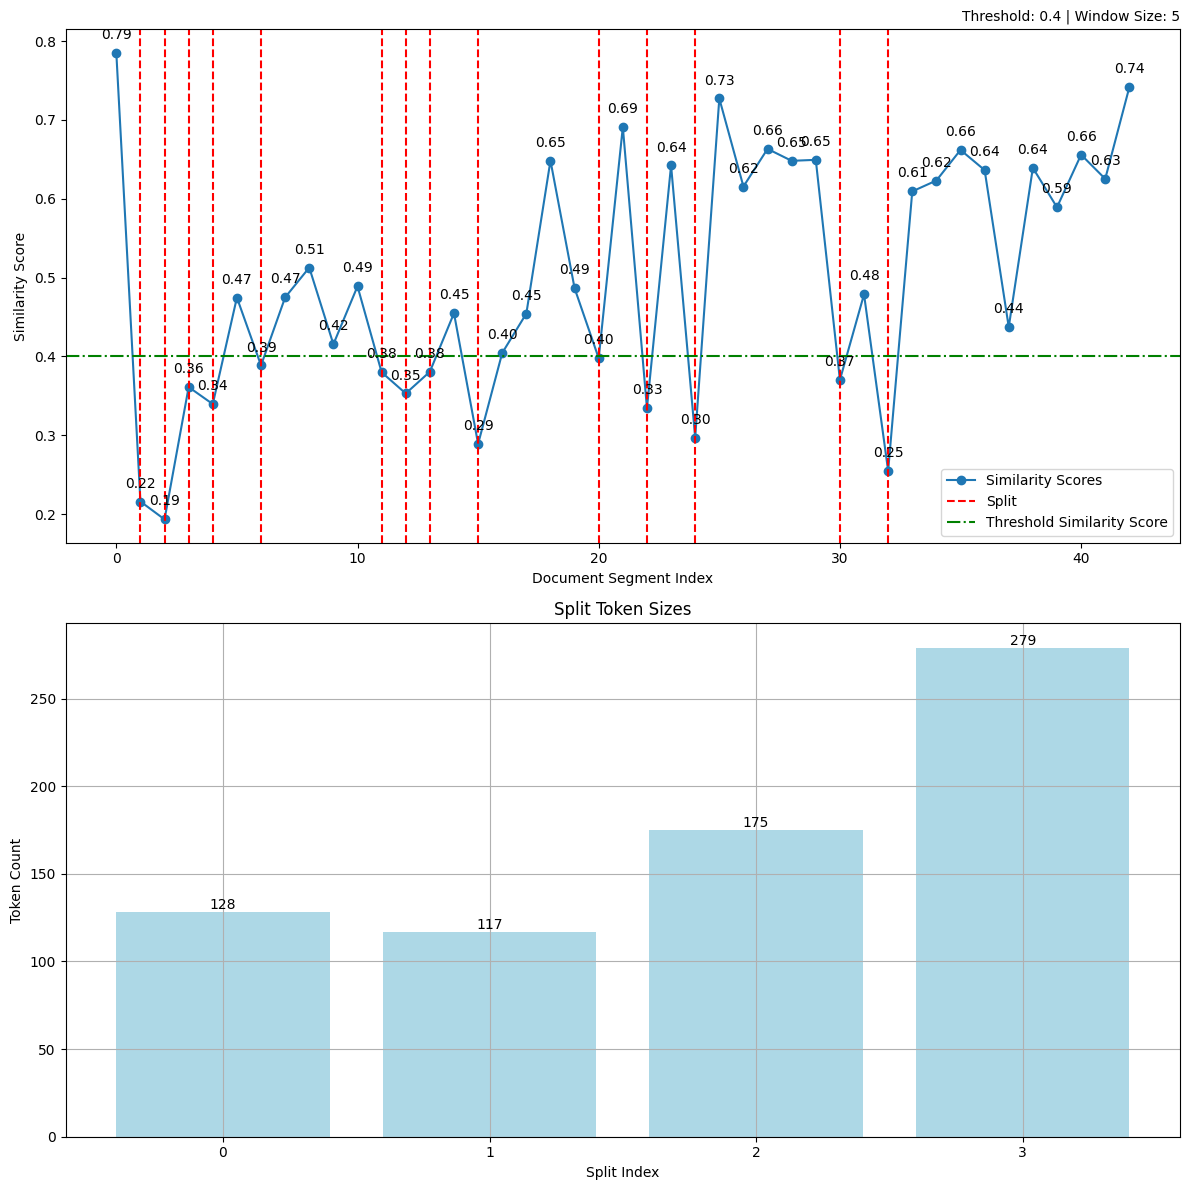

Splitting Statistics:
  - Total Documents: 44
  - Total Splits: 4
  - Splits by Threshold: 3
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 117
  - Maximum Token Size of Split: 279
  - Similarity Split Ratio: 0.75
section_39.txt


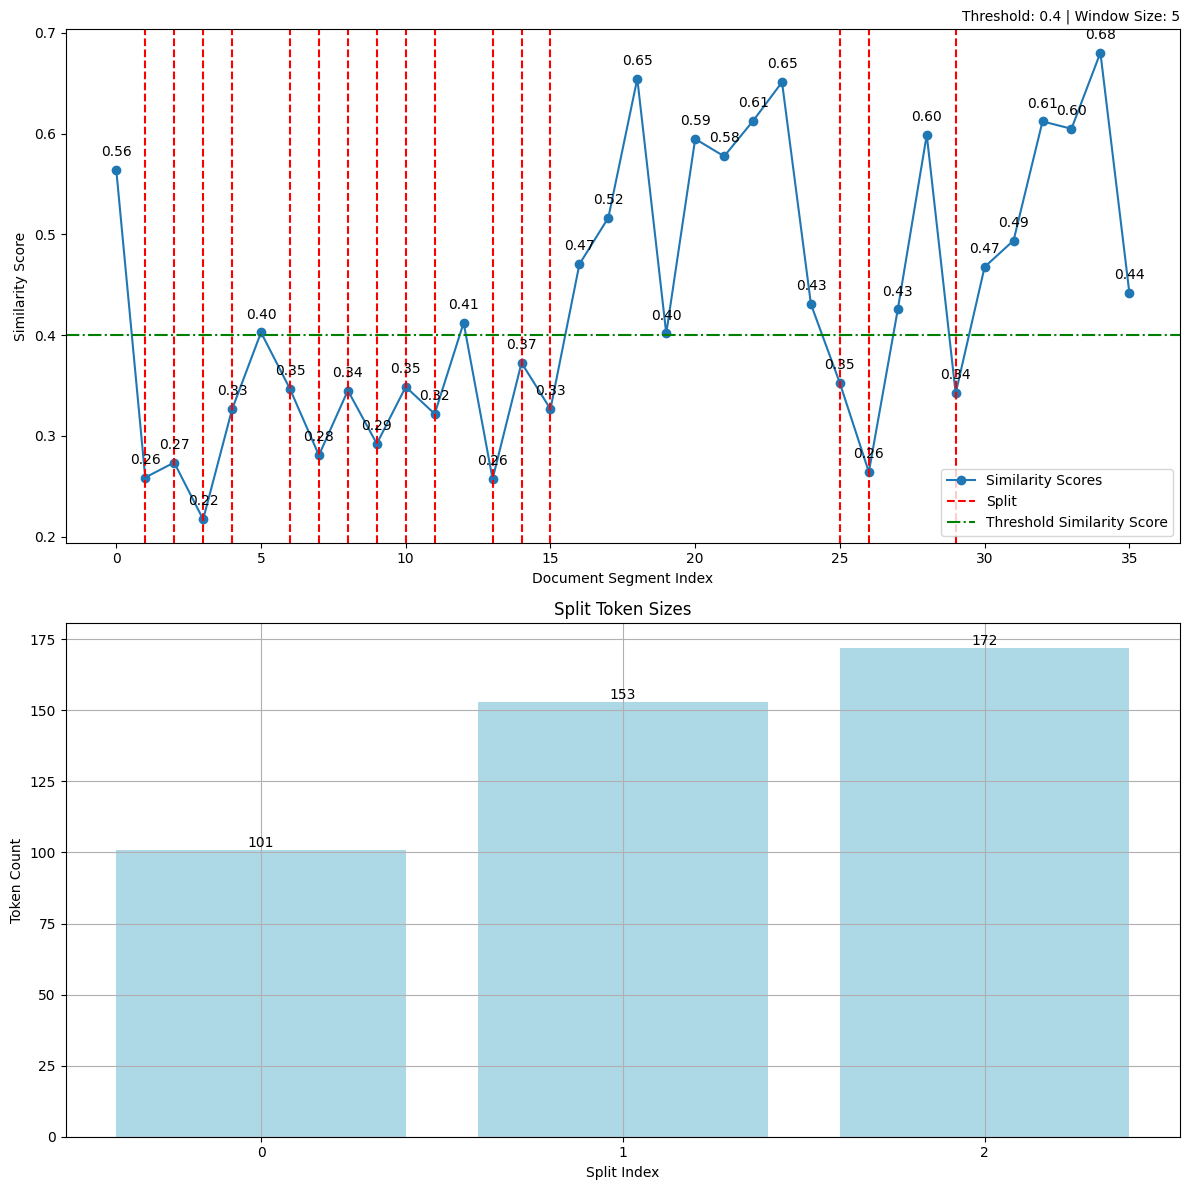

Splitting Statistics:
  - Total Documents: 37
  - Total Splits: 3
  - Splits by Threshold: 2
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 101
  - Maximum Token Size of Split: 172
  - Similarity Split Ratio: 0.67
section_32.txt


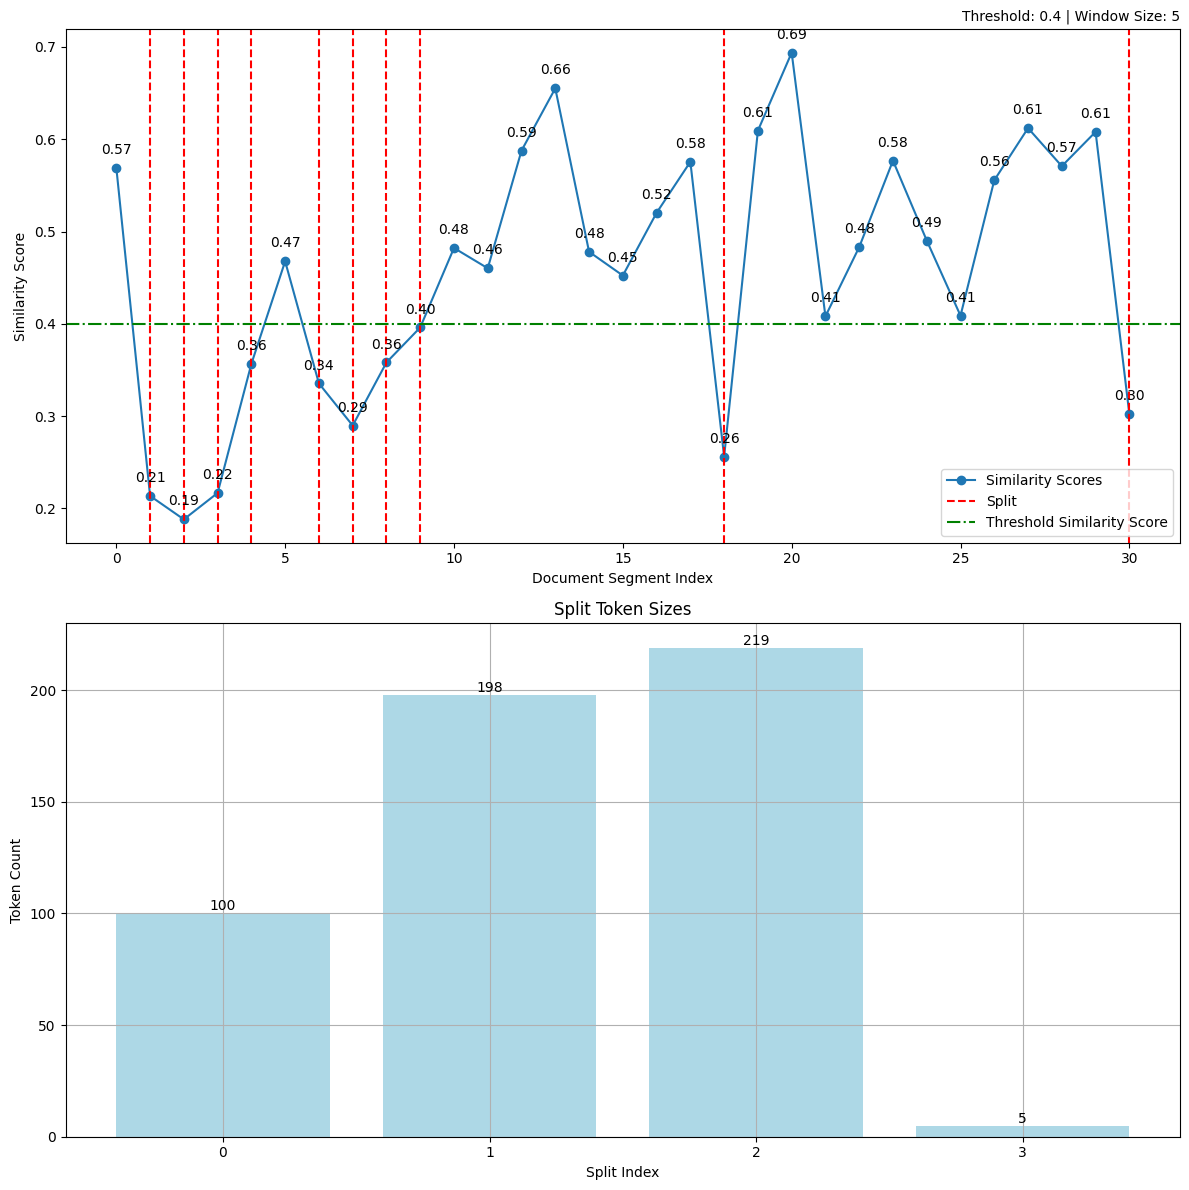

Splitting Statistics:
  - Total Documents: 32
  - Total Splits: 4
  - Splits by Threshold: 3
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 5
  - Maximum Token Size of Split: 219
  - Similarity Split Ratio: 0.75
section_16.txt


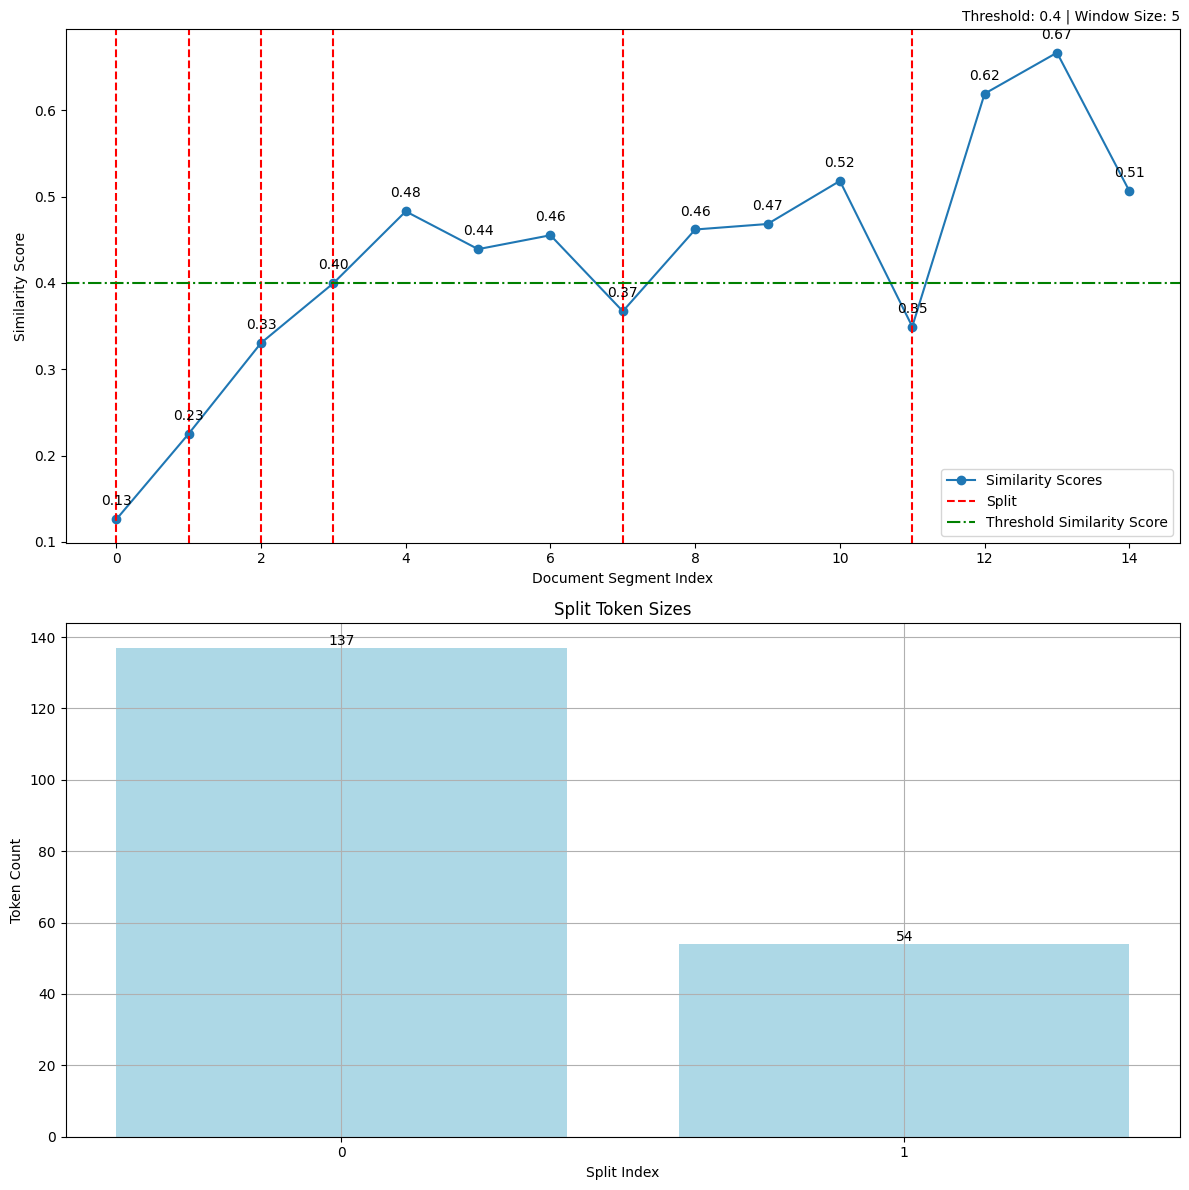

Splitting Statistics:
  - Total Documents: 16
  - Total Splits: 2
  - Splits by Threshold: 1
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 54
  - Maximum Token Size of Split: 137
  - Similarity Split Ratio: 0.50


In [3]:
doc_number = len(os.listdir('data/docs'))
if doc_number >= 50:
	splits = semantic_chunking(CohereEncoder(), 'data/docs', 0.4)
else:
	print(f'The number of documents is {doc_number}')

In [8]:
splits[0]

{'text': 'Maternity and birth accessories Breastfeeding pumps, shells, means for strengthening the pelvis and much more. The insurance layers are: Maccabi Shelli, Maccabi Gold, Maccabi Silver, Basic Basket Who is eligible? Pregnant girlfriends at the age of 16-55. Seniority required in the insurance plan The service is provided to Maccabi Shelli members after 6 months from the date of joining the program, And to members of Maccabi Gold after 12 months from the date of joining the program. Maccabi Shelli friends and want to upgrade to Maccabi Shelli? For information and application > Not yet Maccabi Shelli friend? Join Now > SENIORITY IS SAVED AND YOU CAN RECEIVE THE SERVICE WITHOUT A WAITING PERIOD (PROVIDED THAT YOU HAVE COMPLETED THE WAITING PERIOD IN THE PREVIOUS INSURANCE PLAN AT THE CORRESPONDING INSURANCE TIER). The service is provided to Maccabi Shelli members after 6 months from the date of joining the program, And to members of Maccabi Gold after 12 months from the date of joi

In [9]:
def google_embedding(text: str, model_name) -> list:
	"""
	Embeds the text using the embedding model
	Args:
		text (str): the text to embed
	Returns:
		embedding (list): the embedding vector of the text
	Raises:
		Exception: if there is an error in embedding the text
	"""
	try:
		embedding = genai.embed_content(model=model_name, content=text,
										task_type='retrieval_document')
	except Exception as e:
		raise Exception(f'Error in embedding the text: {e}')

	return embedding['embedding']

def cohere_embedding(text: str) -> list:
	"""
	Use the Google Embedding API to embed the text
	Args:
		text (str): the text to embed
	Returns:
		embedding (list): the embedding vector of the text
	Raises:
		Exception: if there is an error in embedding the text
	"""
	model = SentenceTransformer('all-MiniLM-L6-v2')
	try:
		embedding = model.encode(text)
	except Exception as e:
		raise Exception(f'Error in embedding the text: {e}')

	embedding_list = list(embedding)
	embedding_to_return = [float(num) for num in embedding_list]
	return embedding_to_return

from backend.utils.helpers import decode_embedding_model_name
def create_chunks(splits, emb):
	chunks = []
	for split in splits:
		if emb in ['emb1', 'emb2']:
			embedding = google_embedding(split['text'], decode_embedding_model_name(emb))
		elif emb == 'emb3':
			embedding = cohere_embedding(split['text'])
		chunk = {
			'text': split['text'],
			'embedding': embedding,
			'origin_file': split['origin_file']
		}
		chunks.append(chunk)
	return chunks


In [10]:
for emb in ['emb1', 'emb2', 'emb3']:
	print(f'Creating embeddings for {emb}')
	handler = DBHandler(org_id=f's_maccabi_{emb}', user_id='evaluator')
	chunks = create_chunks(splits, emb)
	print(f'Updating the database with the embeddings for {emb}')
	handler.update('embeddings', chunks)

Creating embeddings for emb1
Updating the database with the embeddings for emb1
Creating embeddings for emb2
Updating the database with the embeddings for emb2
Creating embeddings for emb3
Updating the database with the embeddings for emb3
